## Question 1: What is the most successful genre?

We were tasked with analyzing what genre would be the most profitable for Mircosoft to consider as a category for them to enter the movie making industry. We decided to answer the following questions about movie genres to assist in finding what the best strategy for Mircosoft should be. 

  1. What is the top overall movie genre?
  
  2. Is there a correlation between release month and higher profitability in that genre?
  
  3. Is there a correlation between production budget and net profits in the that genre?

We imported our cleaned dataframe that we saved as a .csv file and ranked the domestic_gross column from highest to lowest to determine what genres were the most successful at the box office.

In [1]:
import pandas as pd
import numpy as np
import string
import datetime
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
sns.set(color_codes=True)
sns.set_style({'grid.color': 'black', 'axes.facecolor': 'white', 'figure.facecolor': 'white',
               'axes.edgecolor': 'black','axes.labelcolor': 'white', 'xtick.color': 'black',
               'ytick.color': 'black'})
df=pd.read_csv('NewData/group_data (5).csv')
df2 = df.sort_values('domestic_gross', ascending=False).dropna()
df2

id release_date                   movie  production_budget  \
0      1   2009-12-18                  Avatar          425000000   
40    42   2018-02-16           Black Panther          200000000   
5      7   2018-04-27  Avengers: Infinity War          300000000   
32    34   2015-06-12          Jurassic World          215000000   
25    27   2012-05-04            The Avengers          225000000   
...   ..          ...                     ...                ...   
3216  95   2011-05-10            The Hit List            6000000   
2252  54   2016-02-19                Forsaken           18000000   
2251  53   2014-08-22              The Prince           18000000   
2249  51   2014-11-14                  Wolves           18000000   
3484  64   2015-12-31                The Veil            4000000   

      domestic_gross                   genres     tconst  runtime  popularity  \
0          760507625                   Horror  tt1775309     93.0      26.526   
40         700059566  Action,Adventure,Sci-Fi  tt1825683    134.0       2.058   
5          678815482  Action,Adventure,Sci-Fi  tt4154756    149.0      80.773   
32         652270625  Action,Adventure,Sci-Fi  tt0369610    124.0      20.709   
25         623279547  Action,Adventure,Sci-Fi  tt0848228    143.0      50.289   
...              ...                      ...        ...      ...         ...   
3216               0          Action,Thriller  tt1575694     90.0       6.241   
2252               0     Action,Drama,Western  tt2271563     90.0       9.472   
2251               0          Action,Thriller  tt1085492     93.0      12.324   
2249               0    Action,Fantasy,Horror  tt1403241     91.0       8.627   
3484               0  Action,Adventure,Sci-Fi  tt3343868     93.0       9.148   

      year_released release_day release_month  domestic_gross_in_mill  \
0              2009      Friday      December              760.507625   
40             2018      Friday      February              700.059566   
5              2018      Friday         April              678.815482   
32             2015      Friday          June              652.270625   
25             2012      Friday           May              623.279547   
...             ...         ...           ...                     ...   
3216           2011     Tuesday           May                0.000000   
2252           2016      Friday      February                0.000000   
2251           2014      Friday        August                0.000000   
2249           2014      Friday      November                0.000000   
3484           2015    Thursday      December                0.000000   

      production_budget_in_mill  domestic_net_in_mill  Return_on_Investment  \
0                         425.0            335.507625             78.942971   
40                        200.0            500.059566            250.029783   
5                         300.0            378.815482            126.271827   
32                        215.0            437.270625            203.381686   
25                        225.0            398.279547            177.013132   
...                         ...                   ...                   ...   
3216                        6.0             -6.000000           -100.000000   
2252                       18.0            -18.000000           -100.000000   
2251                       18.0            -18.000000           -100.000000   
2249                       18.0            -18.000000           -100.000000   
3484                        4.0             -4.000000           -100.000000   

      release_day_num  release_month_num  
0                  18                 12  
40                 16                  2  
5                  27                  4  
32                 12                  6  
25                  4                  5  
...               ...                ...  
3216               10                  5  
2252               19                  2  
225

Next we wanted to extract the top genres from the movies that historically preformed the best at the box office in order for us to gain a better understanding to what patterns the data showed. We determined that using the top 100 movies was the best sample size for our data. 

In [2]:
top_movie_genres = df2.loc[:,['movie', 'genres']].dropna() #drops the NaN values
final_movie_genres = top_movie_genres.head(100)
final_movie_genres

movie                      genres
0                                 Avatar                      Horror
40                         Black Panther     Action,Adventure,Sci-Fi
5                 Avengers: Infinity War     Action,Adventure,Sci-Fi
32                        Jurassic World     Action,Adventure,Sci-Fi
25                          The Avengers     Action,Adventure,Sci-Fi
...                                  ...                         ...
126                       Wreck-It Ralph  Adventure,Animation,Comedy
2263                       A Quiet Place                 Documentary
127                         Interstellar      Adventure,Drama,Sci-Fi
217                           The Croods  Action,Adventure,Animation
259   Sherlock Holmes: A Game of Shadows      Action,Adventure,Crime

[100 rows x 2 columns]

Because we had so many different genres in our dataset, it was best for us to get a count of the most frequent genres to help us determine what type of movie was created the most. As you can see from our data, 'Action, Adventure, Sci-Fi' was the top genre within our 100 movie sampling size.

In [3]:
total_genres_count = final_movie_genres['genres'].value_counts()
total_genres_count

Action,Adventure,Sci-Fi       25
Adventure,Animation,Comedy    15
Action,Adventure,Fantasy       8
Action,Adventure,Comedy        7
Action,Adventure,Animation     5
Adventure,Family,Fantasy       4
Action,Crime,Thriller          3
Adventure,Fantasy              2
Action,Adventure,Thriller      2
Adventure,Drama,Sci-Fi         2
Animation,Comedy,Family        2
Adventure,Drama,Fantasy        1
Comedy,Mystery                 1
Action,Sci-Fi,Thriller         1
Musical                        1
Action,Adventure,Family        1
Action,Adventure,Crime         1
Action,Drama,History           1
Horror,Thriller                1
Comedy,Fantasy                 1
Documentary                    1
Action,Adventure,Drama         1
Drama,Fantasy,Romance          1
Drama,Sci-Fi,Thriller          1
Horror                         1
Action,Biography,Drama         1
Animation                      1
Action,Adventure,Horror        1
Action,Comedy,Crime            1
Crime,Drama                    1
Biography,

Once the genres were ranked in order from highest to lowest, visualizing that data was key. We determined that a bar chart was the best way to show our findings.

<IPython.core.display.Javascript object>


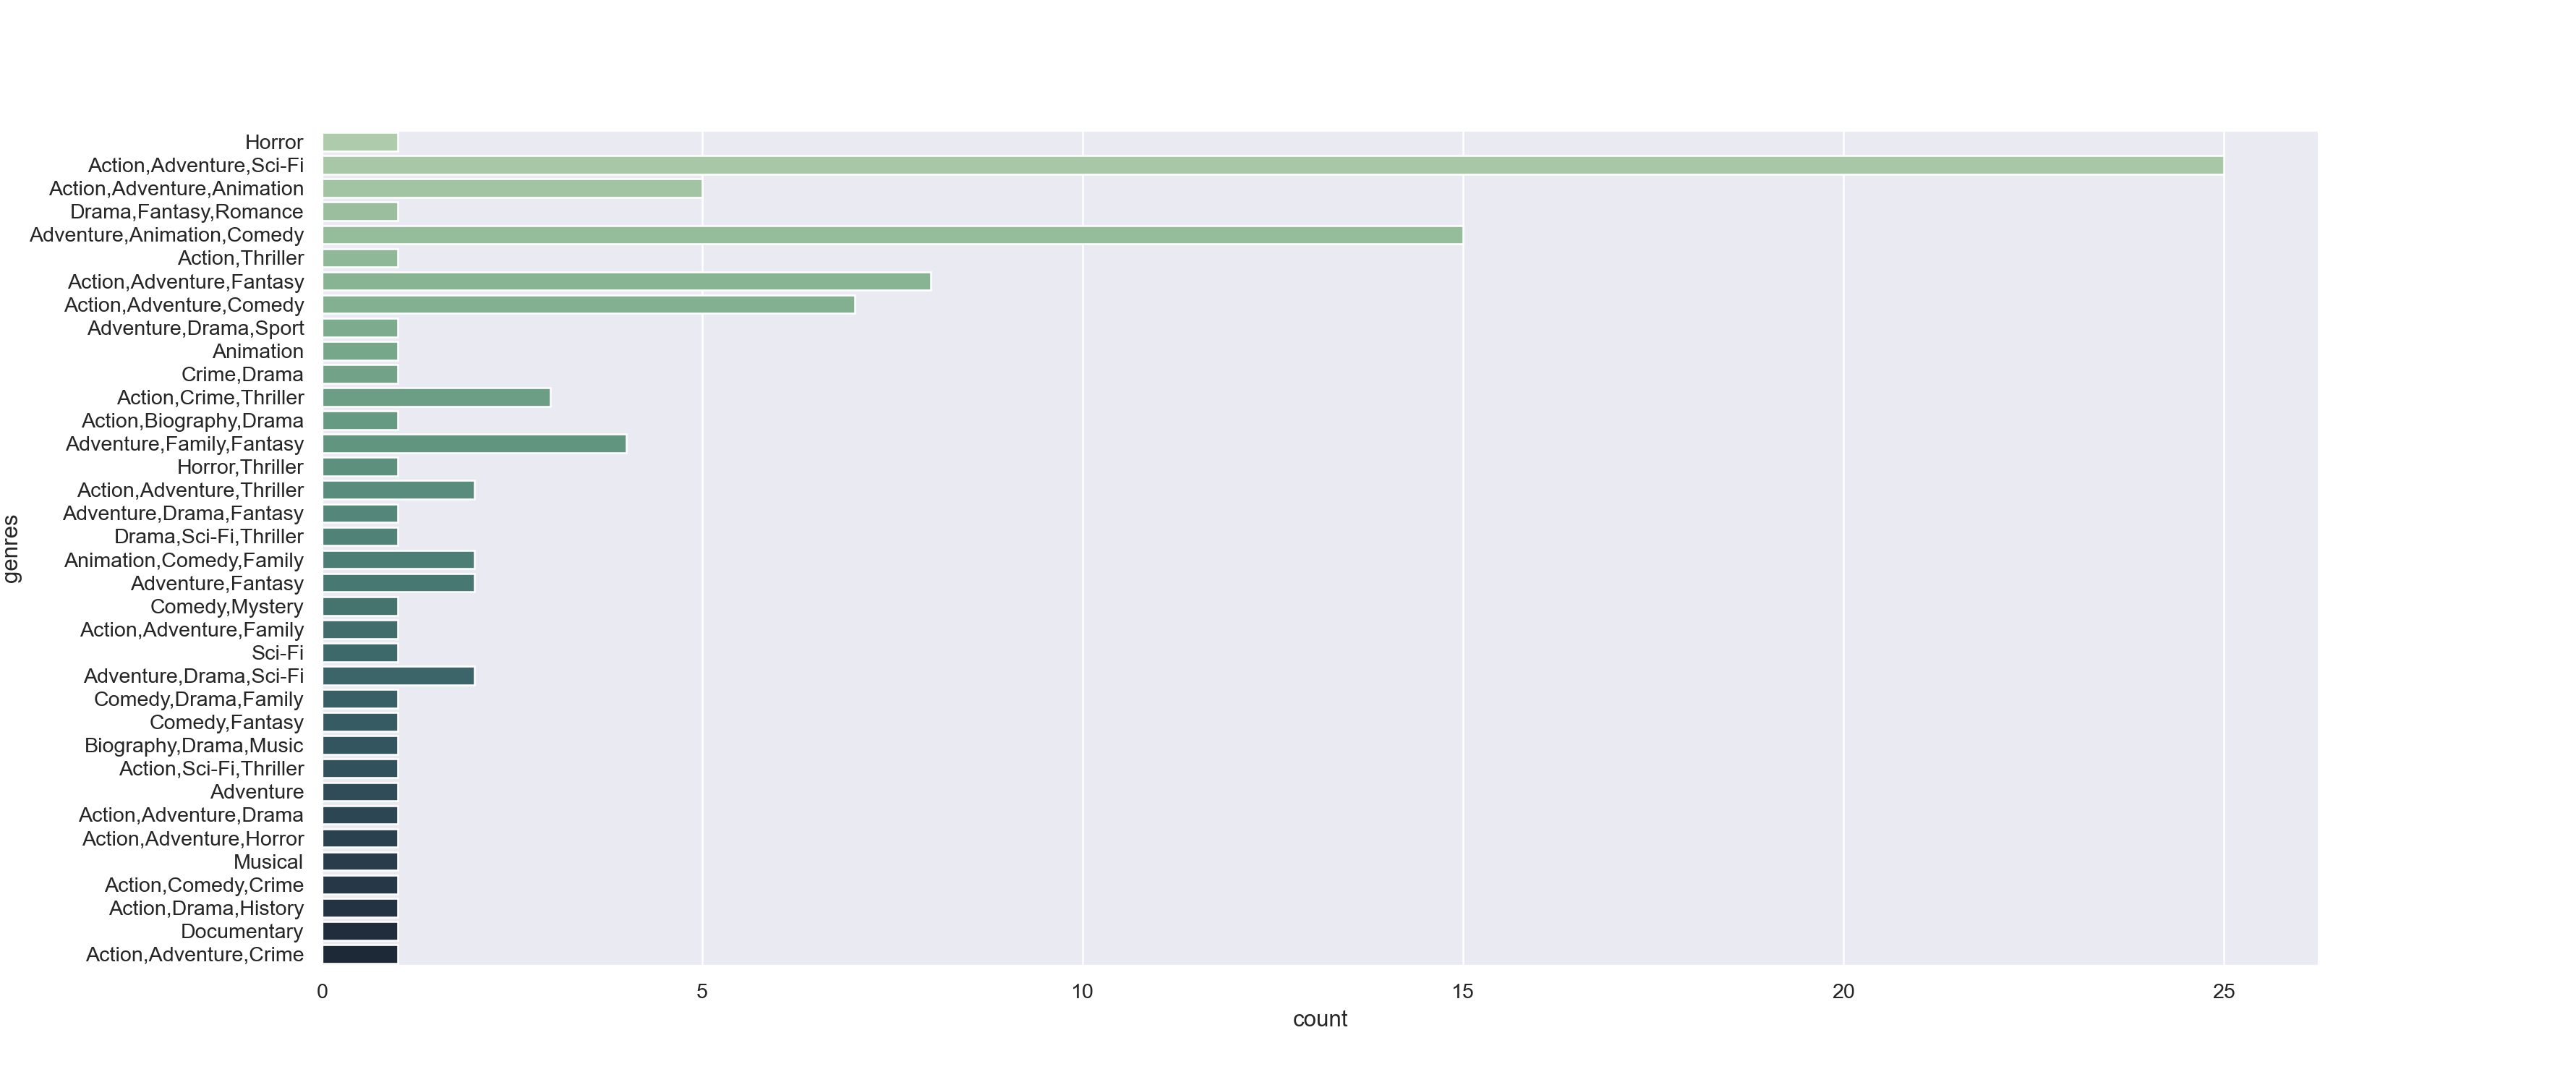

In [7]:
plt.figure(figsize=(19,8))
ax=sns.countplot(y="genres", data=final_movie_genres, palette= "ch:r=-.5,l=.75")

The next sub question to determine is if there is any correlation between the success of a particular genre being released at a specific time of the year. We extracted the top movies based on box office sales and compared that to release months and genre to see if there were any relationships. We decided to work with a smaller sampling size of 20 to get a better understanding of exactly how profitable the top movies of all time were. Did certain movies perform better being released in certain months?

In [20]:
domestic_gross_month = df2.loc[:,['production_budget_in_mill', 'domestic_gross_in_mill', 'genres', 'release_month_num', 'movie']].dropna() #drops the NaN values
highest_month = domestic_gross_month.head(20)
highest_month

production_budget_in_mill  domestic_gross_in_mill  \
0                        425.0              760.507625   
40                       200.0              700.059566   
5                        300.0              678.815482   
32                       215.0              652.270625   
25                       225.0              623.279547   
41                       200.0              608.581744   
42                       200.0              532.177324   
130                      160.0              504.014165   
43                       200.0              486.295561   
2                        330.6              459.005868   
9                        275.0              448.139099   
228                      130.0              424.668047   
108                      170.0              417.719760   
44                       200.0              415.004880   
150                      150.0              412.563408   
45                       200.0              408.992272   
15                       250.0              408.084349   
494                       80.0              408.010692   
411                       90.0              404.508916   
151                      150.0              400.738009   

                         genres  release_month_num  \
0                        Horror                 12   
40      Action,Adventure,Sci-Fi                  2   
5       Action,Adventure,Sci-Fi                  4   
32      Action,Adventure,Sci-Fi                  6   
25      Action,Adventure,Sci-Fi                  5   
41   Action,Adventure,Animation                  6   
42      Action,Adventure,Sci-Fi                 12   
130       Drama,Fantasy,Romance                  3   
43   Adventure,Animation,Comedy                  6   
2       Action,Adventure,Sci-Fi                  5   
9               Action,Thriller                  7   
228     Action,Adventure,Sci-Fi                 11   
108     Action,Adventure,Sci-Fi                  6   
44   Adventure,Animation,Comedy                  6   
150    Action,Adventure,Fantasy                  6   
45      Action,Adventure,Sci-Fi                  5   
15      Action,Adventure,Sci-Fi                  5   
494     Action,Adventure,Sci-Fi                  3   
411     Action,Adventure,Comedy                 12   
151       Adventure,Drama,Sport                 11   

                               movie  
0                             Avatar  
40                     Black Panther  
5             Avengers: Infinity War  
32                    Jurassic World  
25                      The Avengers  
41                     Incredibles 2  
42      Rogue One: A Star Wars Story  
130             Beauty and the Beast  
43                      Finding Dory  
2            Avengers: Age of Ultron  
9              The Dark Knight Rises  
228  The Hunger Games: Catching Fire  
108   Jurassic World: Fallen Kingdom  
44                       Toy Story 3  
150                     Wonder Woman  
45                        Iron Man 3  
15        Captain America: Civil War  
494                 The Hunger Games  
411   Jumanji: Welcome to the Jungle  
151                           Frozen

A visualization was needed to actually see the correlation because it was hard to see our findings from the above dataset. We plotted our findings in a regression plot. This visual gave us a lot of interesting information. 
1. 60% of the top movies of all time fell in the 'Action, Adventure, Sci-Fi' genre category.
     
     
2. The majority of the 'Action, Adventure, Sci-Fi' movies were released in late Spring, Early-mid summer. The other popular seasons were Spring break and the holidays. But there was one other finding that was interesting as well.
        
        
3. One outlier 'Action, Adventure, Sci-Fi' movie which was the second highest grossing movie 
of all time and the most profitable movie of all time was released in February. That movie was 'Black Panther'. It was released during Black History Month because it was a cultural Marvel movie. So this data shows that if you want to create an 'Action, Adventure, Sci-Fi' cultural movie, it will have better success being released during that culture's heritage month. 

<IPython.core.display.Javascript object>


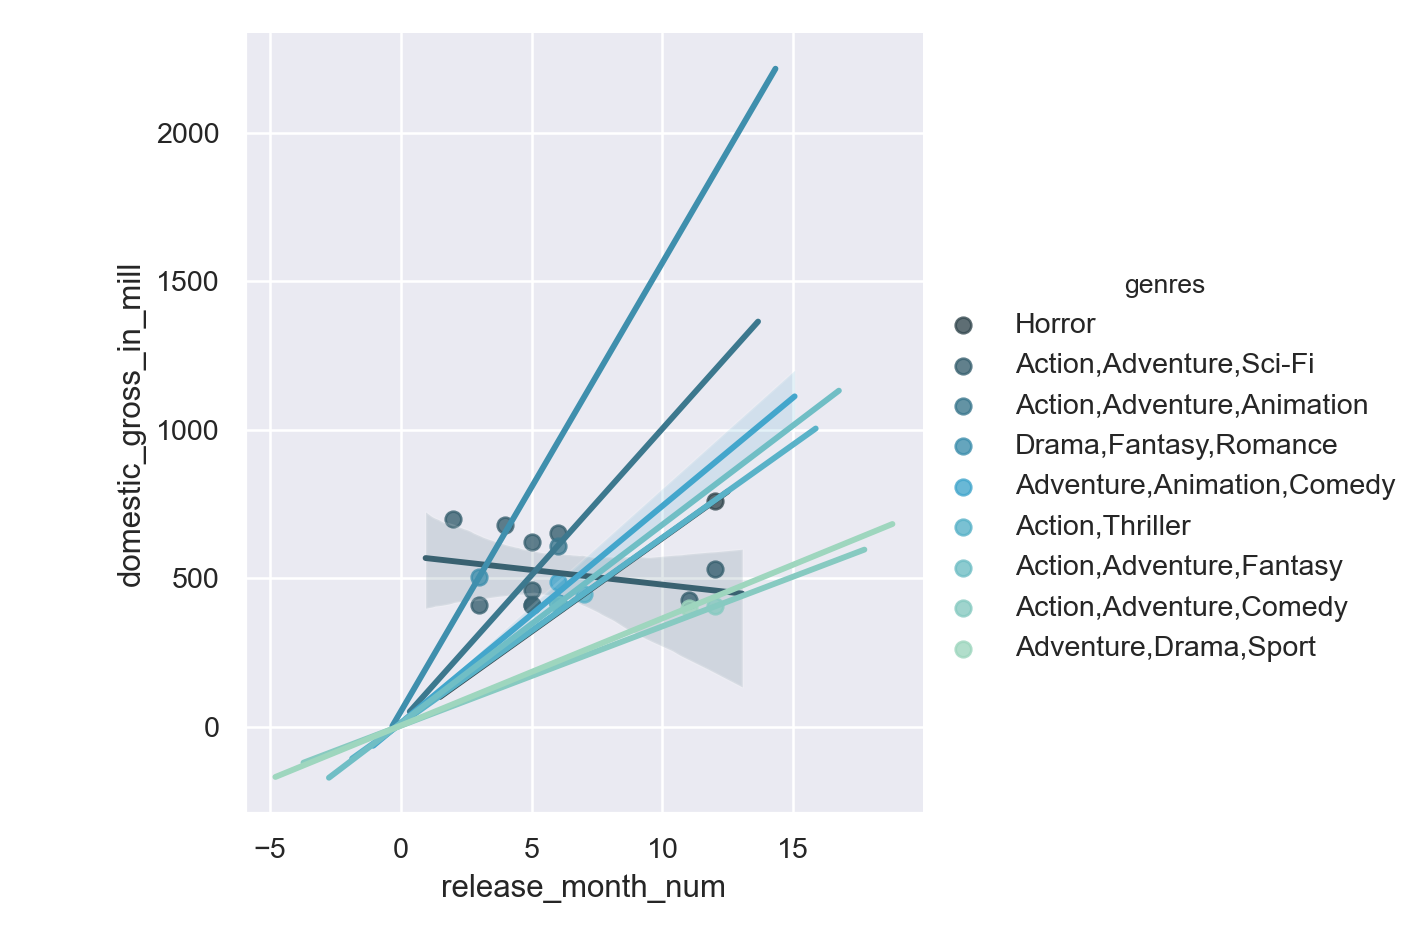

In [21]:
sns.lmplot(x="release_month_num", y="domestic_gross_in_mill", hue="genres", palette="GnBu_d", data=highest_month);

The last question that we wanted to answer about genre was how costly is the overall opportunity cost of the most successful genre to produce, and if the profits are worth it.

The table below has the top 100 movies sorted by return on investment first and then grouped by all of the 'Action, Adventure, Sci-Fi' genre to isolate all of the most profitable movies in that genre. 

In [11]:
df3 = df2.sort_values('Return_on_Investment', ascending=False).dropna()
dfftest = df3.loc[df['genres'] == 'Action,Adventure,Sci-Fi']
dfftest

id release_date                                  movie  \
494    38   2012-03-23                       The Hunger Games   
3699  100   2016-04-08                         Hardcore Henry   
40     42   2018-02-16                          Black Panther   
228    38   2013-11-22        The Hunger Games: Catching Fire   
32     34   2015-06-12                         Jurassic World   
25     27   2012-05-04                           The Avengers   
252    62   2014-11-21  The Hunger Games: Mockingjay - Part 1   
42     45   2016-12-16           Rogue One: A Star Wars Story   
108    13   2018-06-22         Jurassic World: Fallen Kingdom   
5       7   2018-04-27                 Avengers: Infinity War   
45     48   2013-05-03                             Iron Man 3   
96     99   2017-07-07                 Spider-Man: Homecoming   
110    15   2010-05-07                             Iron Man 2   
133    38   2010-07-16                              Inception   
61     64   2011-06-29         Transformers: Dark of the Moon   
134    39   2015-11-20  The Hunger Games: Mockingjay - Part 2   
15     17   2016-05-06             Captain America: Civil War   
111    16   2014-04-04    Captain America: The Winter Soldier   
2       4   2015-05-01                Avengers: Age of Ultron   
1169   35   2010-07-09                              Predators   
27     29   2013-06-14                           Man of Steel   
202    10   2011-07-22     Captain America: The First Avenger   
136    41   2014-05-16                               Godzilla   
344    62   2018-12-21                              Bumblebee   
65     68   2013-05-16                Star Trek Into Darkness   
29     31   2012-07-03                 The Amazing Spider-Man   
52     55   2014-05-23             X-Men: Days of Future Past   
35     37   2014-06-27        Transformers: Age of Extinction   
294     8   2013-07-26                          The Wolverine   
1270   66   2013-09-06                                Riddick   
170    75   2015-05-15                     Mad Max: Fury Road   
53     56   2014-05-02               The Amazing Spider-Man 2   
173    78   2018-03-29                       Ready Player One   
137    42   2011-06-03                     X-Men: First Class   
204    13   2013-03-27                  G.I. Joe: Retaliation   
90     93   2016-05-27                      X-Men: Apocalypse   
76     79   2016-07-22                       Star Trek Beyond   
277    90   2018-04-13                                Rampage   
770   100   2018-12-25                                   Vice   
280    93   2013-04-19                               Oblivion   
281    94   2017-03-24                          Power Rangers   
128    33   2016-06-24           Independence Day: Resurgence   
31     33   2017-06-21          Transformers: The Last Knight   
59     62   2011-06-17                          Green Lantern   
447    84   2018-09-14                           The Predator   
69     72   2013-07-12                            Pacific Rim   
145    50   2018-03-23                  Pacific Rim: Uprising   
30     32   2012-05-18                             Battleship   
12     14   2012-03-09                            John Carter   
88     91   2015-02-06                      Jupiter Ascending   
3804   32   2013-12-31                 Independence Daysaster   
3484   64   2015-12-31                               The Veil   

      production_budget  domestic_gross                   genres     tconst  \
494            80000000       408010692  Action,Adventure,Sci-Fi  tt1392170   
3699            2000000         9252038  Action,Adventure,Sci-Fi  tt3072482   
40            200000000       700059566  Action,Adventure,Sci-Fi  tt1825683   
228           130000000       424668047  Action,Adventure,Sci-Fi  tt1951264   
32            215000000       652270625  Action,Adventure,Sci-Fi  tt0369610   
25            225000000       623279547  Action,Adventure,Sci-Fi  tt0848228   
252     

Next, we generate a table of just the positive domestic grossing movies in this cateogry.

In [12]:
top_domestic_month = dfftest.loc[:,['Return_on_Investment', 'domestic_gross_in_mill', 'production_budget_in_mill','domestic_net_in_mill', 'genres', 'movie',]].dropna() #drops the NaN values
highest_net_month = top_domestic_month.head(20)

highest_net_month

Return_on_Investment  domestic_gross_in_mill  production_budget_in_mill  \
494             410.013365              408.010692                       80.0   
3699            362.601900                9.252038                        2.0   
40              250.029783              700.059566                      200.0   
228             226.667728              424.668047                      130.0   
32              203.381686              652.270625                      215.0   
25              177.013132              623.279547                      225.0   
252             169.708708              337.135885                      125.0   
42              166.088662              532.177324                      200.0   
108             145.717506              417.719760                      170.0   
5               126.271827              678.815482                      300.0   
45              104.496136              408.992272                      200.0   
96               90.972080              334.201140                      175.0   
110              83.784312              312.433331                      170.0   
133              82.860122              292.576195                      160.0   
61               80.713099              352.390543                      195.0   
134              76.077439              281.723902                      160.0   
15               63.233740              408.084349                      250.0   
111              52.792328              259.746958                      170.0   
2                38.840250              459.005868                      330.6   
1169             30.001720               52.000688                       40.0   

      domestic_net_in_mill                   genres  \
494             328.010692  Action,Adventure,Sci-Fi   
3699              7.252038  Action,Adventure,Sci-Fi   
40              500.059566  Action,Adventure,Sci-Fi   
228             294.668047  Action,Adventure,Sci-Fi   
32              437.270625  Action,Adventure,Sci-Fi   
25              398.279547  Action,Adventure,Sci-Fi   
252             212.135885  Action,Adventure,Sci-Fi   
42              332.177324  Action,Adventure,Sci-Fi   
108             247.719760  Action,Adventure,Sci-Fi   
5               378.815482  Action,Adventure,Sci-Fi   
45              208.992272  Action,Adventure,Sci-Fi   
96              159.201140  Action,Adventure,Sci-Fi   
110             142.433331  Action,Adventure,Sci-Fi   
133             132.576195  Action,Adventure,Sci-Fi   
61              157.390543  Action,Adventure,Sci-Fi   
134             121.723902  Action,Adventure,Sci-Fi   
15              158.084349  Action,Adventure,Sci-Fi   
111              89.746958  Action,Adventure,Sci-Fi   
2               128.405868  Action,Adventure,Sci-Fi   
1169             12.000688  Action,Adventure,Sci-Fi   

                                      movie  
494                        The Hunger Games  
3699                         Hardcore Henry  
40                            Black Panther  
228         The Hunger Games: Catching Fire  
32                           Jurassic World  
25                             The Avengers  
252   The Hunger Games: Mockingjay - Part 1  
42             Rogue One: A Star Wars Story  
108          Jurassic World: Fallen Kingdom  
5                    Avengers: Infinity War  
45                               Iron Man 3  
96                   Spider-Man: Homecoming  
110                              Iron Man 2  
133                               Inception  
61           Transformers: Dark of the Moon  
134   The Hunger Games: Mockingjay - Part 2  
15               Captain America: Civil War  
111     Captain America: The Winter Soldier  
2                   Avengers: Age of Ultron  
1169                              Predators

In [22]:
highest_net_month[["domestic_net_in_mill"]].mean()

domestic_net_in_mill    222.347211
dtype: float64

We then create a graph to visually display our findings to see the correlation of production budget vs. domestic net gross in the 'Action, Adventure, Sci-Fi' genre. We used a hexbin marginal plot to show that correlation. This shows that the most successful  'Action, Adventure, Sci-Fi' movies had a production budget of around  200 million dollars, and a domestic net gross between 200-500 million dollars.

<IPython.core.display.Javascript object>


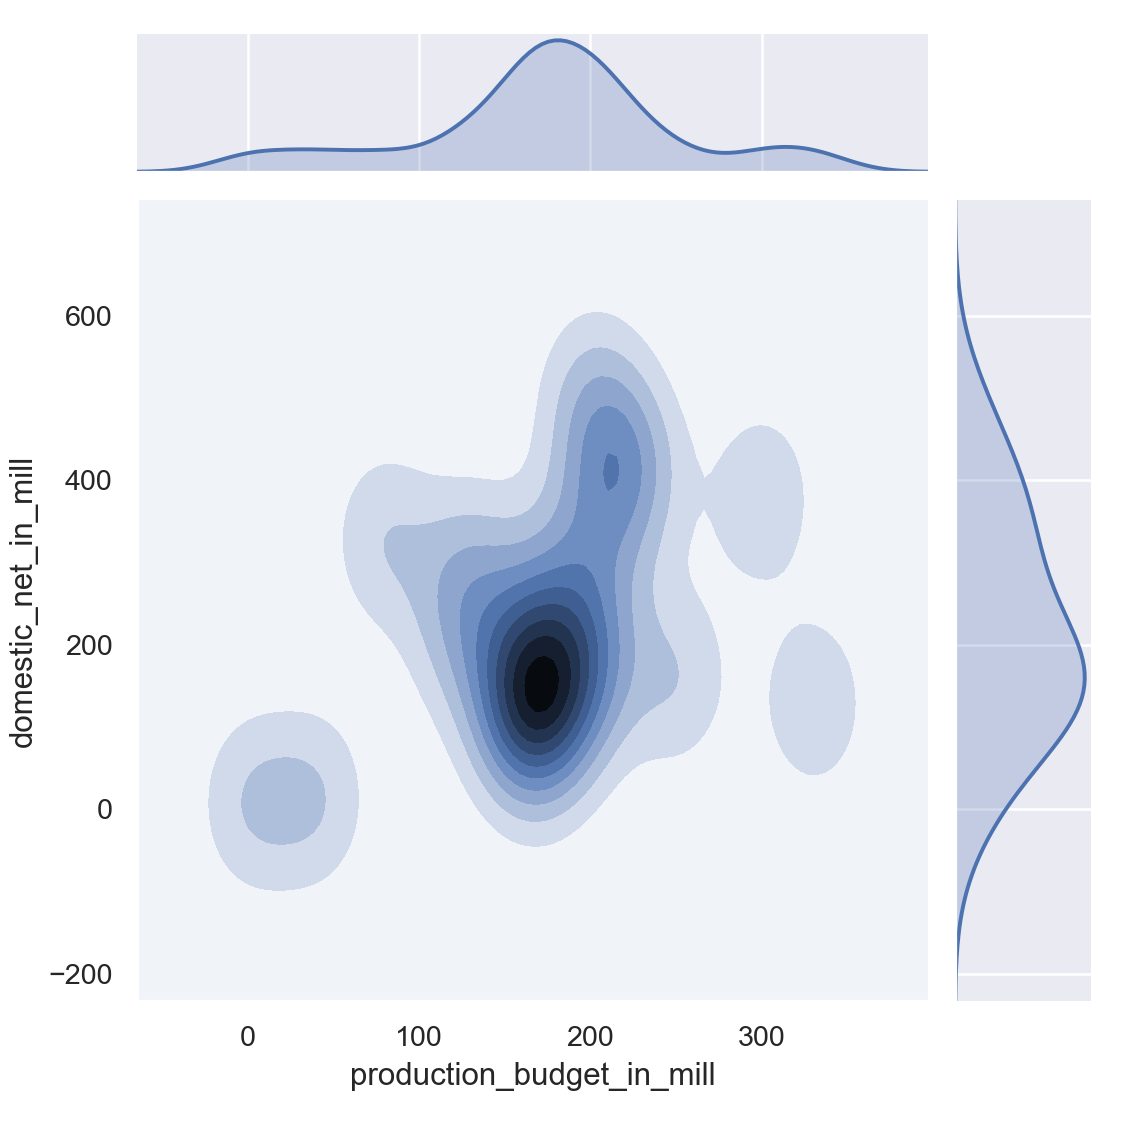

In [13]:
sns.jointplot(x=highest_net_month["production_budget_in_mill"], y=highest_net_month["domestic_net_in_mill"], kind='kde')

## Conclusion 

The final recommendation to Mircosoft pertaining to what genre would be the most profitable for them to make movies in would be 'Action, Adventure, Sci-Fi'. We concluded this finding from the following analysis discoveries:
  1. Out of the top 100 domestic gross movies over the past 30 years, the genre 'Action, Adventure, Sci-Fi' made up the largest successful genre group in that data sample.
    
    
  2. Our findings showed that releasing 'Action, Adventure, Sci-Fi' movies in late Spring/early-mid Summer, Spring Break week, during the holidays, and if it is a cultural movie, released during that culture's Heritage month, all proved to be the most profitable times of the year to release that genre. 
    
    
  3. Sticking to a production budget of 200 million dollars while producing an 'Action, Adventure, Sci-Fi' movie has proven to be the key ingredient to high net profitability that can be forecasted to be between 200-500 million dollars. 

## Question 2: What is the best day/month to release movies vs popularity/domestic net?

In [47]:
rel_movies = pd.read_csv("NewData/group_data (5).csv")
display(rel_movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 18 columns):
id                           4383 non-null int64
release_date                 4383 non-null object
movie                        4383 non-null object
production_budget            4383 non-null int64
domestic_gross               4383 non-null int64
genres                       2102 non-null object
tconst                       2121 non-null object
runtime                      2000 non-null float64
popularity                   1843 non-null float64
year_released                4383 non-null int64
release_day                  4383 non-null object
release_month                4383 non-null object
domestic_gross_in_mill       4383 non-null float64
production_budget_in_mill    4383 non-null float64
domestic_net_in_mill         4383 non-null float64
Return_on_Investment         4383 non-null float64
release_day_num              4383 non-null int64
release_month_num            4383 non-null

None

In [41]:
#Converting release_date to datetime 
rel_movies['release_date'] = pd.to_datetime(rel_movies['release_date'])

In [42]:
#Adding column domestic_net to get the domestic_gross - production_budget
rel_movies['domestic_net'] = rel_movies['domestic_gross'] - rel_movies['production_budget']
rel_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 19 columns):
id                           4383 non-null int64
release_date                 4383 non-null datetime64[ns]
movie                        4383 non-null object
production_budget            4383 non-null int64
domestic_gross               4383 non-null int64
genres                       2102 non-null object
tconst                       2121 non-null object
runtime                      2000 non-null float64
popularity                   1843 non-null float64
year_released                4383 non-null int64
release_day                  4383 non-null object
release_month                4383 non-null object
domestic_gross_in_mill       4383 non-null float64
production_budget_in_mill    4383 non-null float64
domestic_net_in_mill         4383 non-null float64
Return_on_Investment         4383 non-null float64
release_day_num              4383 non-null int64
release_month_num            4383 

We have created a visualization of the following correlations:
1. Release day vs domestic net profits
2. Release day vs popularity
3. Release month vs domestic net profits
4. Release month vs popularity

<IPython.core.display.Javascript object>


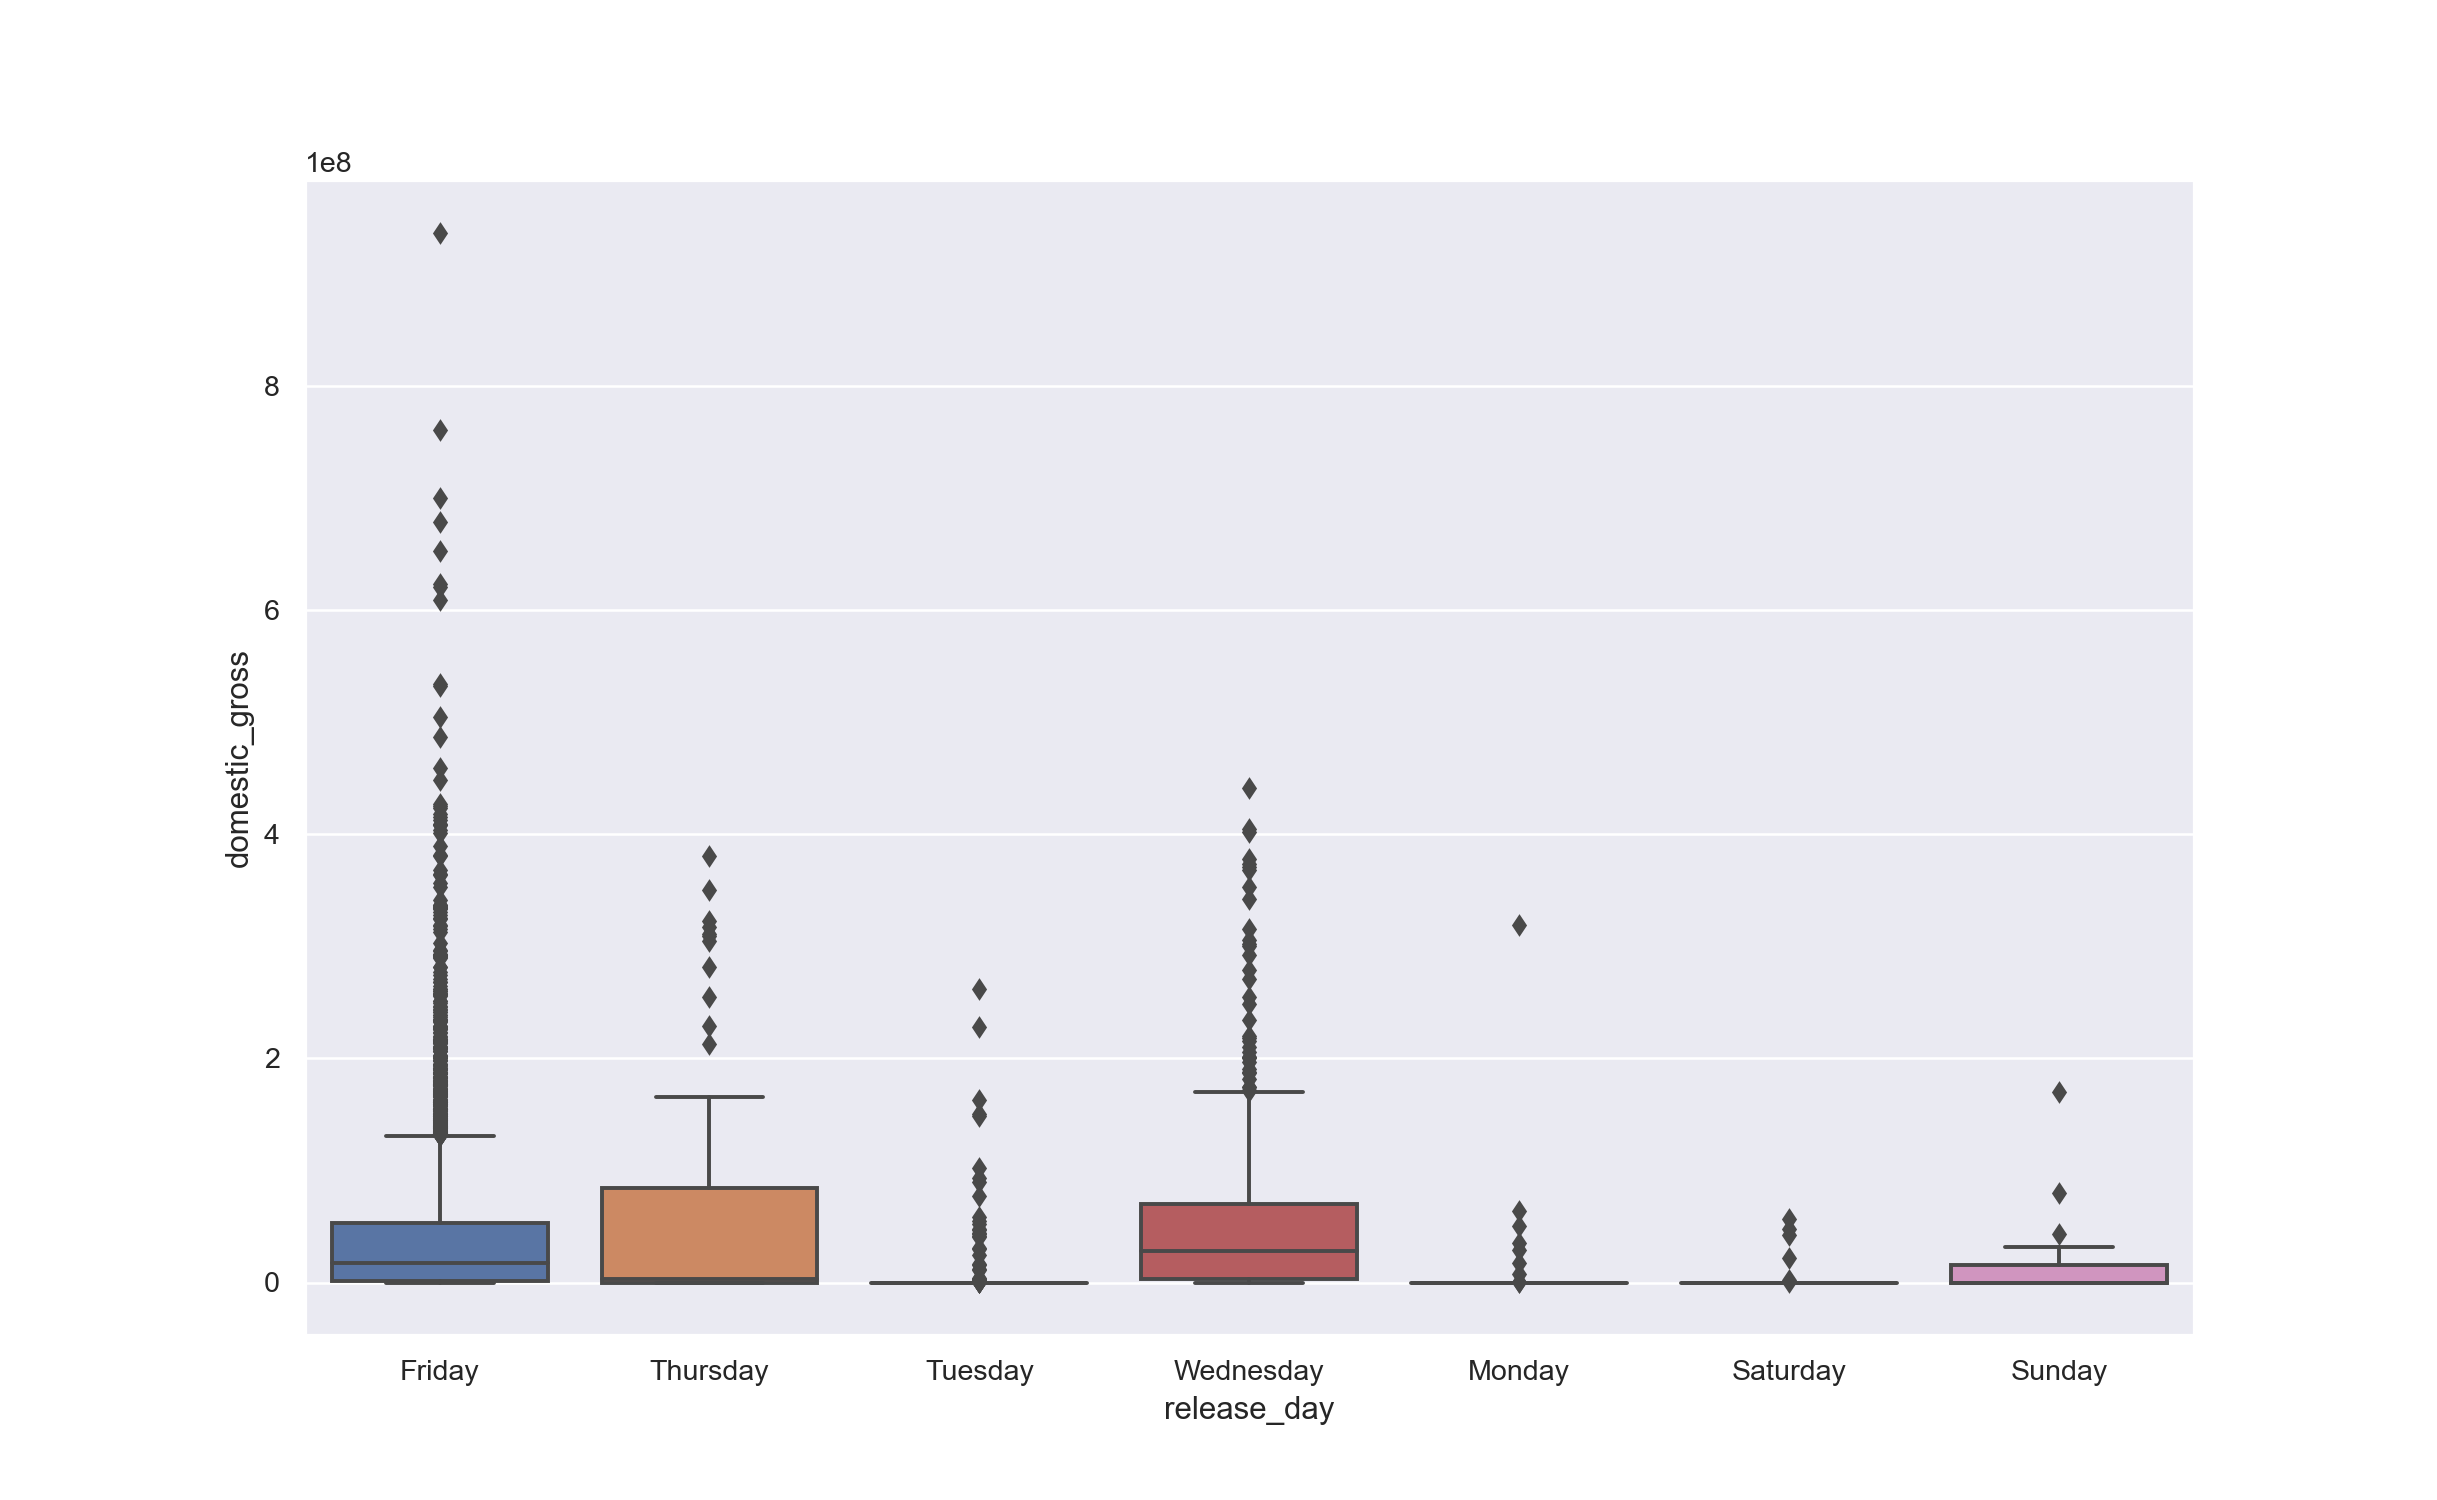

In [48]:
plt.figure(figsize=(13, 8))
sns.boxplot(x='release_day', y='domestic_gross', data=rel_movies)
plt.show()

<IPython.core.display.Javascript object>


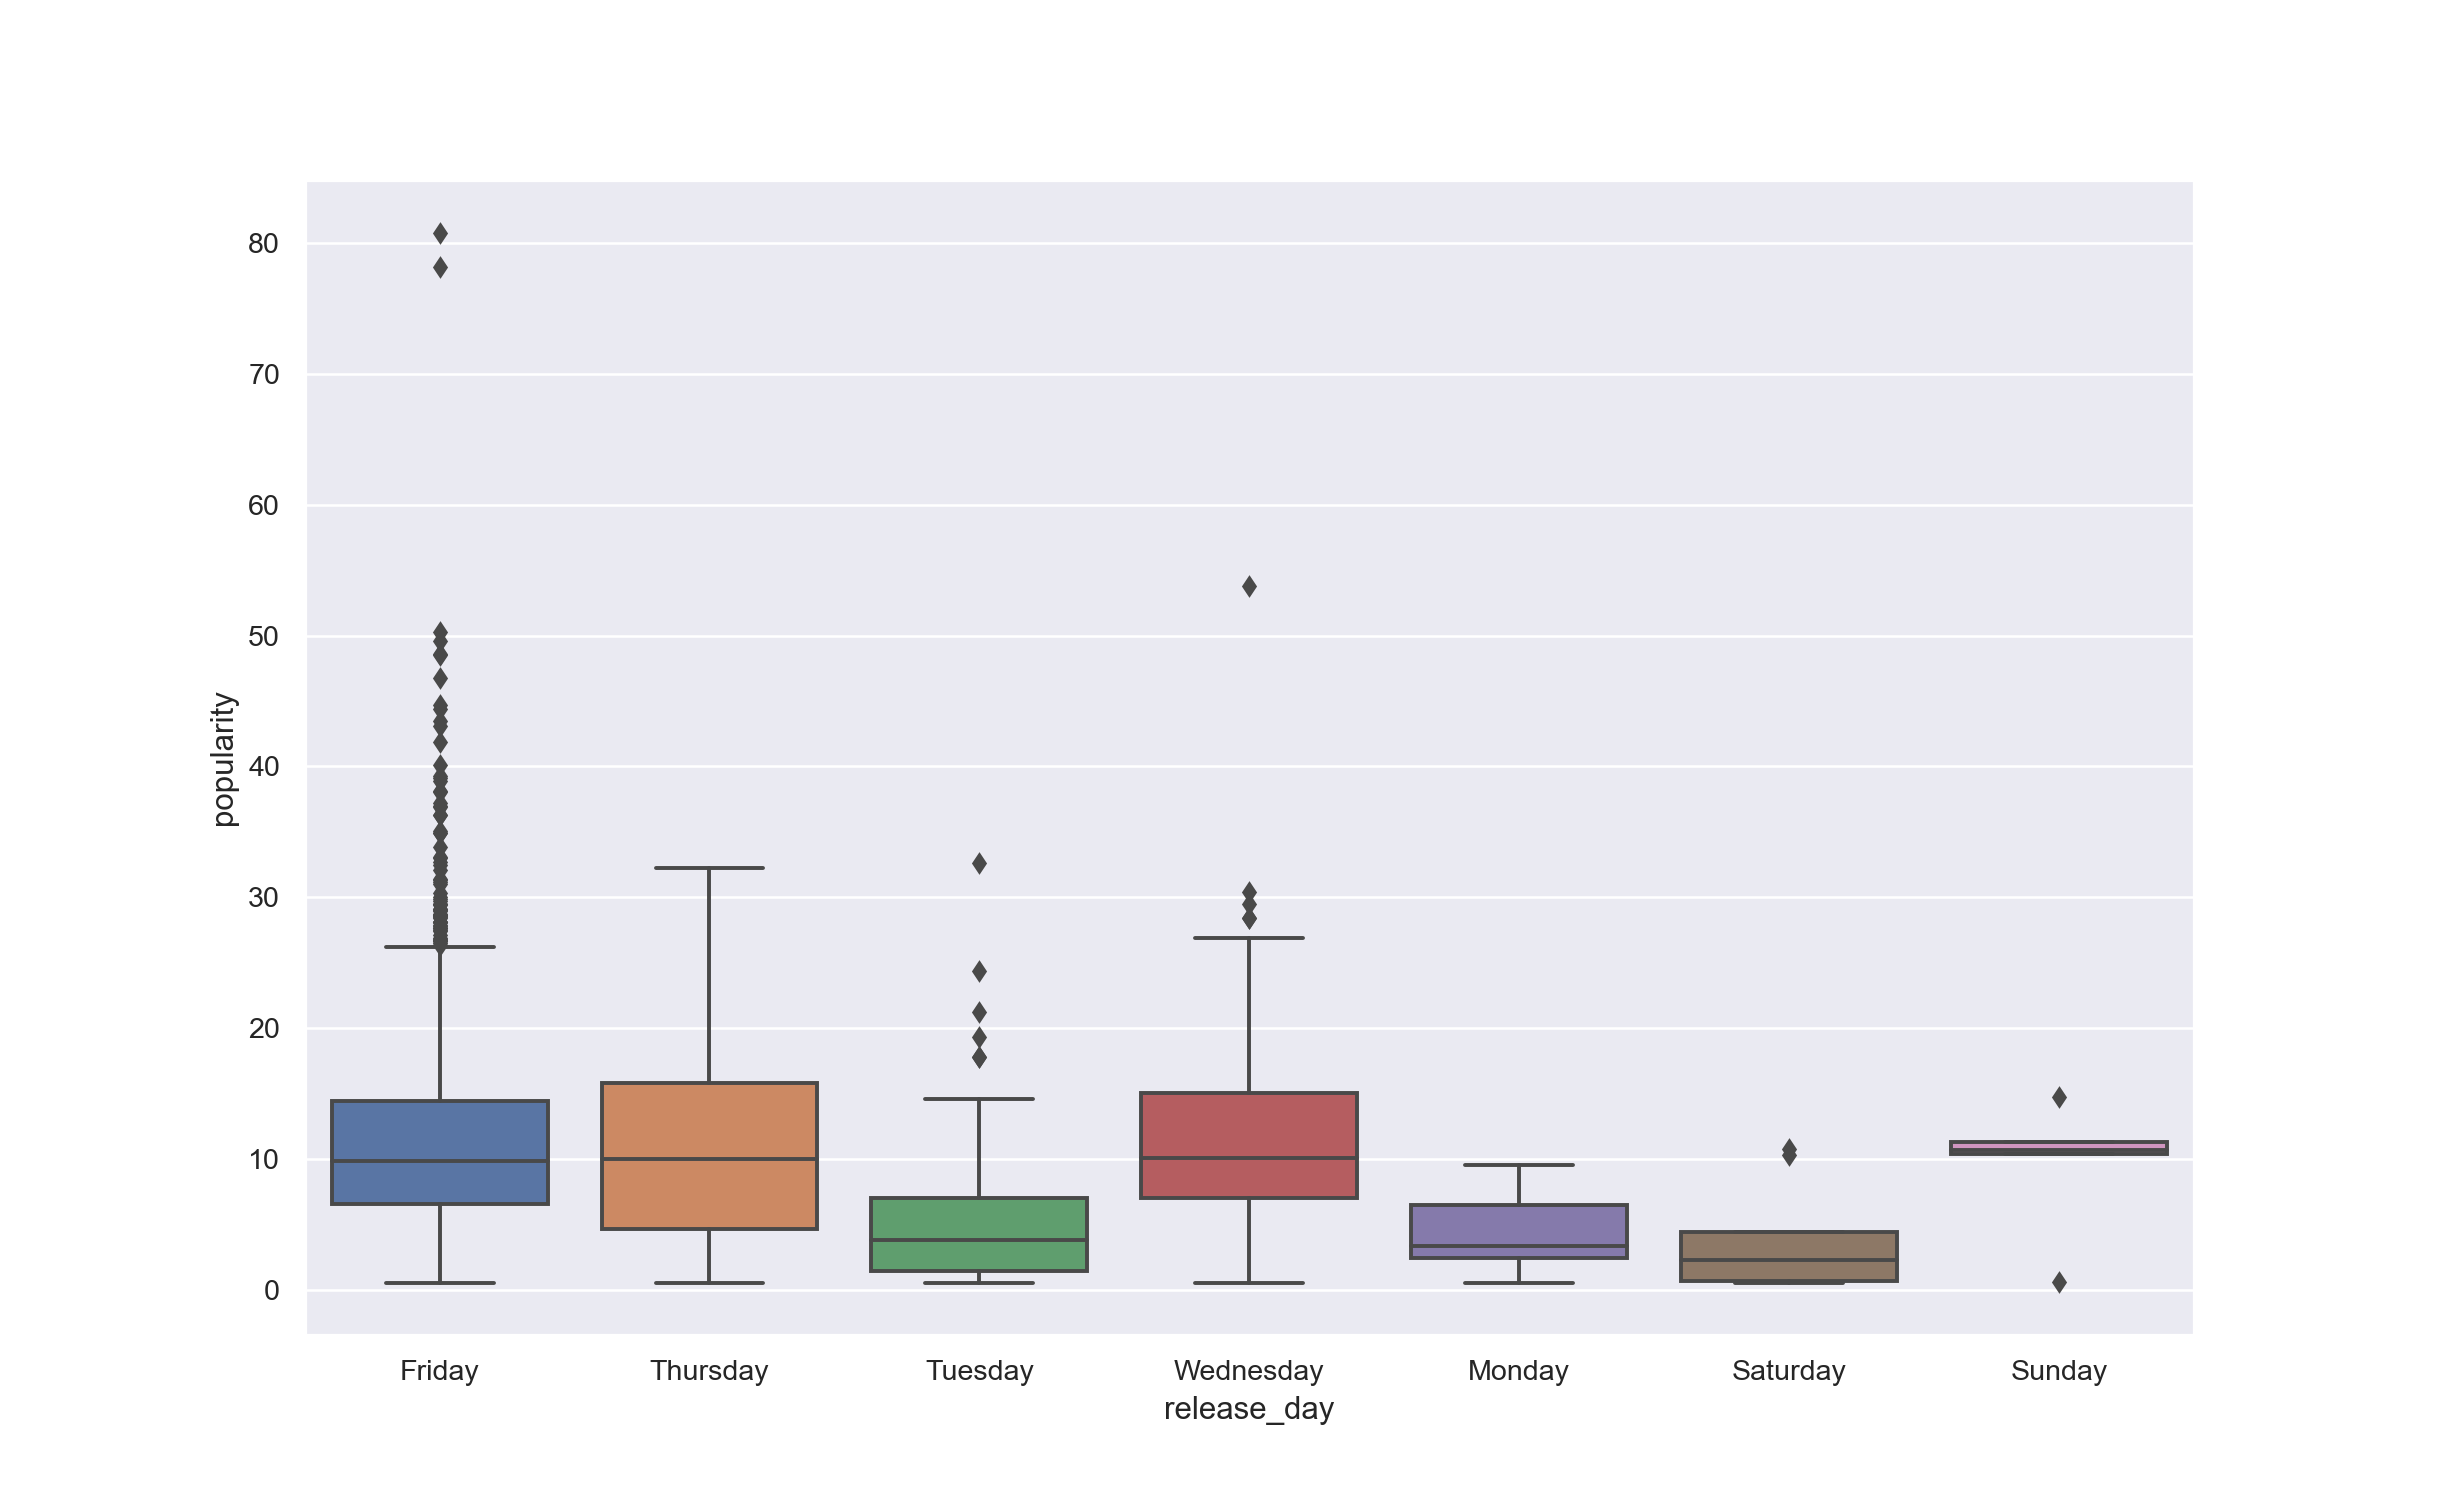

In [44]:
plt.figure(figsize=(13, 8))
sns.boxplot(x='release_day', y='popularity', data=rel_movies)
plt.show()

<IPython.core.display.Javascript object>


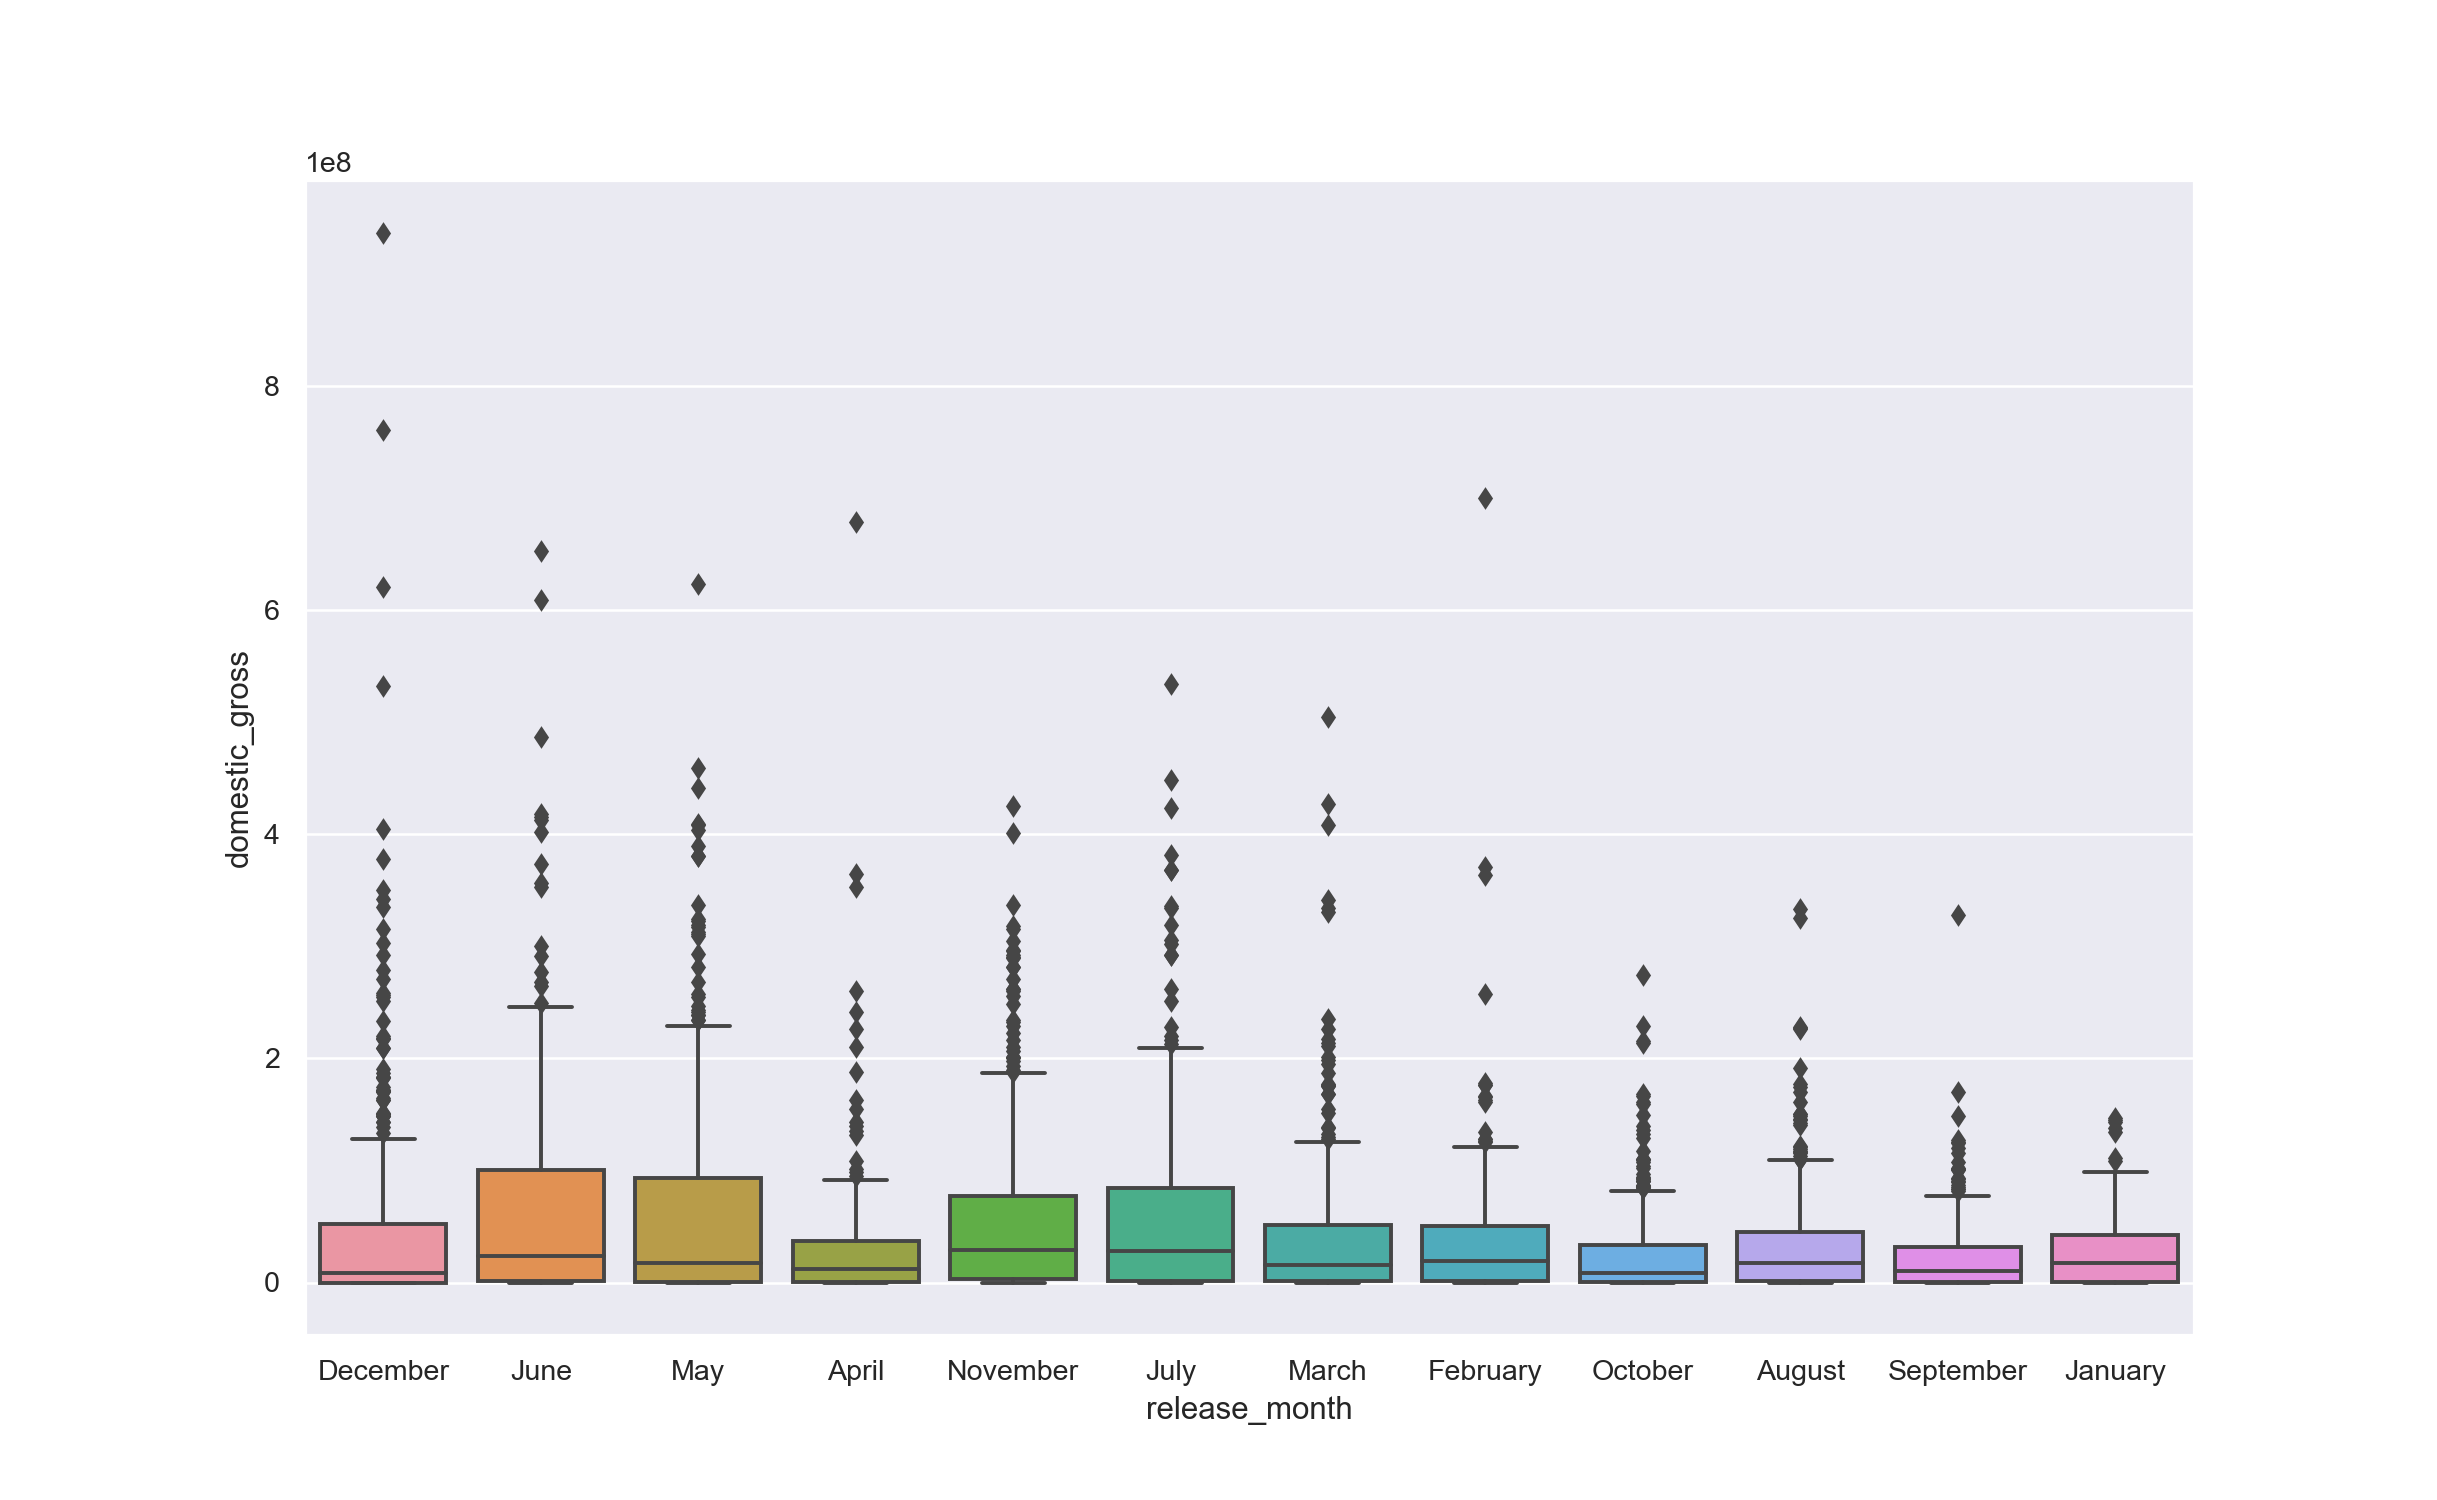

In [45]:
plt.figure(figsize=(13, 8))
sns.boxplot(x='release_month', y='domestic_gross', data=rel_movies)
plt.show()

<IPython.core.display.Javascript object>


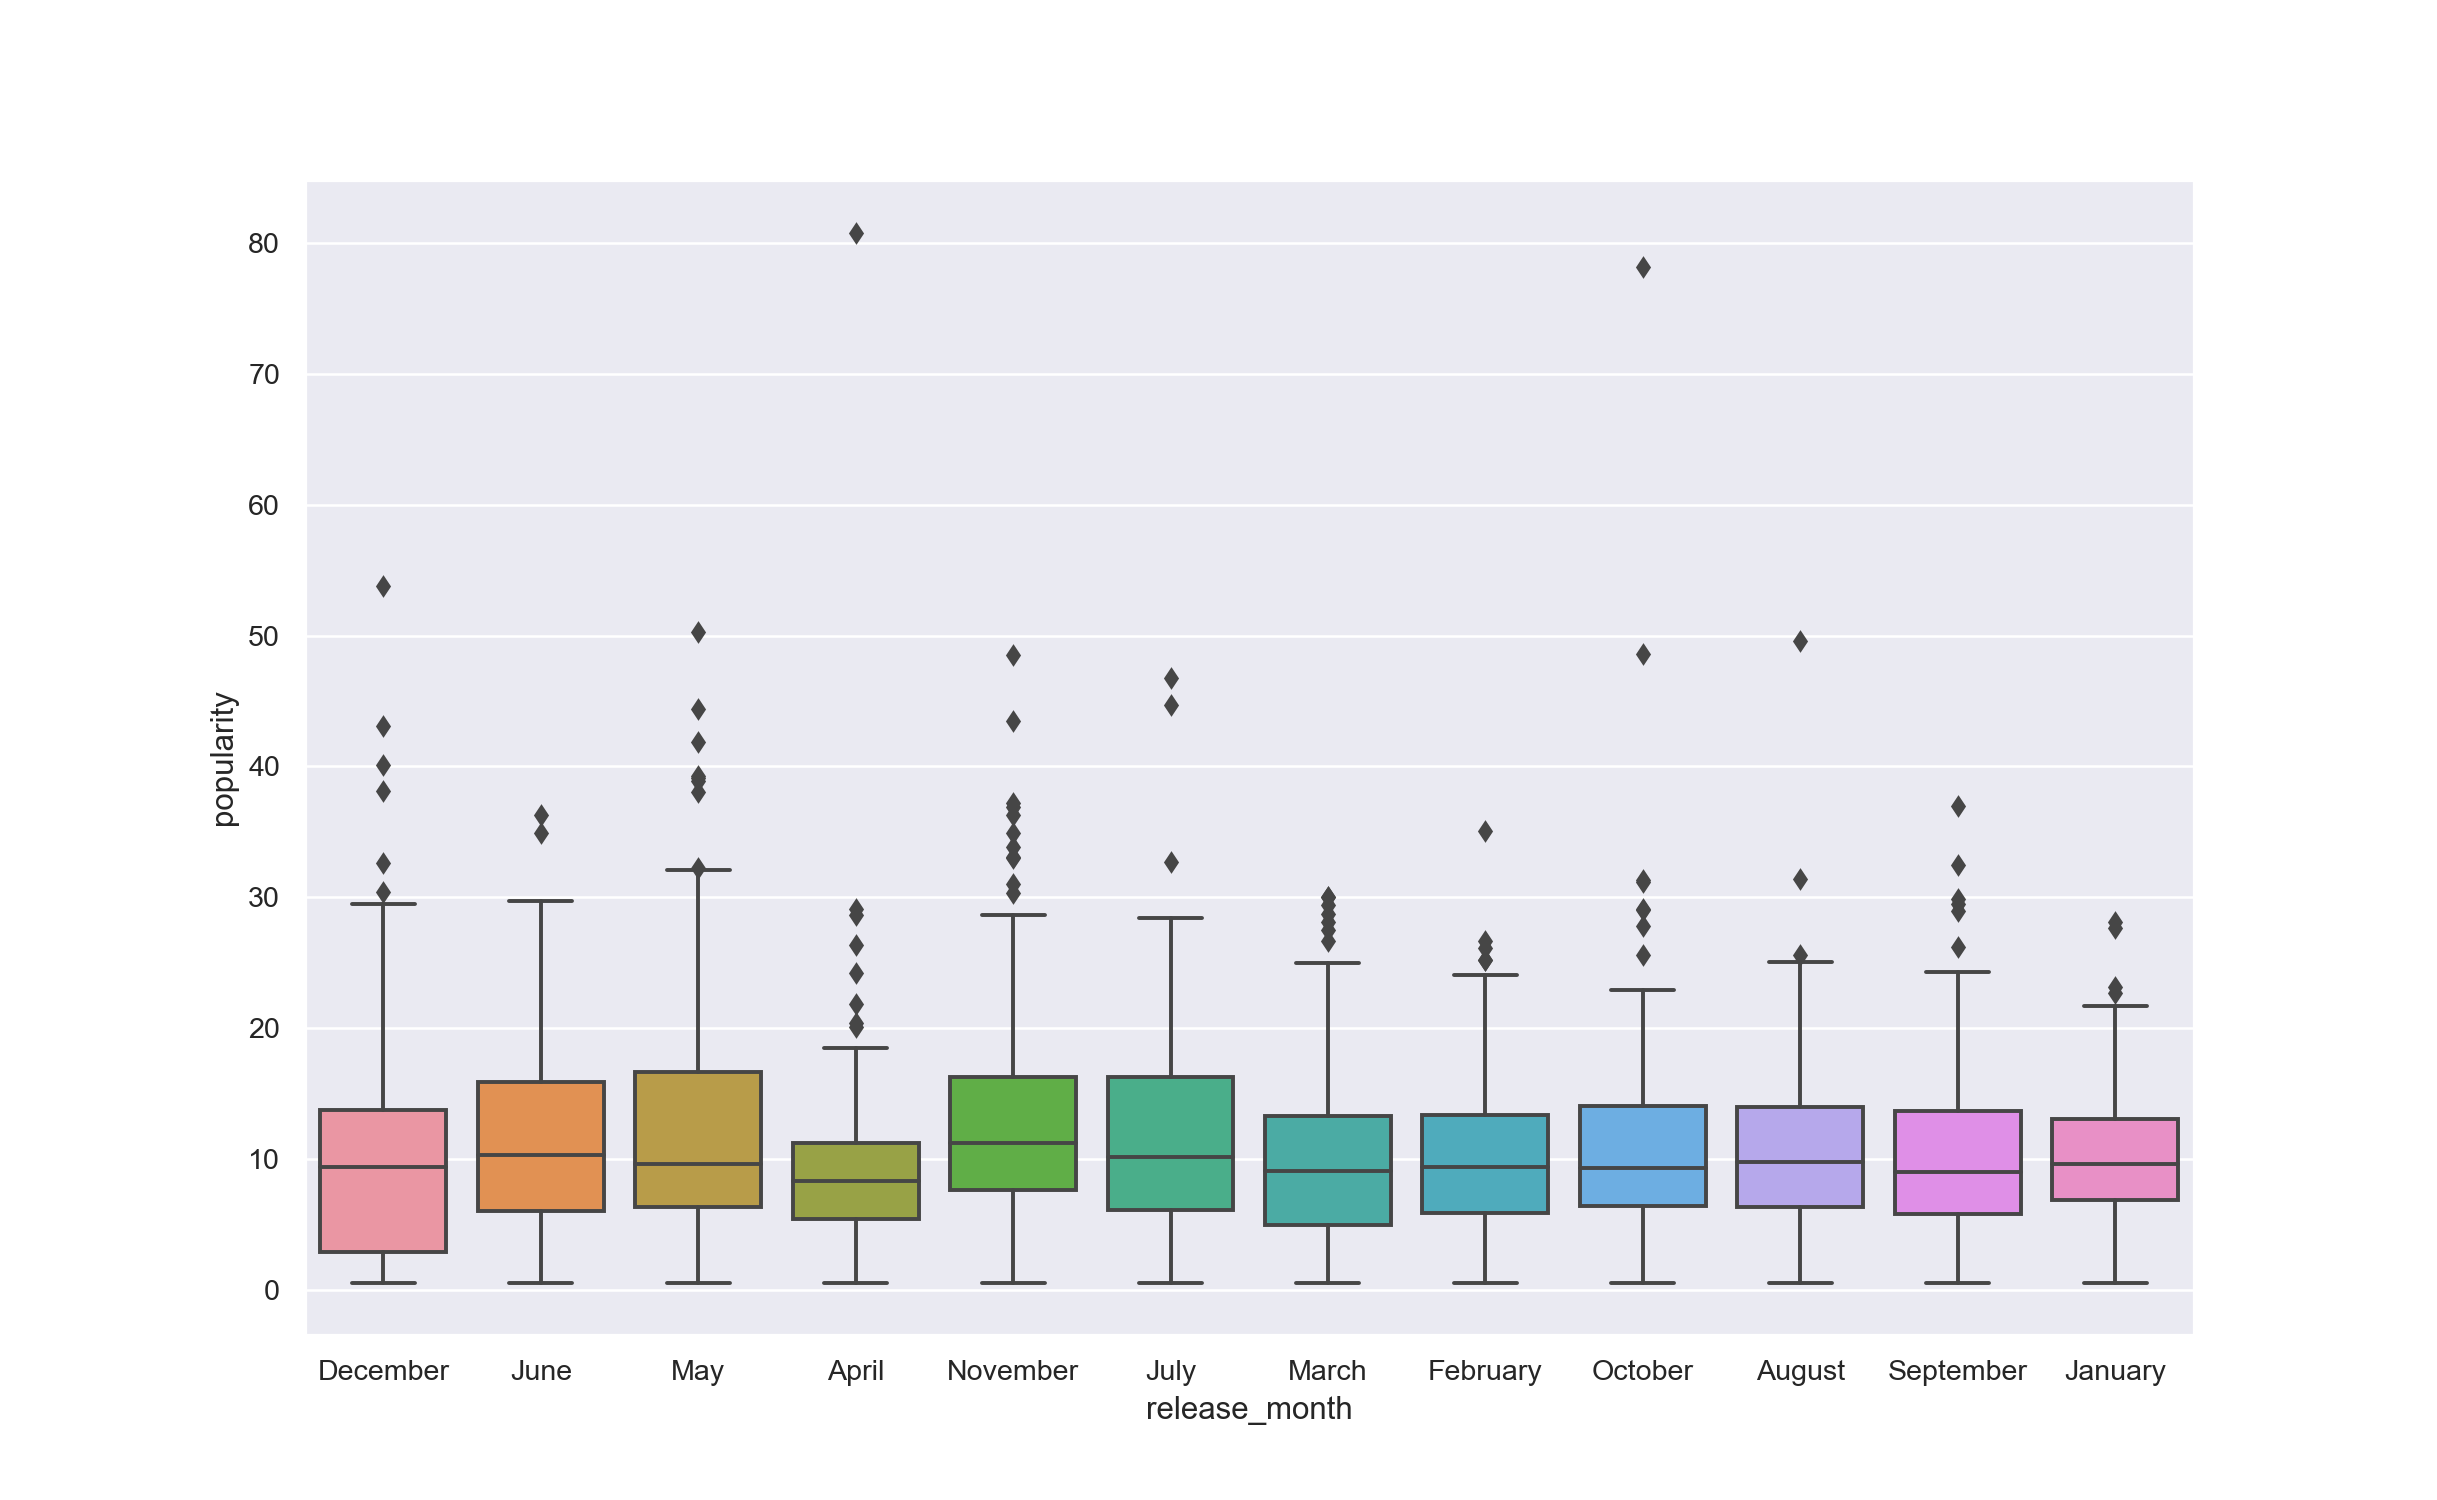

In [46]:
plt.figure(figsize=(13, 8))
sns.boxplot(x='release_month', y='popularity', data=rel_movies)
plt.show()

## Conclusion 
Friday is the best day to release a movie, in terms of both popularity and also domestic gross and December is the best month to release a movie,  in terms of both popularity and domestic gross.

Release movies on Friday due to higher views and in turn this will help drive up ticket sales as compared to other days. Set your release date to December to maximize gains and data has shown that it is better to push October or November release dates to December.

### Question 2b: Is there a relationship of run time of movies vs domestic gross, popularity and production budget?

Other Sub Questions answered: 
1. Examine a relationship between runtime and production budget

In [73]:
runtime_df = pd.read_csv("NewData/group_data (5).csv")
runtime_df

id release_date                                 movie  \
0      1   2009-12-18                                Avatar   
1      3   2019-06-07                          Dark Phoenix   
2      4   2015-05-01               Avengers: Age of Ultron   
3      5   2017-12-15     Star Wars Ep. VIII: The Last Jedi   
4      6   2015-12-18  Star Wars Ep. VII: The Force Awakens   
...   ..          ...                                   ...   
4378  77   2004-12-31                       The Mongol King   
4379  78   2018-12-31                                Red 11   
4380  80   2005-07-13         Return to the Land of Wonders   
4381  81   2015-09-29                  A Plague So Pleasant   
4382  82   2005-08-05                     My Date With Drew   

      production_budget  domestic_gross                   genres     tconst  \
0             425000000       760507625                   Horror  tt1775309   
1             350000000        42762350  Action,Adventure,Sci-Fi  tt6565702   
2             330600000       459005868  Action,Adventure,Sci-Fi  tt2395427   
3             317000000       620181382                      NaN        NaN   
4             306000000       936662225                      NaN        NaN   
...                 ...             ...                      ...        ...   
4378               7000             900                      NaN        NaN   
4379               7000               0   Horror,Sci-Fi,Thriller  tt7837402   
4380               5000            1338                      NaN        NaN   
4381               1400               0    Drama,Horror,Thriller  tt2107644   
4382               1100          181041                      NaN        NaN   

      runtime  popularity  year_released release_day release_month  \
0        93.0      26.526           2009      Friday      December   
1       113.0         NaN           2019      Friday          June   
2       141.0      44.383           2015      Friday           May   
3         NaN         NaN           2017      Friday      December   
4         NaN         NaN           2015      Friday      December   
...       ...         ...            ...         ...           ...   
4378      NaN         NaN           2004      Friday      December   
4379     77.0         NaN           2018      Monday      December   
4380      NaN         NaN           2005   Wednesday          July   
4381     76.0         NaN           2015     Tuesday     September   
4382      NaN         NaN           2005      Friday        August   

      domestic_gross_in_mill  production_budget_in_mill  domestic_net_in_mill  \
0                 760.507625                   425.0000            335.507625   
1                  42.762350                   350.0000           -307.237650   
2                 459.005868                   330.6000            128.405868   
3                 620.181382                   317.0000            303.181382   
4                 936.662225                   306.0000            630.662225   
...                      ...                        ...                   ...   
4378                0.000900                     0.0070             -0.006100   
4379                0.000000                     0.0070             -0.007000   
4380                0.001338                     0.0050             -0.003662   
4381                0.000000                     0.0014             -0.001400   
4382                0.181041                     0.0011              0.179941   

      Return_on_Investment  release_day_num  release_month_num  
0                78.942971               18                 12  
1               -87.782186                7                  6  
2                38.840250                1                  5  
3                95.640815               15                 12  
4               206.098766               18                 12  
...                    ...              ...                ...  
4378            -87.142857     

In [75]:
runtime_df['release_date'] = pd.to_datetime(runtime_df['release_date'])  #runtime vs domestic_gross , runtime vs rating , runtime vs prod_cost

Let us see the mean runtime of 100 highest grossing movies

In [76]:
top100 = runtime_df.nlargest(100,'domestic_gross')
print(top100['runtime'].mean())
print(top100['runtime'].median())

123.43859649122807
124.0


Let us see the mean runtime of 100 lowest grossing movies

In [79]:
bot100 = runtime_df.loc[runtime_df['domestic_gross'] > 0]
bot100 = bot100.nsmallest(100,'domestic_gross')
print(bot100['runtime'].mean())
print(bot100['runtime'].median())

95.32608695652173
93.0


Next we will visualize the following relationships for the top 100 movies:
1. Runtime vs. domestic gross profit top 100 movies.
2. Runtime vs. domestic gross profit bottom 100 movies.
3. Runtime vs. popularity

<IPython.core.display.Javascript object>


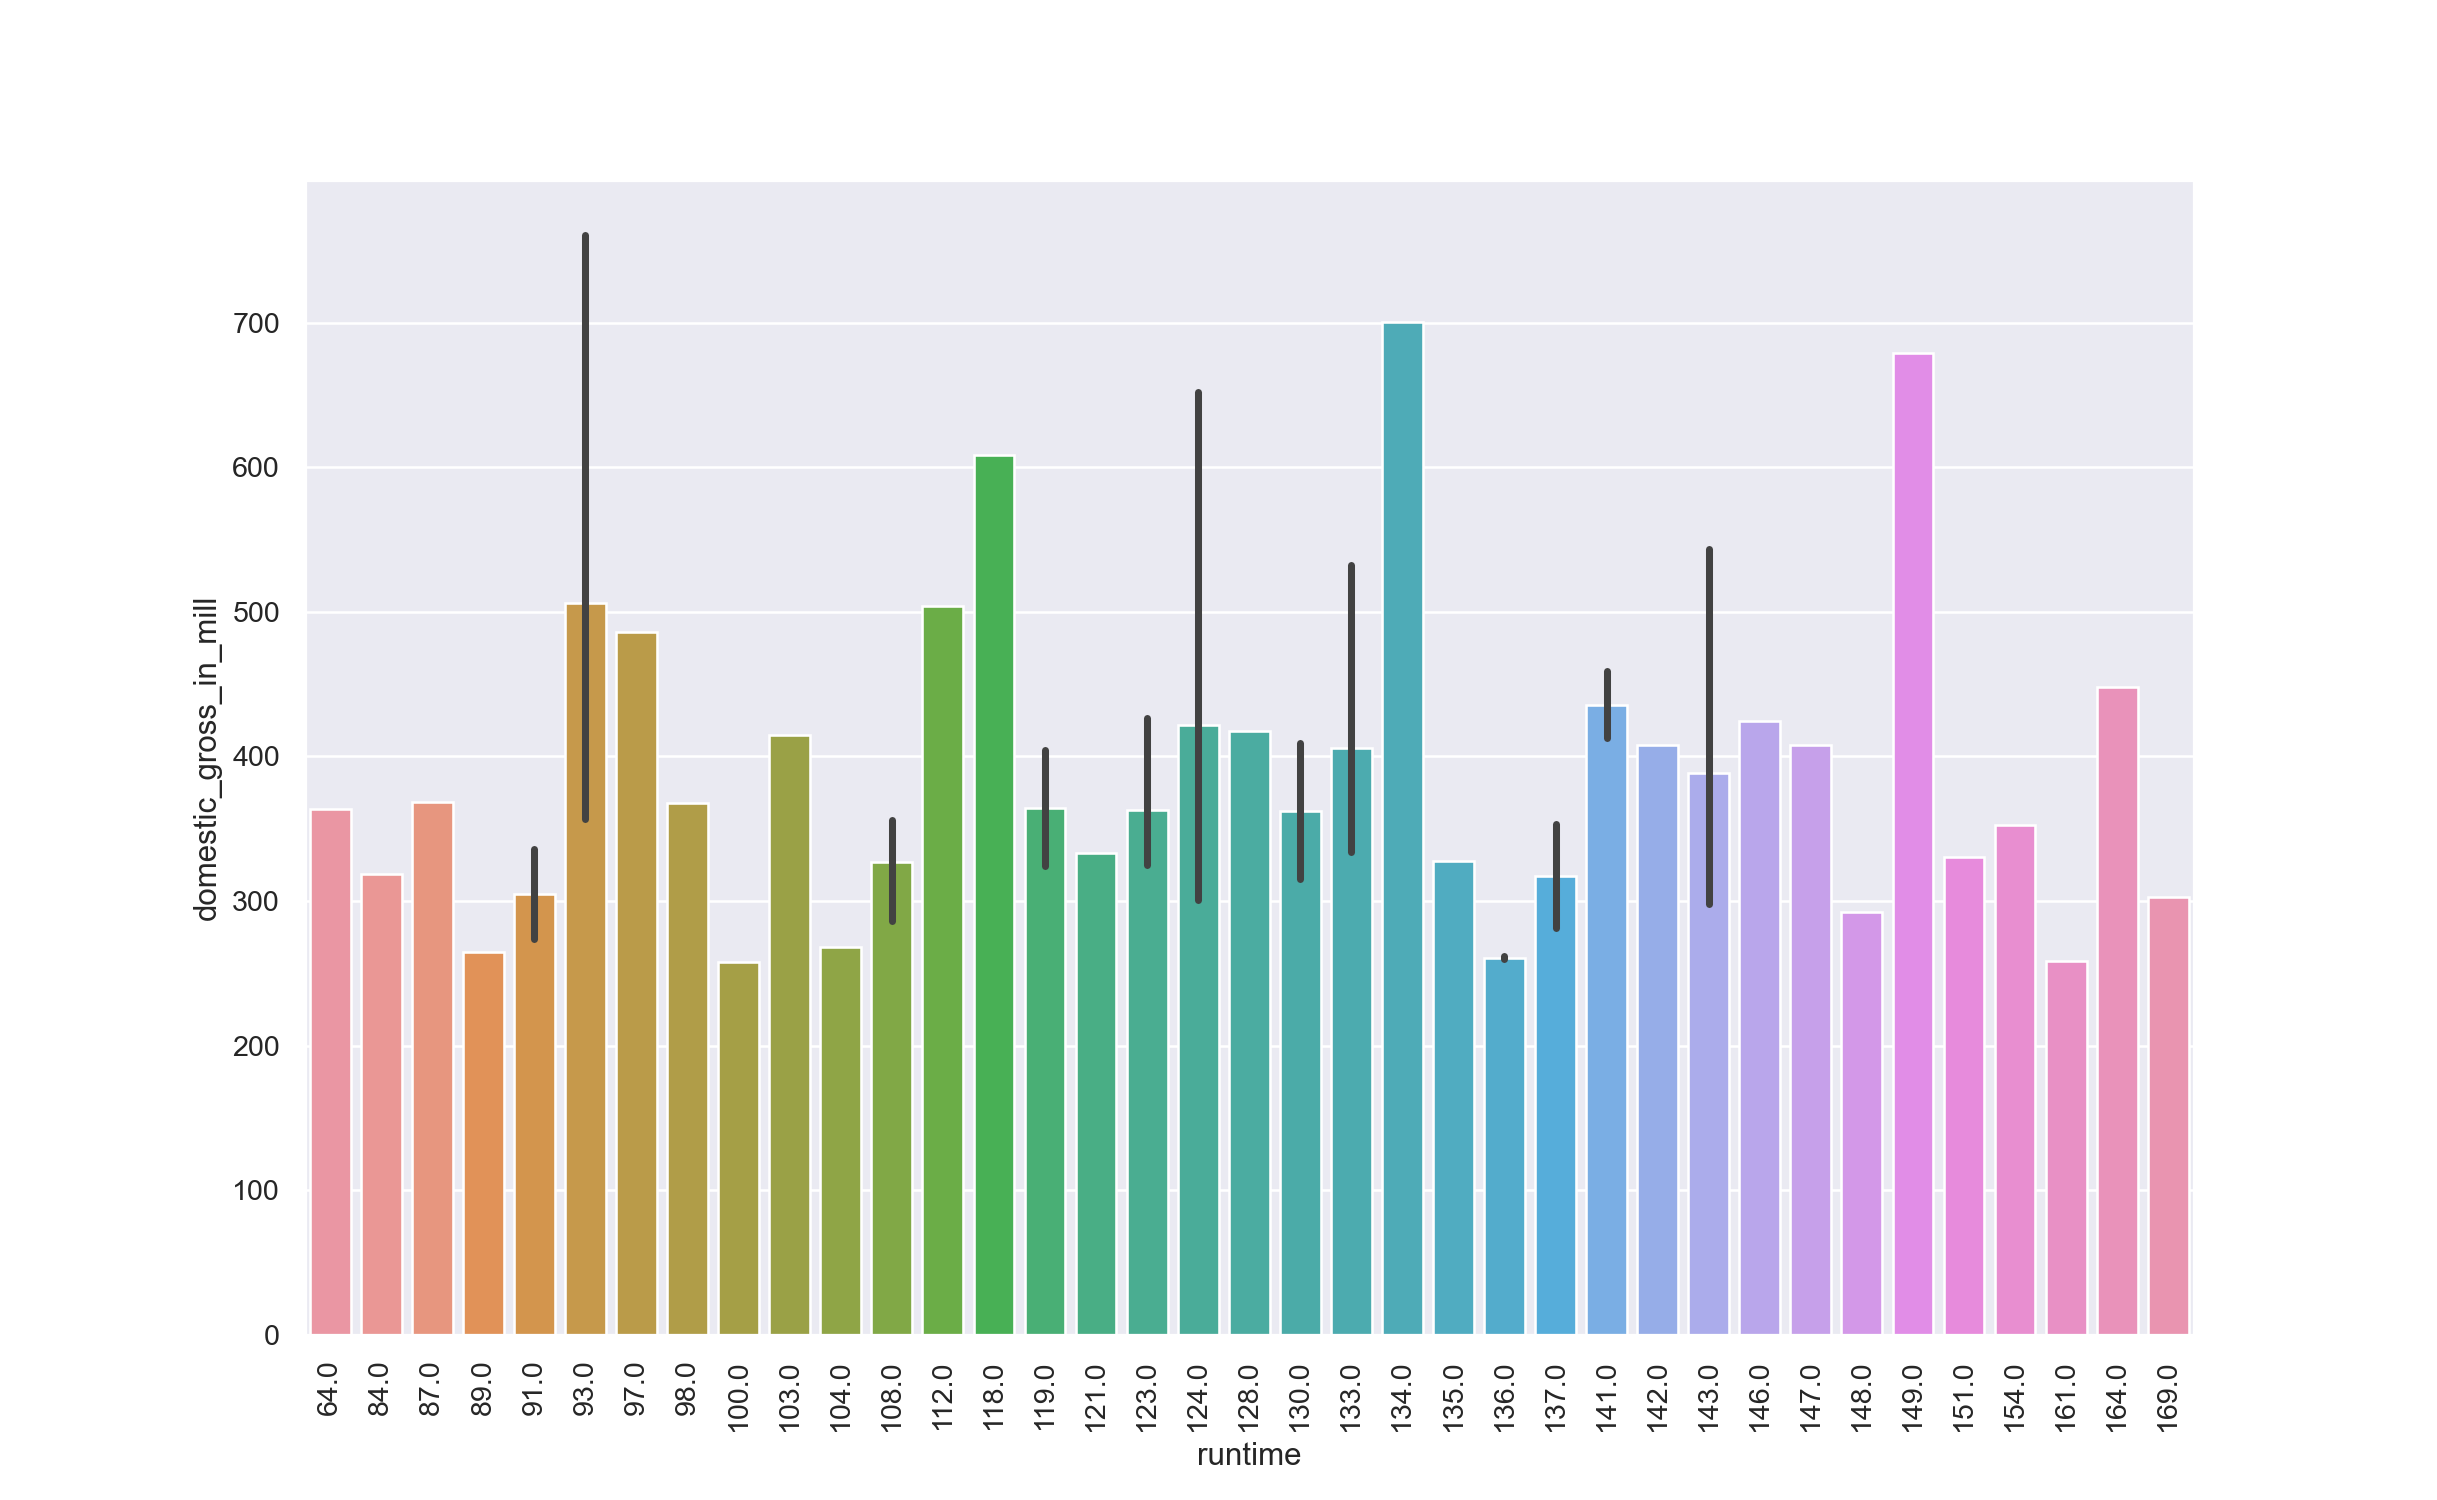

In [80]:
plt.figure(figsize=(13, 8))
sns.barplot(x='runtime', y='domestic_gross_in_mill', data=top100)
plt.xticks(rotation=90)
plt.show()

<IPython.core.display.Javascript object>


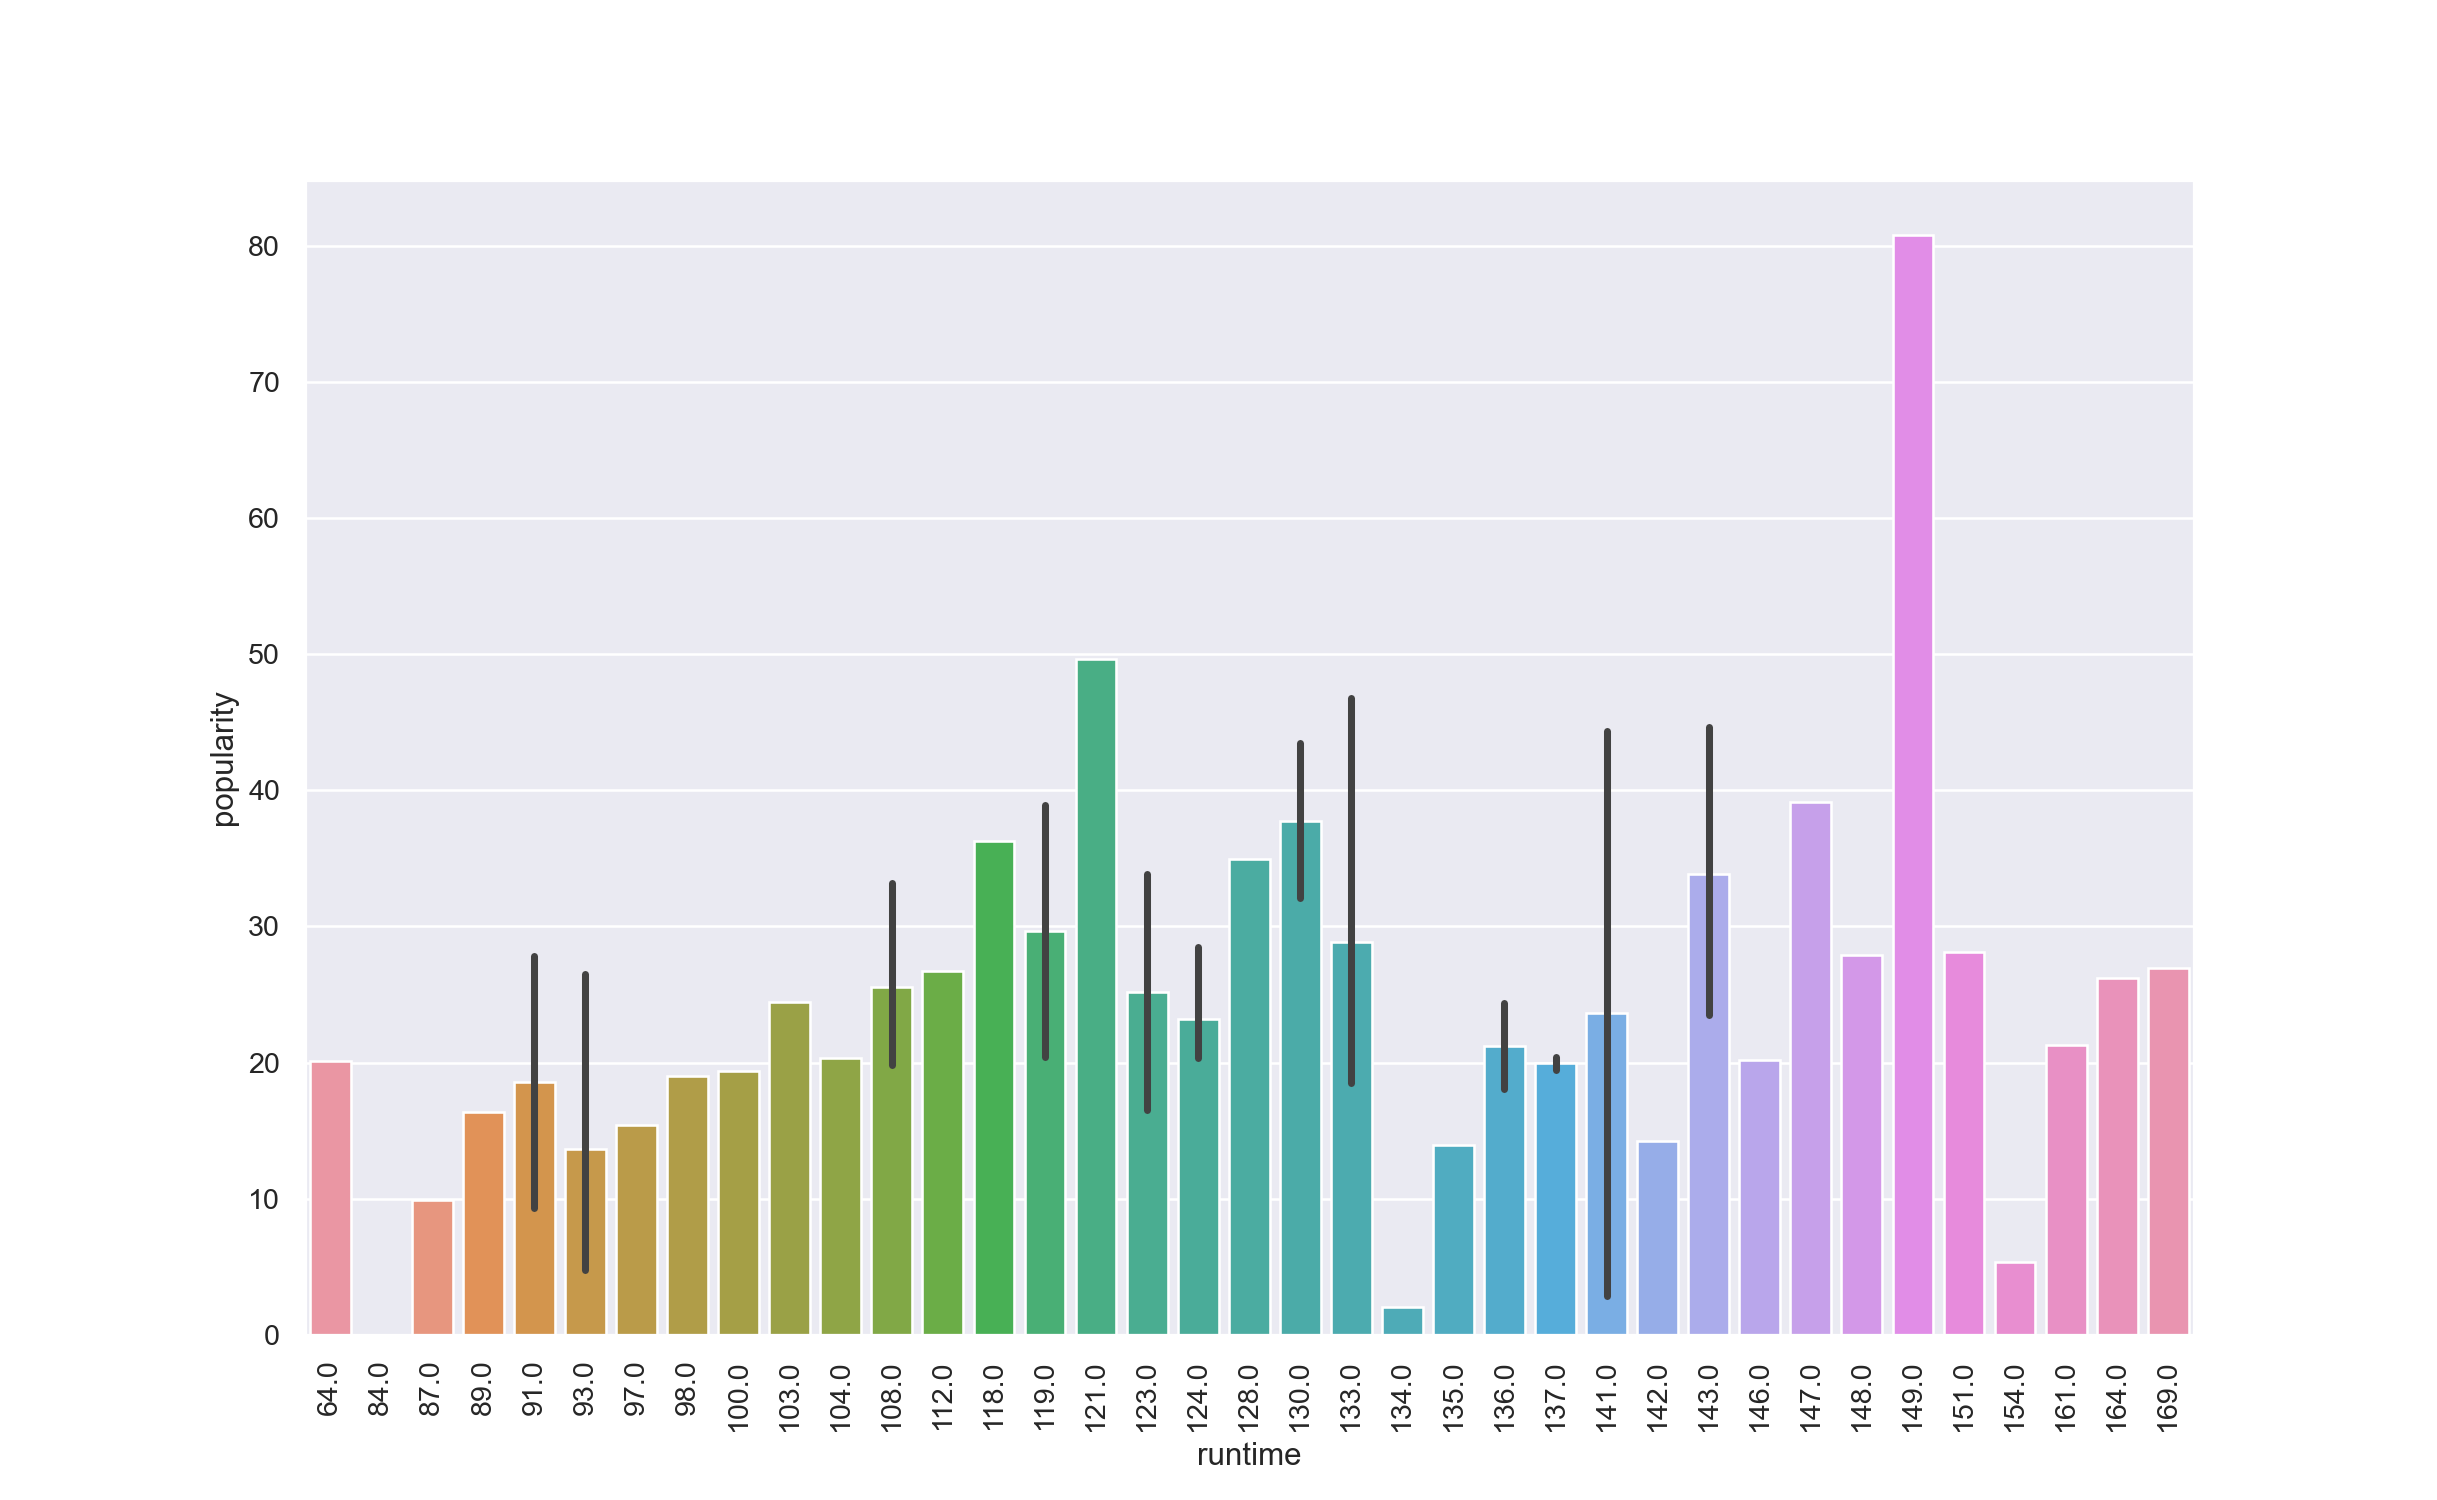

In [81]:
plt.figure(figsize=(13, 8))
sns.barplot(x='runtime', y='popularity', data=top100)
plt.xticks(rotation=90)
plt.show()

<IPython.core.display.Javascript object>


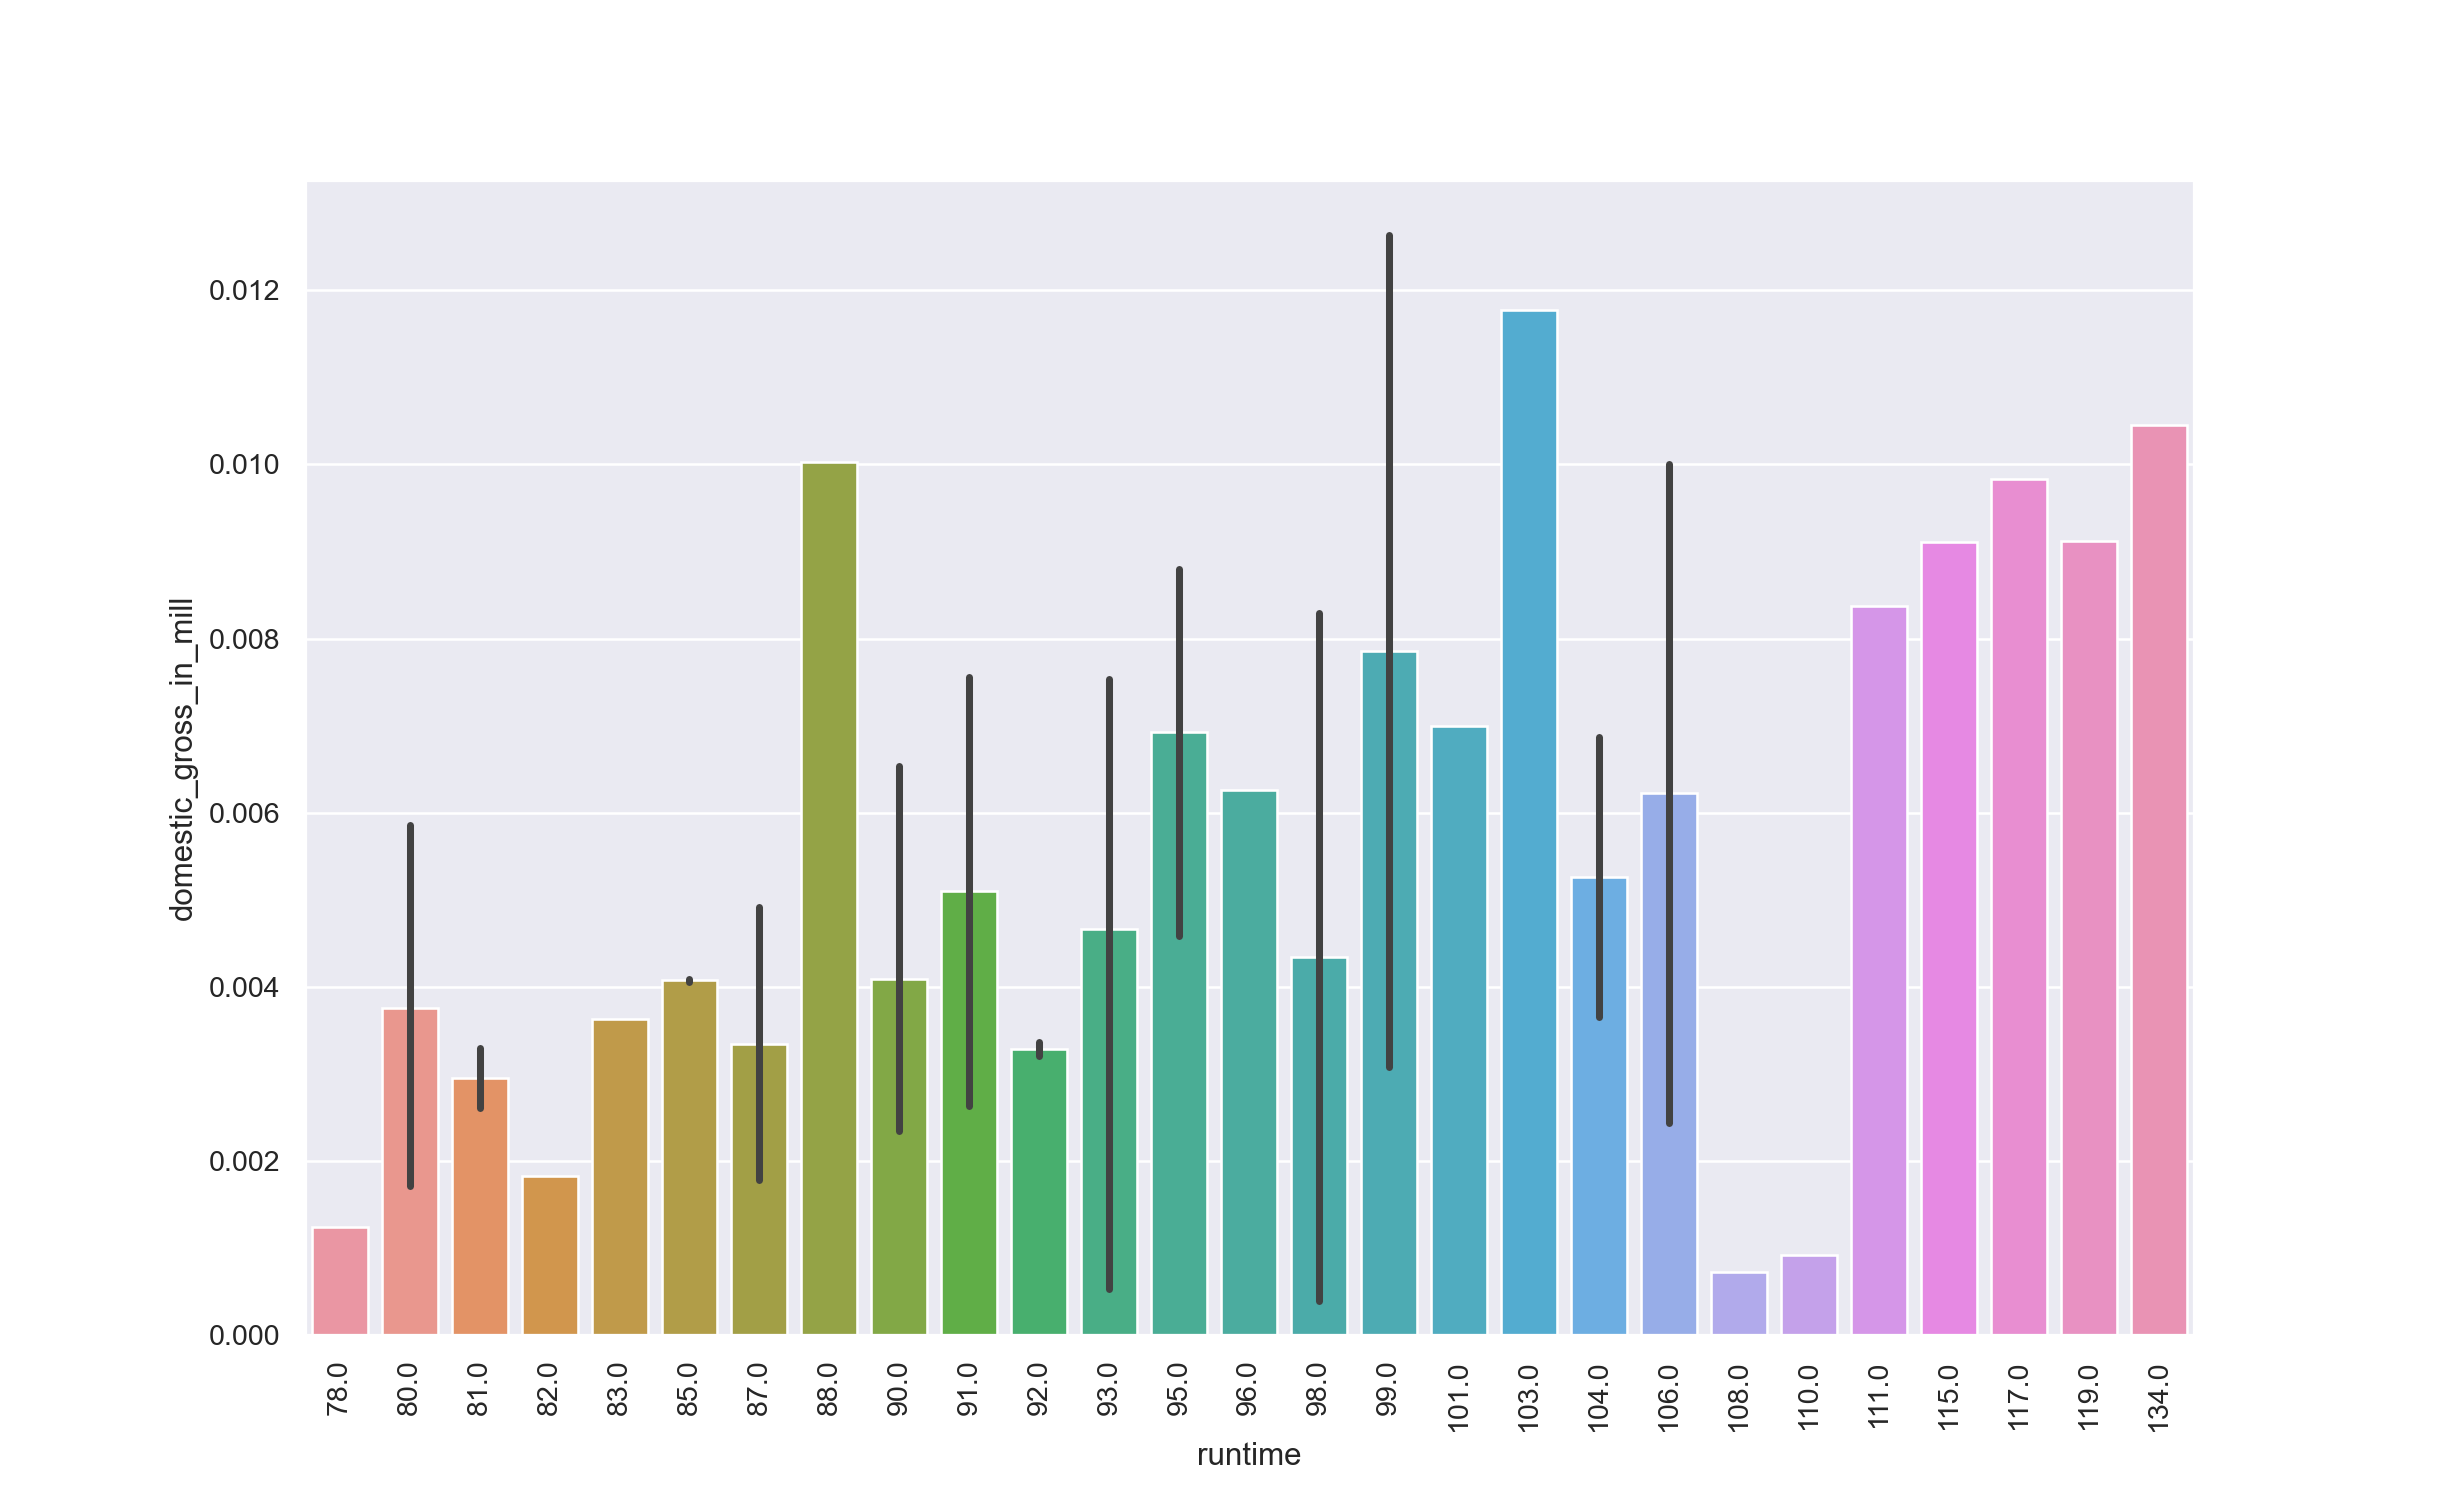

In [82]:
plt.figure(figsize=(13, 8))
sns.barplot(x='runtime', y='domestic_gross_in_mill', data=bot100)
plt.xticks(rotation=90)
plt.show()

Now we will explore the relationship between runtime and production budget.

In [83]:
runtime_df2 = runtime_df.drop(columns=['id','release_date','movie','genres','tconst','popularity','year_released','release_day','release_month','production_budget','domestic_gross'])

<IPython.core.display.Javascript object>


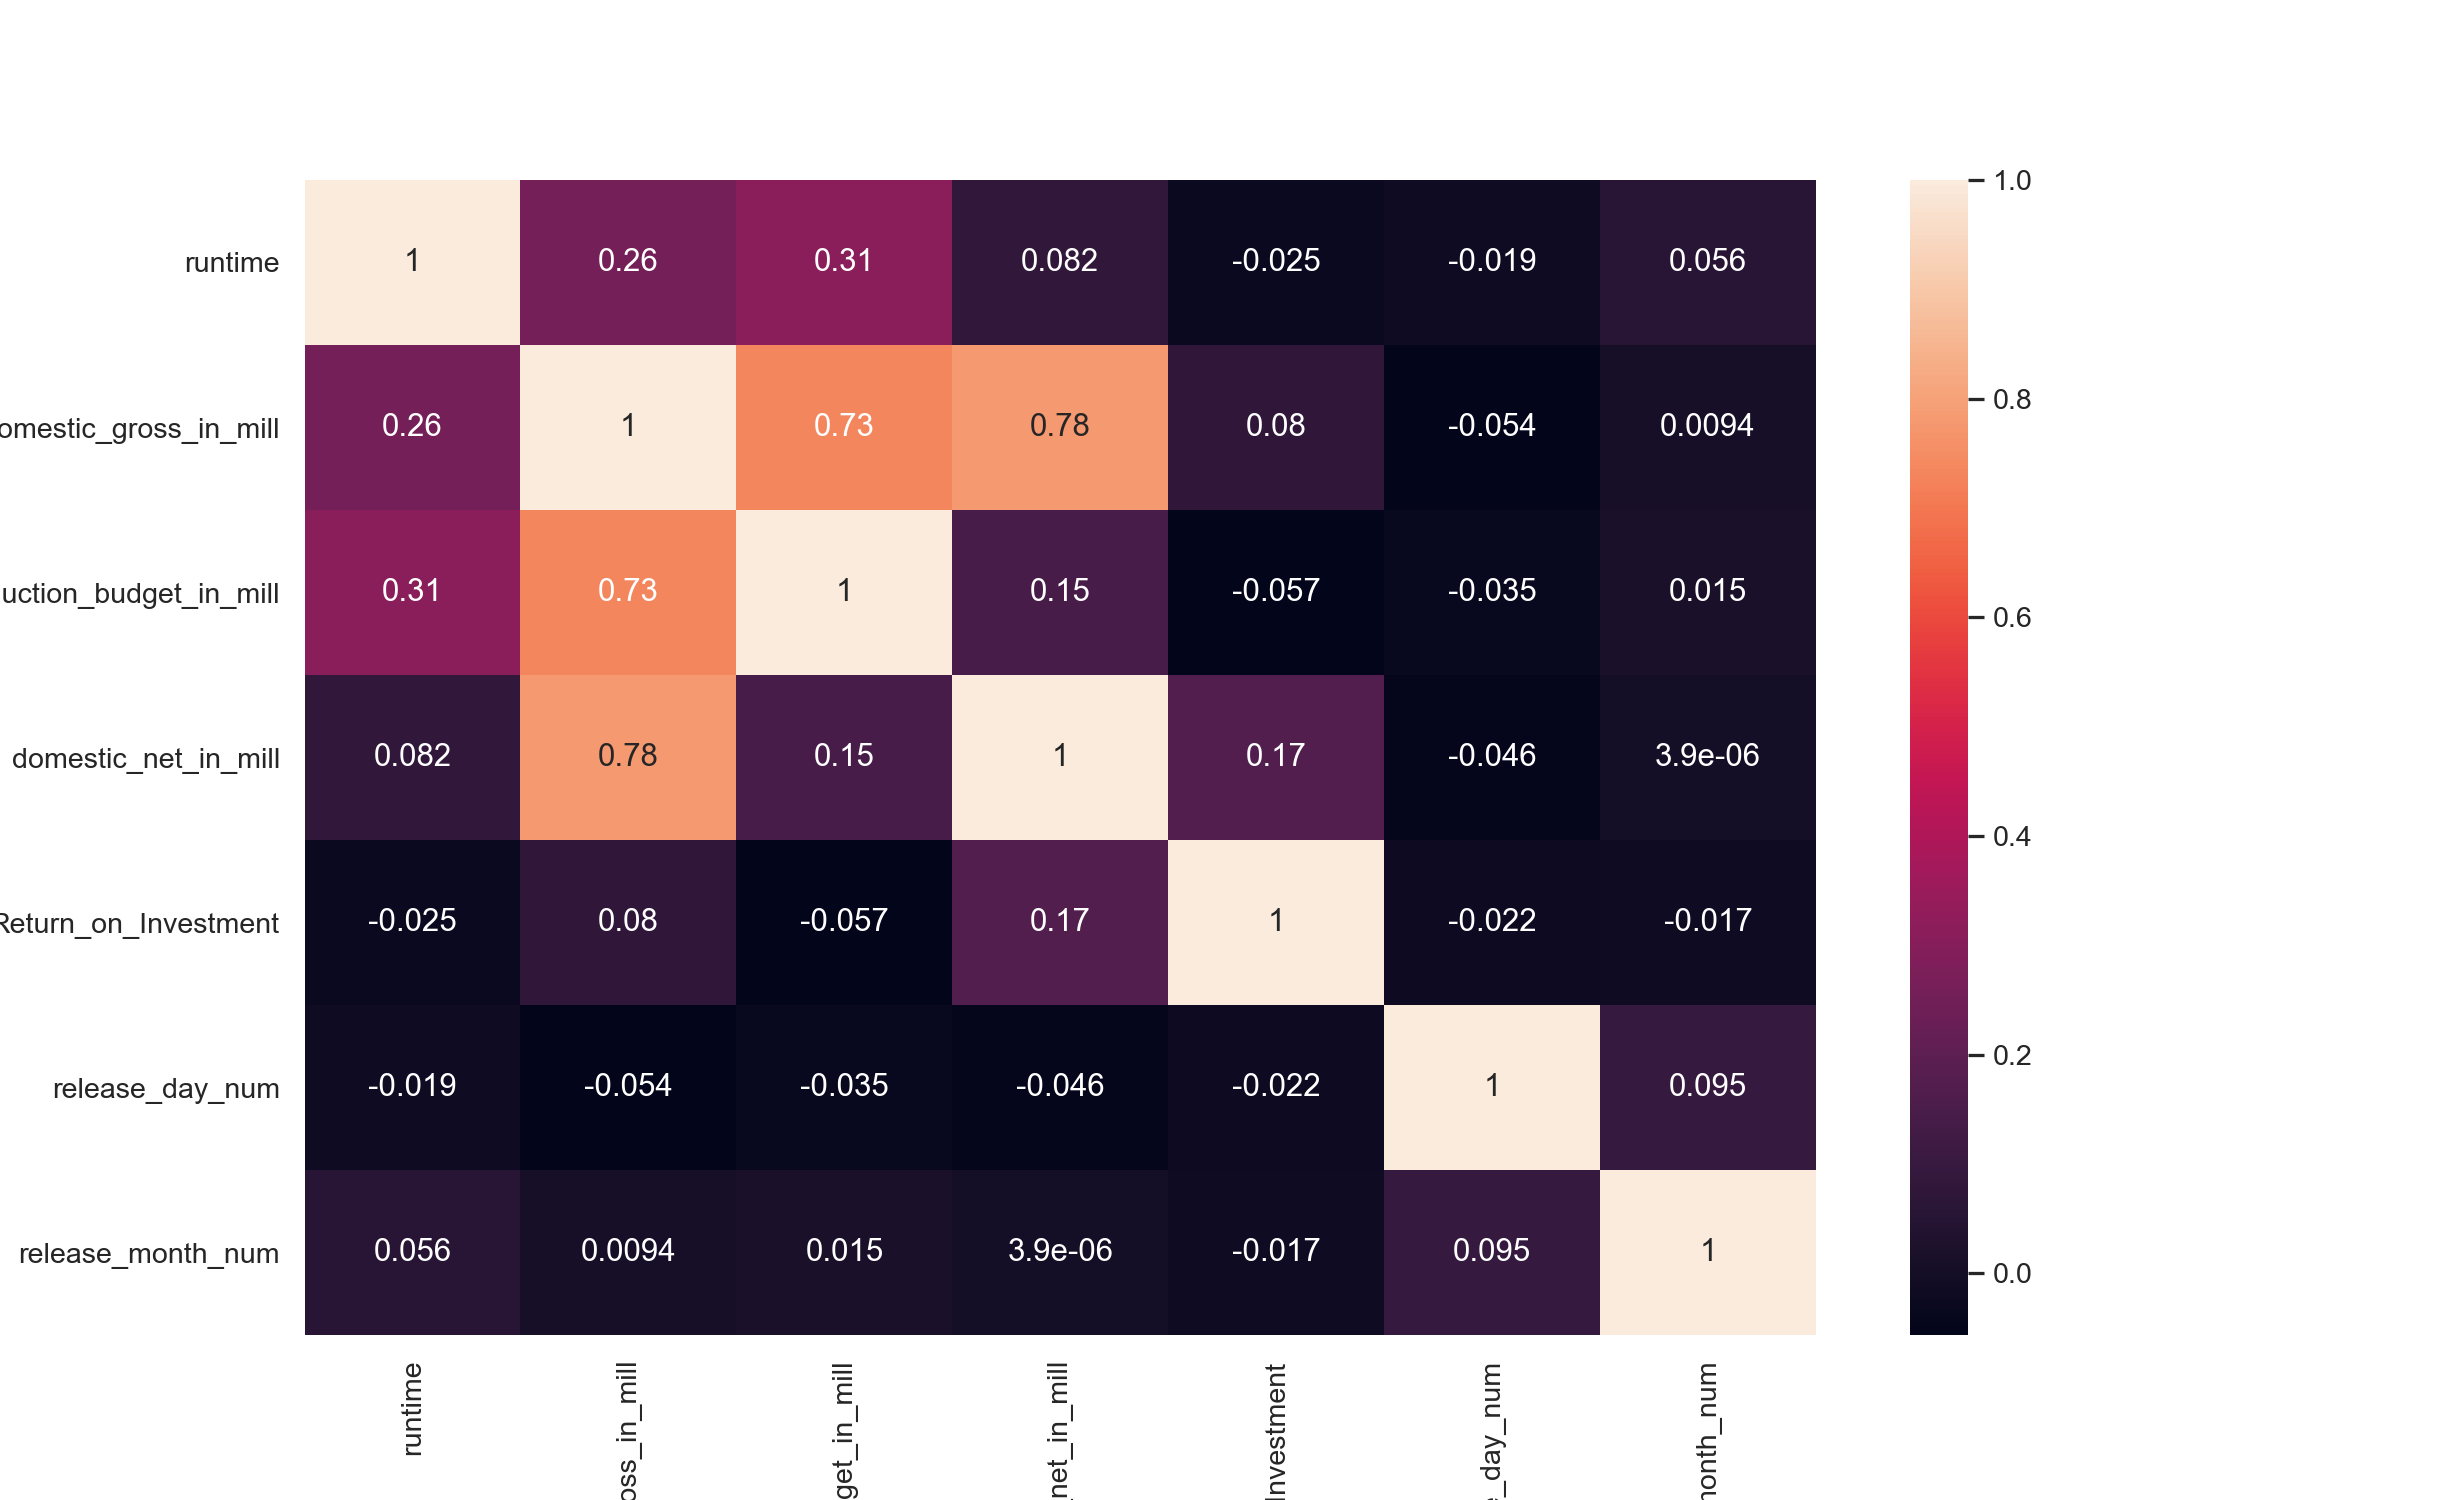

In [84]:
corrMatrix = runtime_df2.corr() 
plt.figure(figsize=(13, 8)) 
sns.heatmap(corrMatrix, annot=True)

## Conclusion

The highest grossing movies average around 123 minutes while the lowest grossing movies average around the 95 minute mark. The most popular movies in the top 100 movies have a runtime of 149 minutes. If we take into consideration the most popular movies like Titanic, Avatar, and all the Marvel movies, this is what we would expect. As per our numbers, people normally like longer movies. Also as we can see in the heatmap that the correlation coefficient of runtime to production budget is positively correlated and is 0.31 which is moderately strong.

Make movies averaging between 120-150 minutes and keep in mind that one of the factors that will contribute to production budget increase is the increase in movie runtime.

## Question 3: Can the film industry be a consistent profit center?

In [51]:
df = pd.read_csv('NewData/group_data (5).csv') #our cleaned dataframe
print(df.shape) #print shape of data frame
df.info()
df.head() #preview file

(4383, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 18 columns):
id                           4383 non-null int64
release_date                 4383 non-null object
movie                        4383 non-null object
production_budget            4383 non-null int64
domestic_gross               4383 non-null int64
genres                       2102 non-null object
tconst                       2121 non-null object
runtime                      2000 non-null float64
popularity                   1843 non-null float64
year_released                4383 non-null int64
release_day                  4383 non-null object
release_month                4383 non-null object
domestic_gross_in_mill       4383 non-null float64
production_budget_in_mill    4383 non-null float64
domestic_net_in_mill         4383 non-null float64
Return_on_Investment         4383 non-null float64
release_day_num              4383 non-null int64
release_month_num            43

id release_date                                 movie  production_budget  \
0   1   2009-12-18                                Avatar          425000000   
1   3   2019-06-07                          Dark Phoenix          350000000   
2   4   2015-05-01               Avengers: Age of Ultron          330600000   
3   5   2017-12-15     Star Wars Ep. VIII: The Last Jedi          317000000   
4   6   2015-12-18  Star Wars Ep. VII: The Force Awakens          306000000   

   domestic_gross                   genres     tconst  runtime  popularity  \
0       760507625                   Horror  tt1775309     93.0      26.526   
1        42762350  Action,Adventure,Sci-Fi  tt6565702    113.0         NaN   
2       459005868  Action,Adventure,Sci-Fi  tt2395427    141.0      44.383   
3       620181382                      NaN        NaN      NaN         NaN   
4       936662225                      NaN        NaN      NaN         NaN   

   year_released release_day release_month  domestic_gross_in_mill  \
0           2009      Friday      December              760.507625   
1           2019      Friday          June               42.762350   
2           2015      Friday           May              459.005868   
3           2017      Friday      December              620.181382   
4           2015      Friday      December              936.662225   

   production_budget_in_mill  domestic_net_in_mill  Return_on_Investment  \
0                      425.0            335.507625             78.942971   
1                      350.0           -307.237650            -87.782186   
2                      330.6            128.405868             38.840250   
3                      317.0            303.181382             95.640815   
4                      306.0            630.662225            206.098766   

   release_day_num  release_month_num  
0               18                 12  
1                7                  6  
2                1                  5  
3               15                 12  
4               18                 12

Reading in the cleaned data summary
The cleaned CSV has been imported to begin analysis with. The data has 4383 records and 16 columns. All data types seem to match up with the dataframe except for release date column which should be in datetime.

For steps on how data was cleaned please see the "Data Cleaning Steps Notebook".

#### Investigating the data

In [52]:
df['release_date'] =  pd.to_datetime(df['release_date'], infer_datetime_format=True) #convert to datetime data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 18 columns):
id                           4383 non-null int64
release_date                 4383 non-null datetime64[ns]
movie                        4383 non-null object
production_budget            4383 non-null int64
domestic_gross               4383 non-null int64
genres                       2102 non-null object
tconst                       2121 non-null object
runtime                      2000 non-null float64
popularity                   1843 non-null float64
year_released                4383 non-null int64
release_day                  4383 non-null object
release_month                4383 non-null object
domestic_gross_in_mill       4383 non-null float64
production_budget_in_mill    4383 non-null float64
domestic_net_in_mill         4383 non-null float64
Return_on_Investment         4383 non-null float64
release_day_num              4383 non-null int64
release_month_num            4383 

We have now fixed the data type for the release_date column and everything looks good

#### Data Frame Manipulation

Here we begin to add rows that will be valuable information to analyze later on. The production_budget and domestic_gross numbers are quite large so it may be easier to digest these numbers in terms of millions of dollars. We also create a column with the year released so that we may begin to do some time series analysis later on.

I have also added some columns that produce profitability metrics such as profit_in_millions and return_on_investment. These are important because we want to advise our client to make smart decisions with their money. No one is in the business of losing money.

#### Filtering Data

New technology is coming out everyday. With the creation of netflix in 1997 and the increased internet speed and bandwith the way we consume film media has changed dramatically. While historical data is very important, for this business case we have decided to only go back to the year 2000. We have also decided to remove any films that were not released as of January 1, 2020 as it may not have complete data, or the film might not have been released yet.

### What are the profitability trends in the movie industry?

Here we will evaluate questions such as:
1. Are movies making more or less profit since 2000?
2. Are movies getting more expensive to make since 2000?
3. Does spending more money on production increase your chances of being profitable?

The intent of these questions are to provide an insight if the movie industry is thriving or failing. We want our clients to make the smartest decisions. We are looking to see if "an ounce of prevention equals a pound of cure". If we can inform our clients that entering the movie business will not only be a waste of time, but also a waste of resources not beginning down that path is the smartest choice to make.

#### Profitability Trends Question 1

Q: Are movies making more or less profit since 2000?

In [54]:
annual_totals_df = df.groupby(['year_released'])['movie'].count() #indexing by tear and adding a column with movie count

annual_totals_df = annual_totals_df.to_frame() #pandas series to dataframe to build off of

annual_totals_df.rename(columns={"movie": "movie_count"},inplace=True)

annual_totals_df['ticket_sales_in_mill'] = df.groupby(df['year_released'])['domestic_gross_in_mill'].sum().apply(lambda x: round(x,3))

annual_totals_df['production_budget_in_mill'] = df.groupby(df['year_released'])['production_budget_in_mill'].sum().apply(lambda x: round(x,3))

annual_totals_df['profit_in_mill'] = annual_totals_df['ticket_sales_in_mill'] - annual_totals_df['production_budget_in_mill']

annual_totals_df['return_on_investment_%'] = ((annual_totals_df['profit_in_mill'] / annual_totals_df['production_budget_in_mill']).apply(lambda x: x*100))

In [55]:
display(annual_totals_df)
annual_totals_df.agg(['mean','median','std'])

movie_count  ticket_sales_in_mill  production_budget_in_mill  \
year_released                                                                 
2000                   189              7413.773                   5890.738   
2001                   181              7909.169                   5888.770   
2002                   210              8785.468                   6555.038   
2003                   201              8405.310                   6486.168   
2004                   206              9090.879                   7268.302   
2005                   223              8347.394                   7443.094   
2006                   260              8679.953                   7492.669   
2007                   220              8272.330                   7319.501   
2008                   264              9352.193                   8377.547   
2009                   239             10474.763                   8511.345   
2010                   274             10019.169                   9141.606   
2011                   253              9554.392                   8542.352   
2012                   235             10525.775                   8487.135   
2013                   238             10668.033                   8899.387   
2014                   255             10062.193                   7753.407   
2015                   338             10795.544                   8842.179   
2016                   219             11042.828                   8973.240   
2017                   168             10453.395                   8405.163   
2018                   143             10551.784                   6883.857   
2019                    67              2867.619                   3533.510   

               profit_in_mill  return_on_investment_%  
year_released                                          
2000                 1523.035               25.854740  
2001                 2020.399               34.309355  
2002                 2230.430               34.026195  
2003                 1919.142               29.588225  
2004                 1822.577               25.075692  
2005                  904.300               12.149517  
2006                 1187.284               15.845942  
2007                  952.829               13.017677  
2008                  974.646               11.634026  
2009                 1963.418               23.068246  
2010                  877.563                9.599659  
2011                 1012.040               11.847323  
2012                 2038.640               24.020356  
2013                 1768.646               19.873796  
2014                 2308.786               29.777696  
2015                 1953.365               22.091444  
2016                 2069.588               23.063999  
2017                 2048.232               24.368736  
2018                 3667.927               53.283021  
2019                 -665.891              -18.845029

movie_count  ticket_sales_in_mill  production_budget_in_mill  \
mean     219.150000           9163.598200                7534.750400   
median   221.500000           9453.292500                7623.038000   
std       55.619265           1835.952634                1388.810256   

        profit_in_mill  return_on_investment_%  
mean       1628.847800               21.182531  
median     1870.859500               23.066123  
std         854.057336               13.895288

Here we can see that the overall mean and median data and then compare that to the per movie basis. 

### Annual Totals Table Data

In this table we can see the amount of movies produced in that year along with the statistics on the movies from that year. Let's look at the total data in the aggregated table below. Over this 20 year the median and mean movie counts are almost spot on at 221.5 and 219.5. The standard deviation of 55 shows that there is quite a lot of variability and it is shown from 2016 to 2019 where the total number of movies drop off significantly. Interestingly enough the mean and median return on investment % are at 21.18% and 23.07%. This aligns very well with what a lot of other businesses operate at. Personally, in my experience if numbers are running at 15% The std deviation is + or minus almost 14% on the returns though which is very, very scary.

Our next step would to be to normalize this table data to the number of movies made that year.

#### Now that we have the aggregate over the years lets normalize it on a per movie basis

This will give us insight on if movies are generating more money. 

In [56]:
annual_per_movie_df = annual_totals_df

annual_per_movie_df['ticket_sales_per_movie_mill'] = annual_totals_df['ticket_sales_in_mill'] / annual_totals_df['movie_count']

annual_per_movie_df['profit_per_movie'] = annual_totals_df['profit_in_mill'] / annual_totals_df['movie_count']

annual_per_movie_df['production_budget_per_movie'] = annual_totals_df['production_budget_in_mill'] / annual_totals_df['movie_count']

annual_per_movie_df['roi_per_movie'] = annual_totals_df['return_on_investment_%'] / annual_totals_df['movie_count']

annual_per_movie_df = annual_per_movie_df.reset_index()

In [57]:
annual_per_movie_df

year_released  movie_count  ticket_sales_in_mill  \
0            2000          189              7413.773   
1            2001          181              7909.169   
2            2002          210              8785.468   
3            2003          201              8405.310   
4            2004          206              9090.879   
5            2005          223              8347.394   
6            2006          260              8679.953   
7            2007          220              8272.330   
8            2008          264              9352.193   
9            2009          239             10474.763   
10           2010          274             10019.169   
11           2011          253              9554.392   
12           2012          235             10525.775   
13           2013          238             10668.033   
14           2014          255             10062.193   
15           2015          338             10795.544   
16           2016          219             11042.828   
17           2017          168             10453.395   
18           2018          143             10551.784   
19           2019           67              2867.619   

    production_budget_in_mill  profit_in_mill  return_on_investment_%  \
0                    5890.738        1523.035               25.854740   
1                    5888.770        2020.399               34.309355   
2                    6555.038        2230.430               34.026195   
3                    6486.168        1919.142               29.588225   
4                    7268.302        1822.577               25.075692   
5                    7443.094         904.300               12.149517   
6                    7492.669        1187.284               15.845942   
7                    7319.501         952.829               13.017677   
8                    8377.547         974.646               11.634026   
9                    8511.345        1963.418               23.068246   
10                   9141.606         877.563                9.599659   
11                   8542.352        1012.040               11.847323   
12                   8487.135        2038.640               24.020356   
13                   8899.387        1768.646               19.873796   
14                   7753.407        2308.786               29.777696   
15                   8842.179        1953.365               22.091444   
16                   8973.240        2069.588               23.063999   
17                   8405.163        2048.232               24.368736   
18                   6883.857        3667.927               53.283021   
19                   3533.510        -665.891              -18.845029   

    ticket_sales_per_movie_mill  profit_per_movie  \
0                     39.226312          8.058386   
1                     43.697066         11.162425   
2                     41.835562         10.621095   
3                     41.817463          9.547970   
4                     44.130481          8.847461   
5                     37.432260          4.055157   
6                     33.384435          4.566477   
7                     37.601500          4.331041   
8                     35.424973          3.691841   
9                     43.827460          8.215138   
10                    36.566310          3.202785   
11                    37.764395          4.000158   
12                    44.790532          8.675064   
13                    44.823668          7.431286   
14                    39.459580          9.054063   
15                    31.939479          5.779186   
16                    50.423872          9.450174   
17                    62.222589         12.191857   
18                    73.788699         25.649839   
19                    42.800284         -9.938672   

    production_budget_per_movie  roi_per_movie  
0                     31.167926       0.136798  
1                     32.534641       0.189554  
2                     31.214467 

Here we can see that the overall per movie mean and median data. 

### ***Figure 1.0 Number of Movies in a Year*** 

<IPython.core.display.Javascript object>


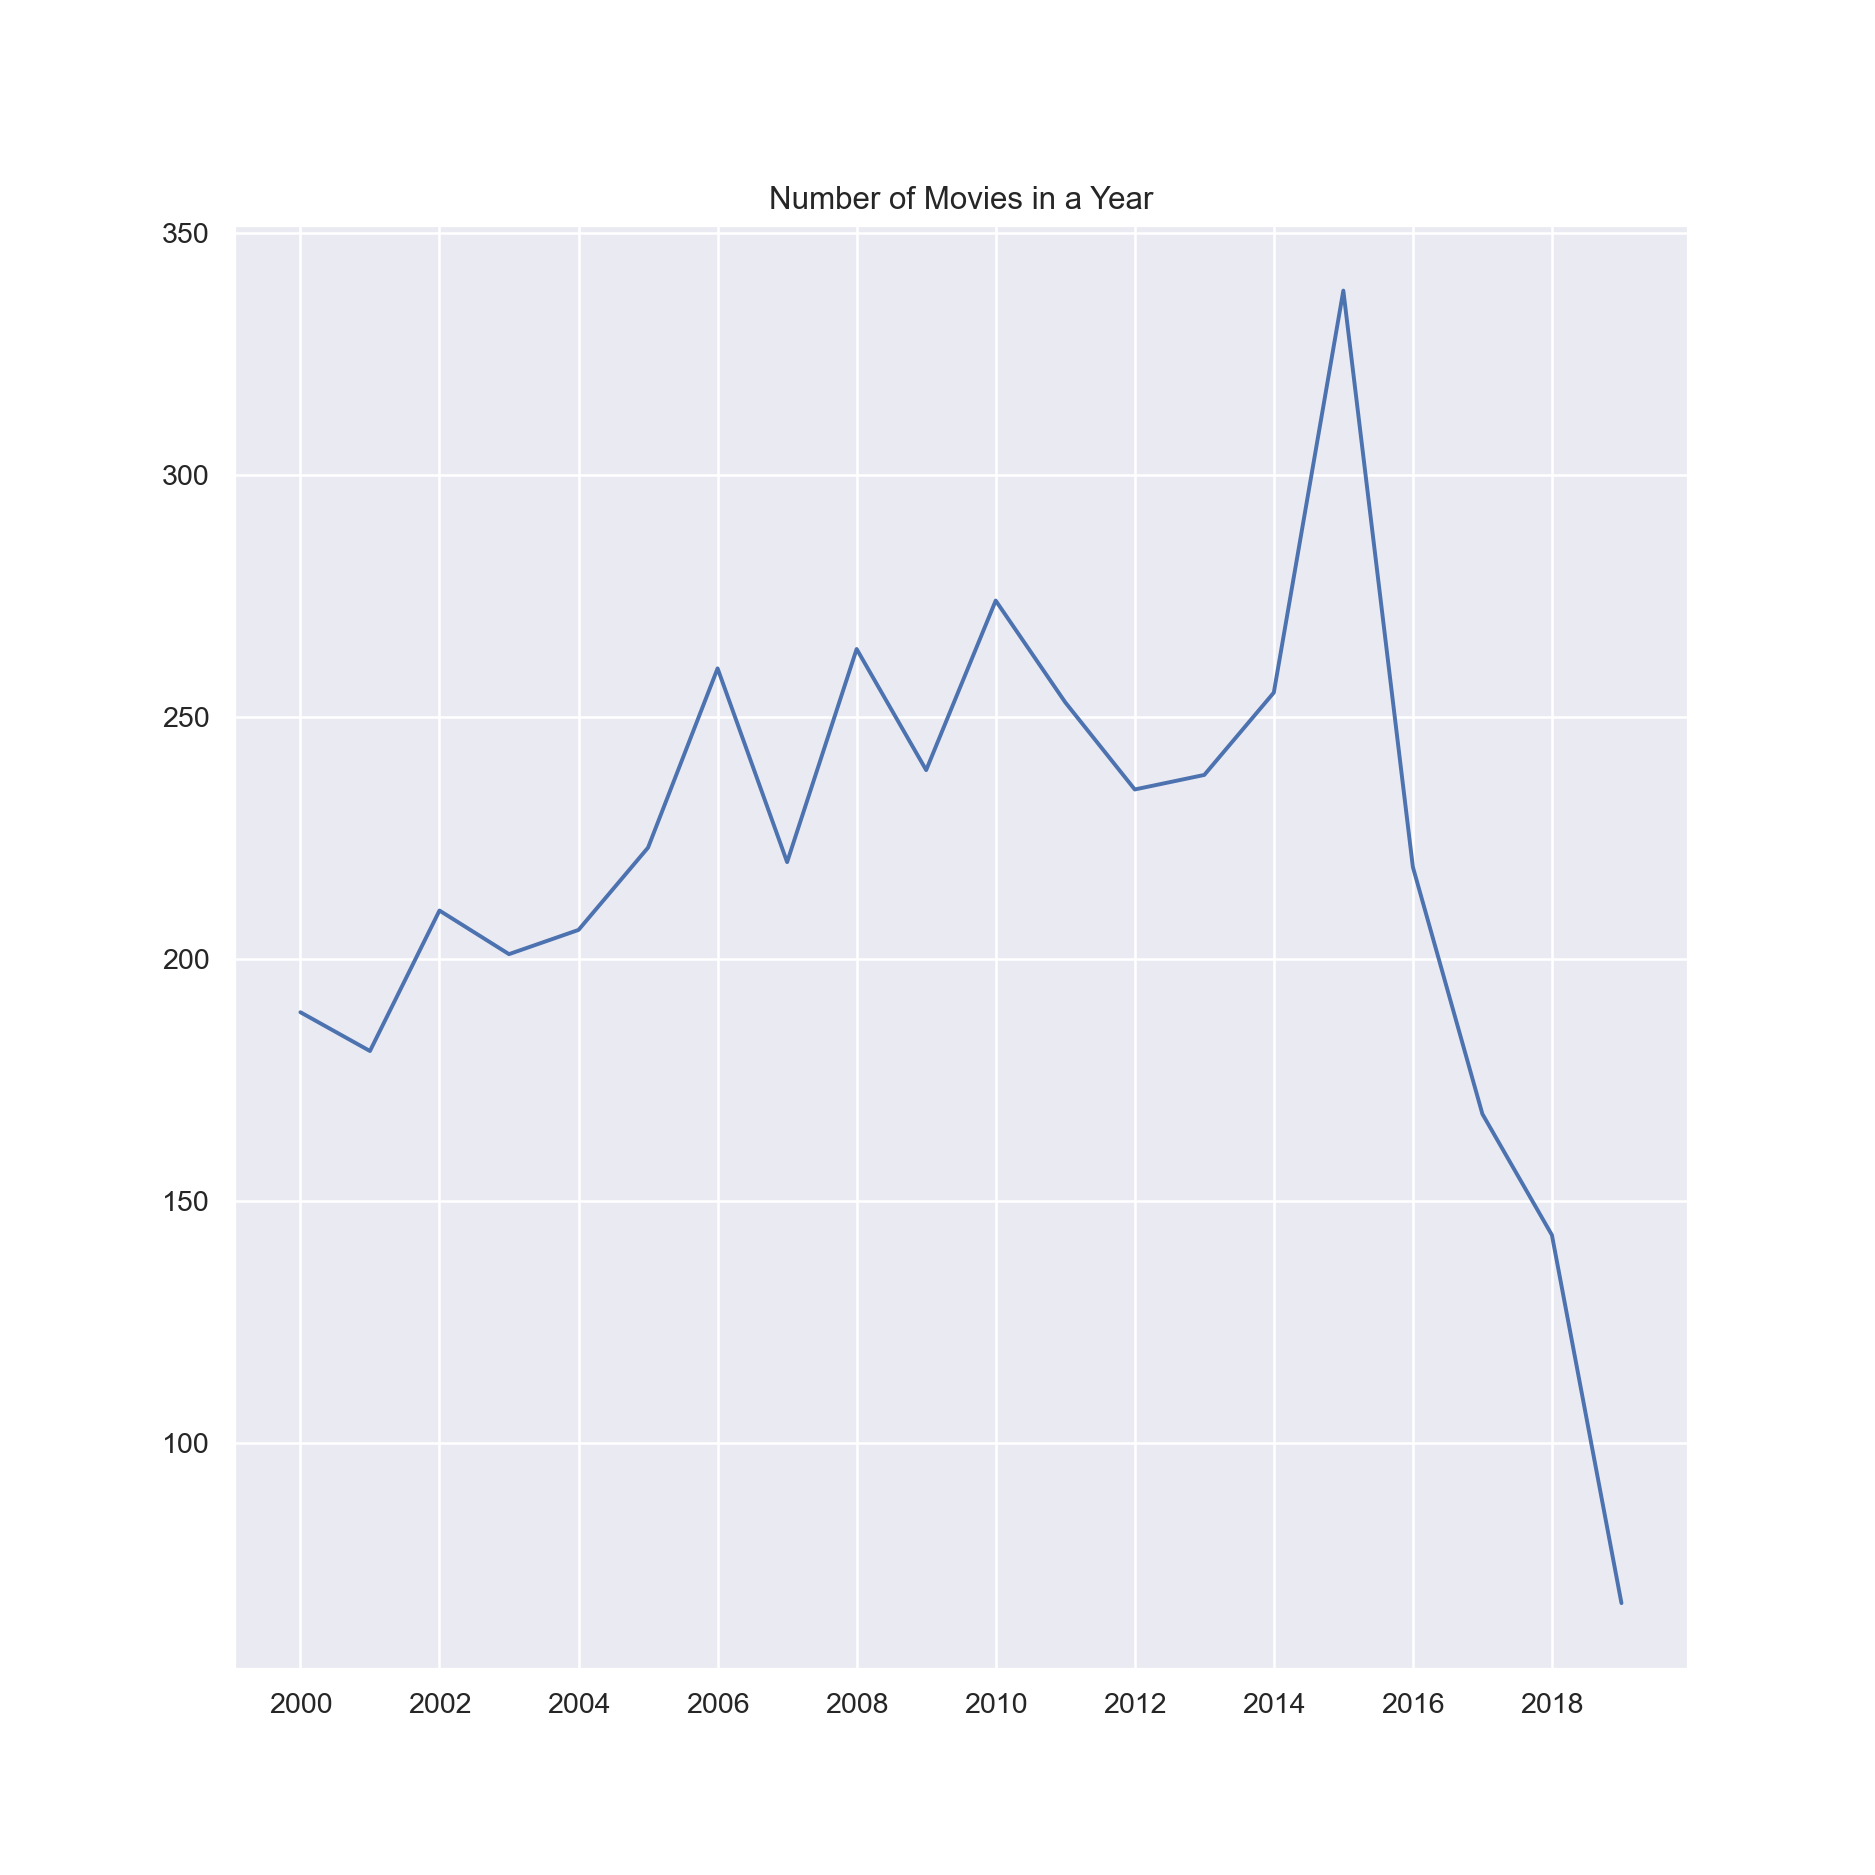

In [58]:
plt.figure(figsize=(10,10))
fig_1_0 = sns.lineplot(data=annual_totals_df['movie_count'])
plt.title('Number of Movies in a Year')
fig_1_0.set_xticks(ticks=annual_per_movie_df['year_released'][::2])

In [59]:
annual_per_movie_df.drop(columns=['movie_count','ticket_sales_in_mill','production_budget_in_mill','profit_in_mill','return_on_investment_%'], inplace=True)
#this is to create a new clean df with all data normalized to the number of movies made in a year


### ***Figure 1.1 Per Movie Data***

<IPython.core.display.Javascript object>


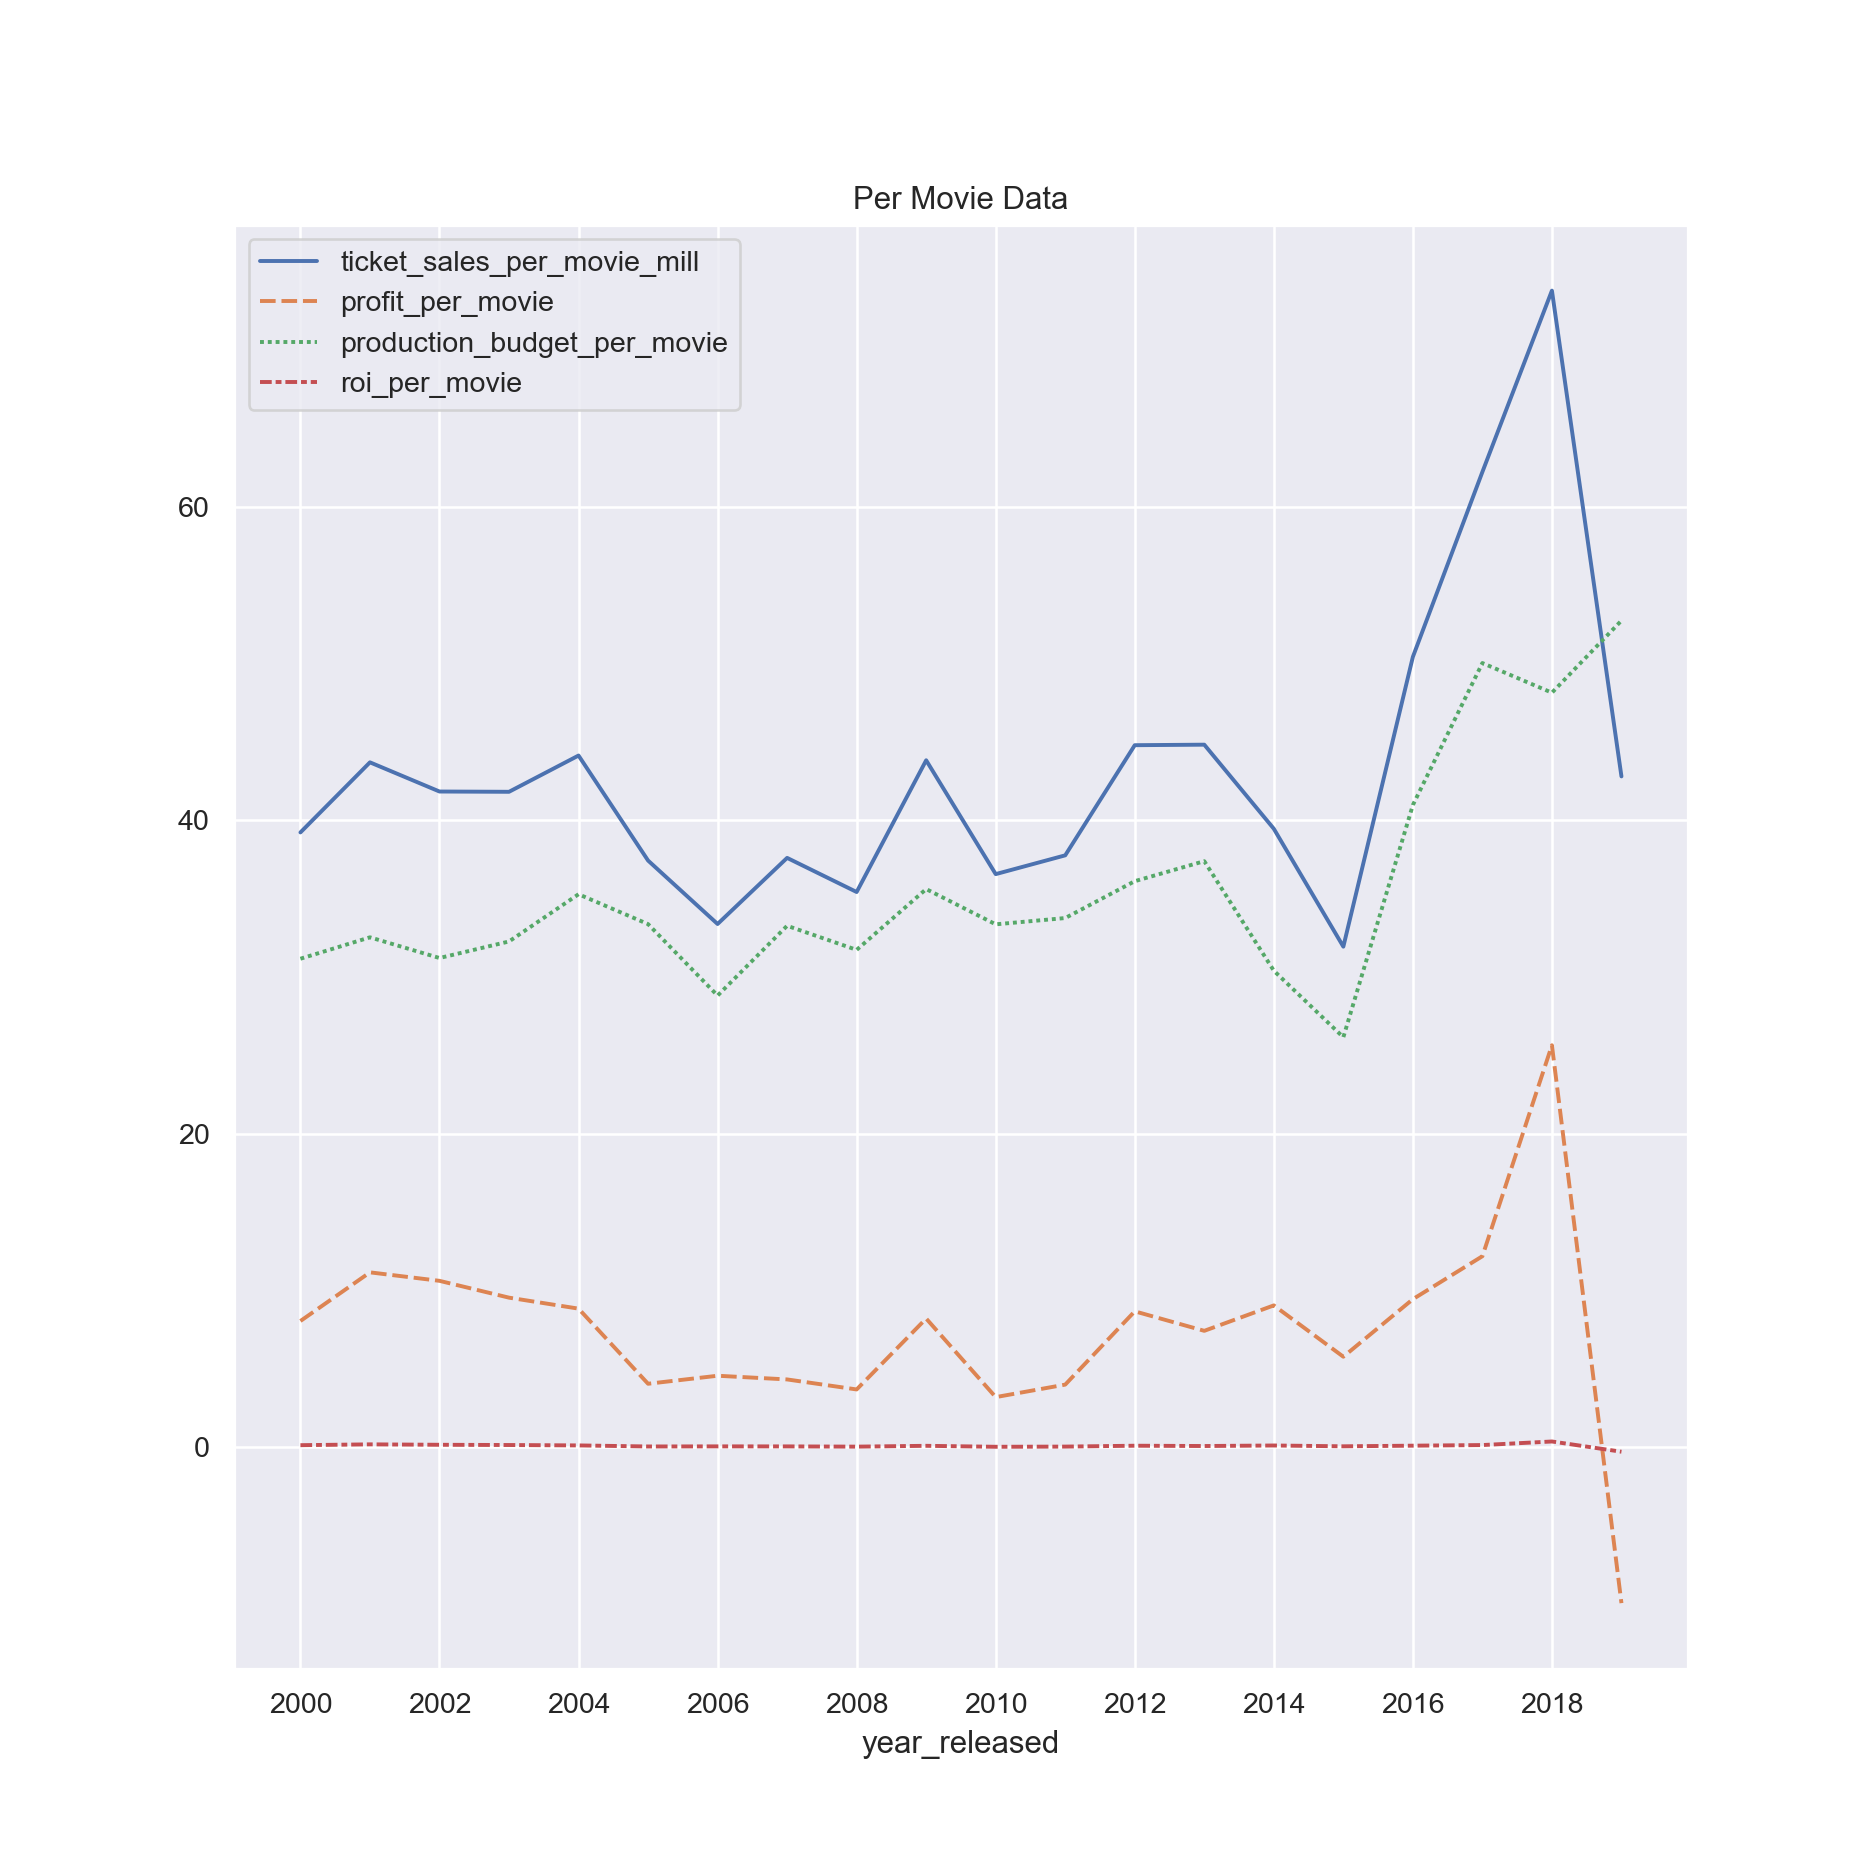

In [60]:
plt.figure(figsize=(10,10))
fig_1_1 = sns.lineplot(data=annual_per_movie_df.set_index(['year_released']))
plt.title('Per Movie Data')
fig_1_1.set_xticks(ticks=annual_per_movie_df['year_released'][::2])

### Analysis of Data Aggregated by year

Figure 1.0 illustrates the number of movies that hit the movie theaters that year. As you can see the number of movies made increased rapidly from 2000-2015 and has since been in a steep downtrend. This can be for many reasons. The first could be imperfect data--perhaps this isnt all the movies that hit box office. The second--and more probable reason-- is that movies aren't hitting theaters anymore and going straight to in-demand services like Netflix. 

Figure 1.1 shows the normalized to number of movies data over the desired years. You can see in this figure how all of the variables interact with each other. The ticket sales for example shot up from 2015 to 2018 and then has fallen off steeply. While ticket sales have increased the profit per movie takes a very hard drop and actually goes negative around 2019. This is interesting because you can see the production budget spike during this time and ticket sales to fall-- which is the direct inverse of what you want to see happen. 

### ***Figure 2.0 Ticket Sales per movie over time***

<IPython.core.display.Javascript object>


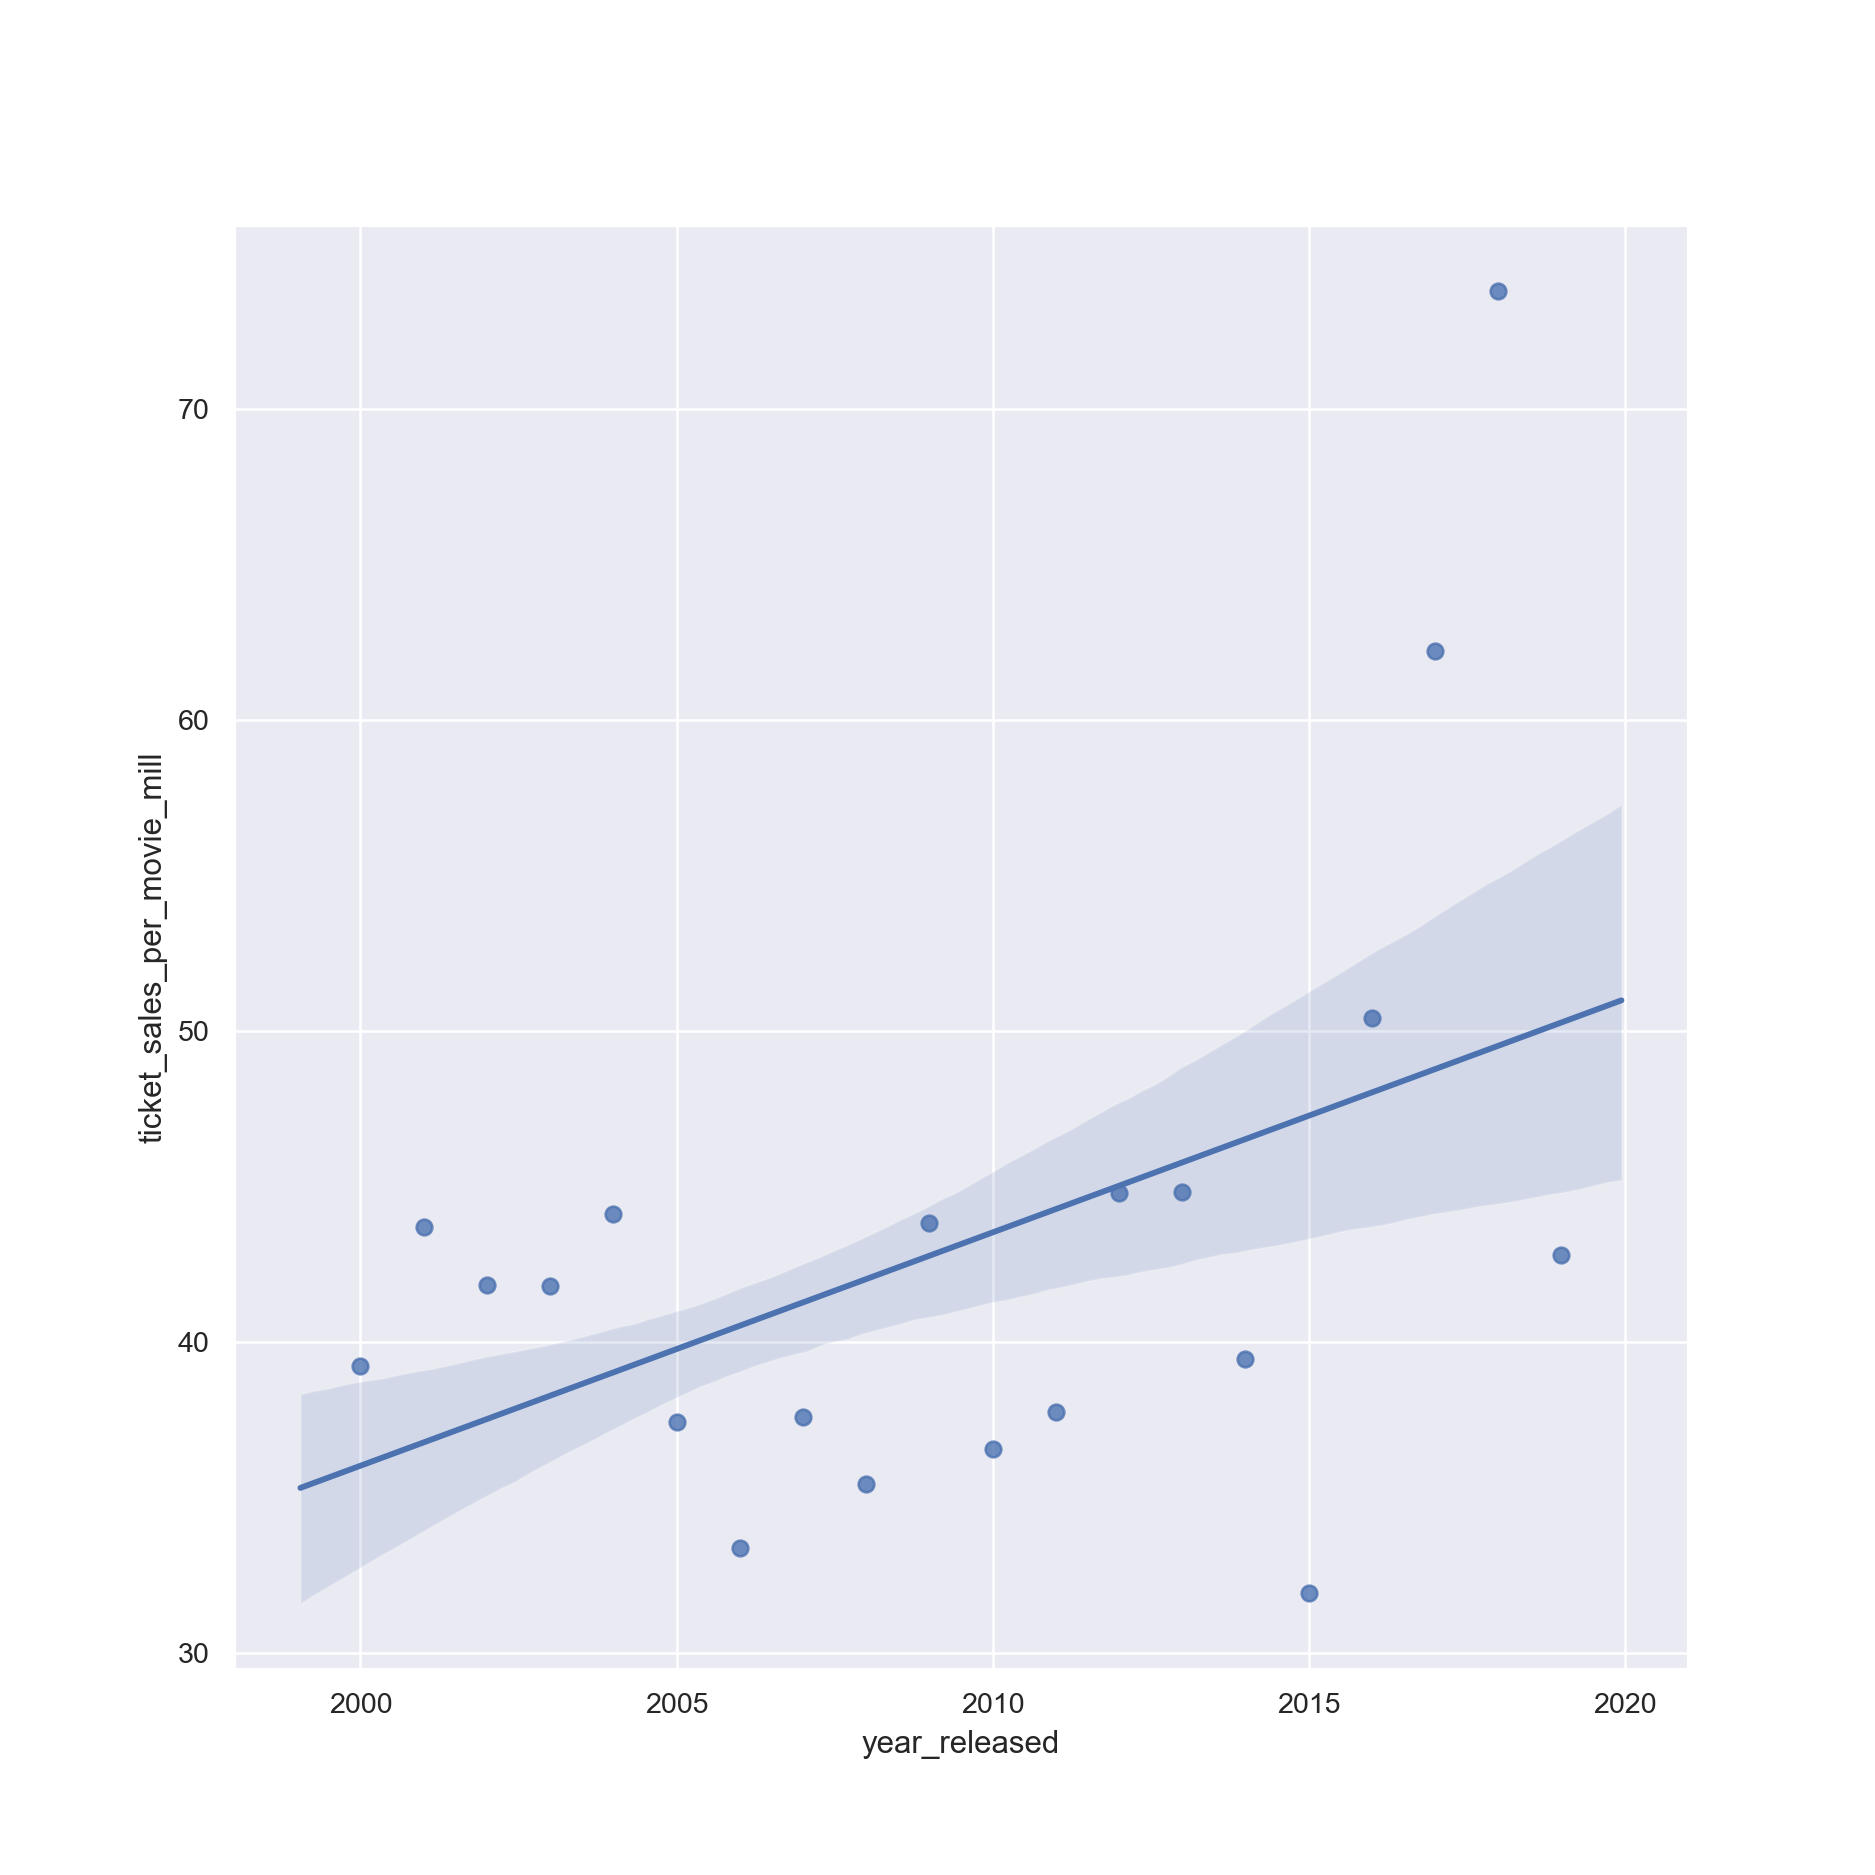

In [61]:
plt.figure(figsize=(10,10))
sns.regplot(x=annual_per_movie_df['year_released'],y=annual_per_movie_df['ticket_sales_per_movie_mill'],ci=67)

### ***Figure 2.1 Production Budget per movie over time***

<IPython.core.display.Javascript object>


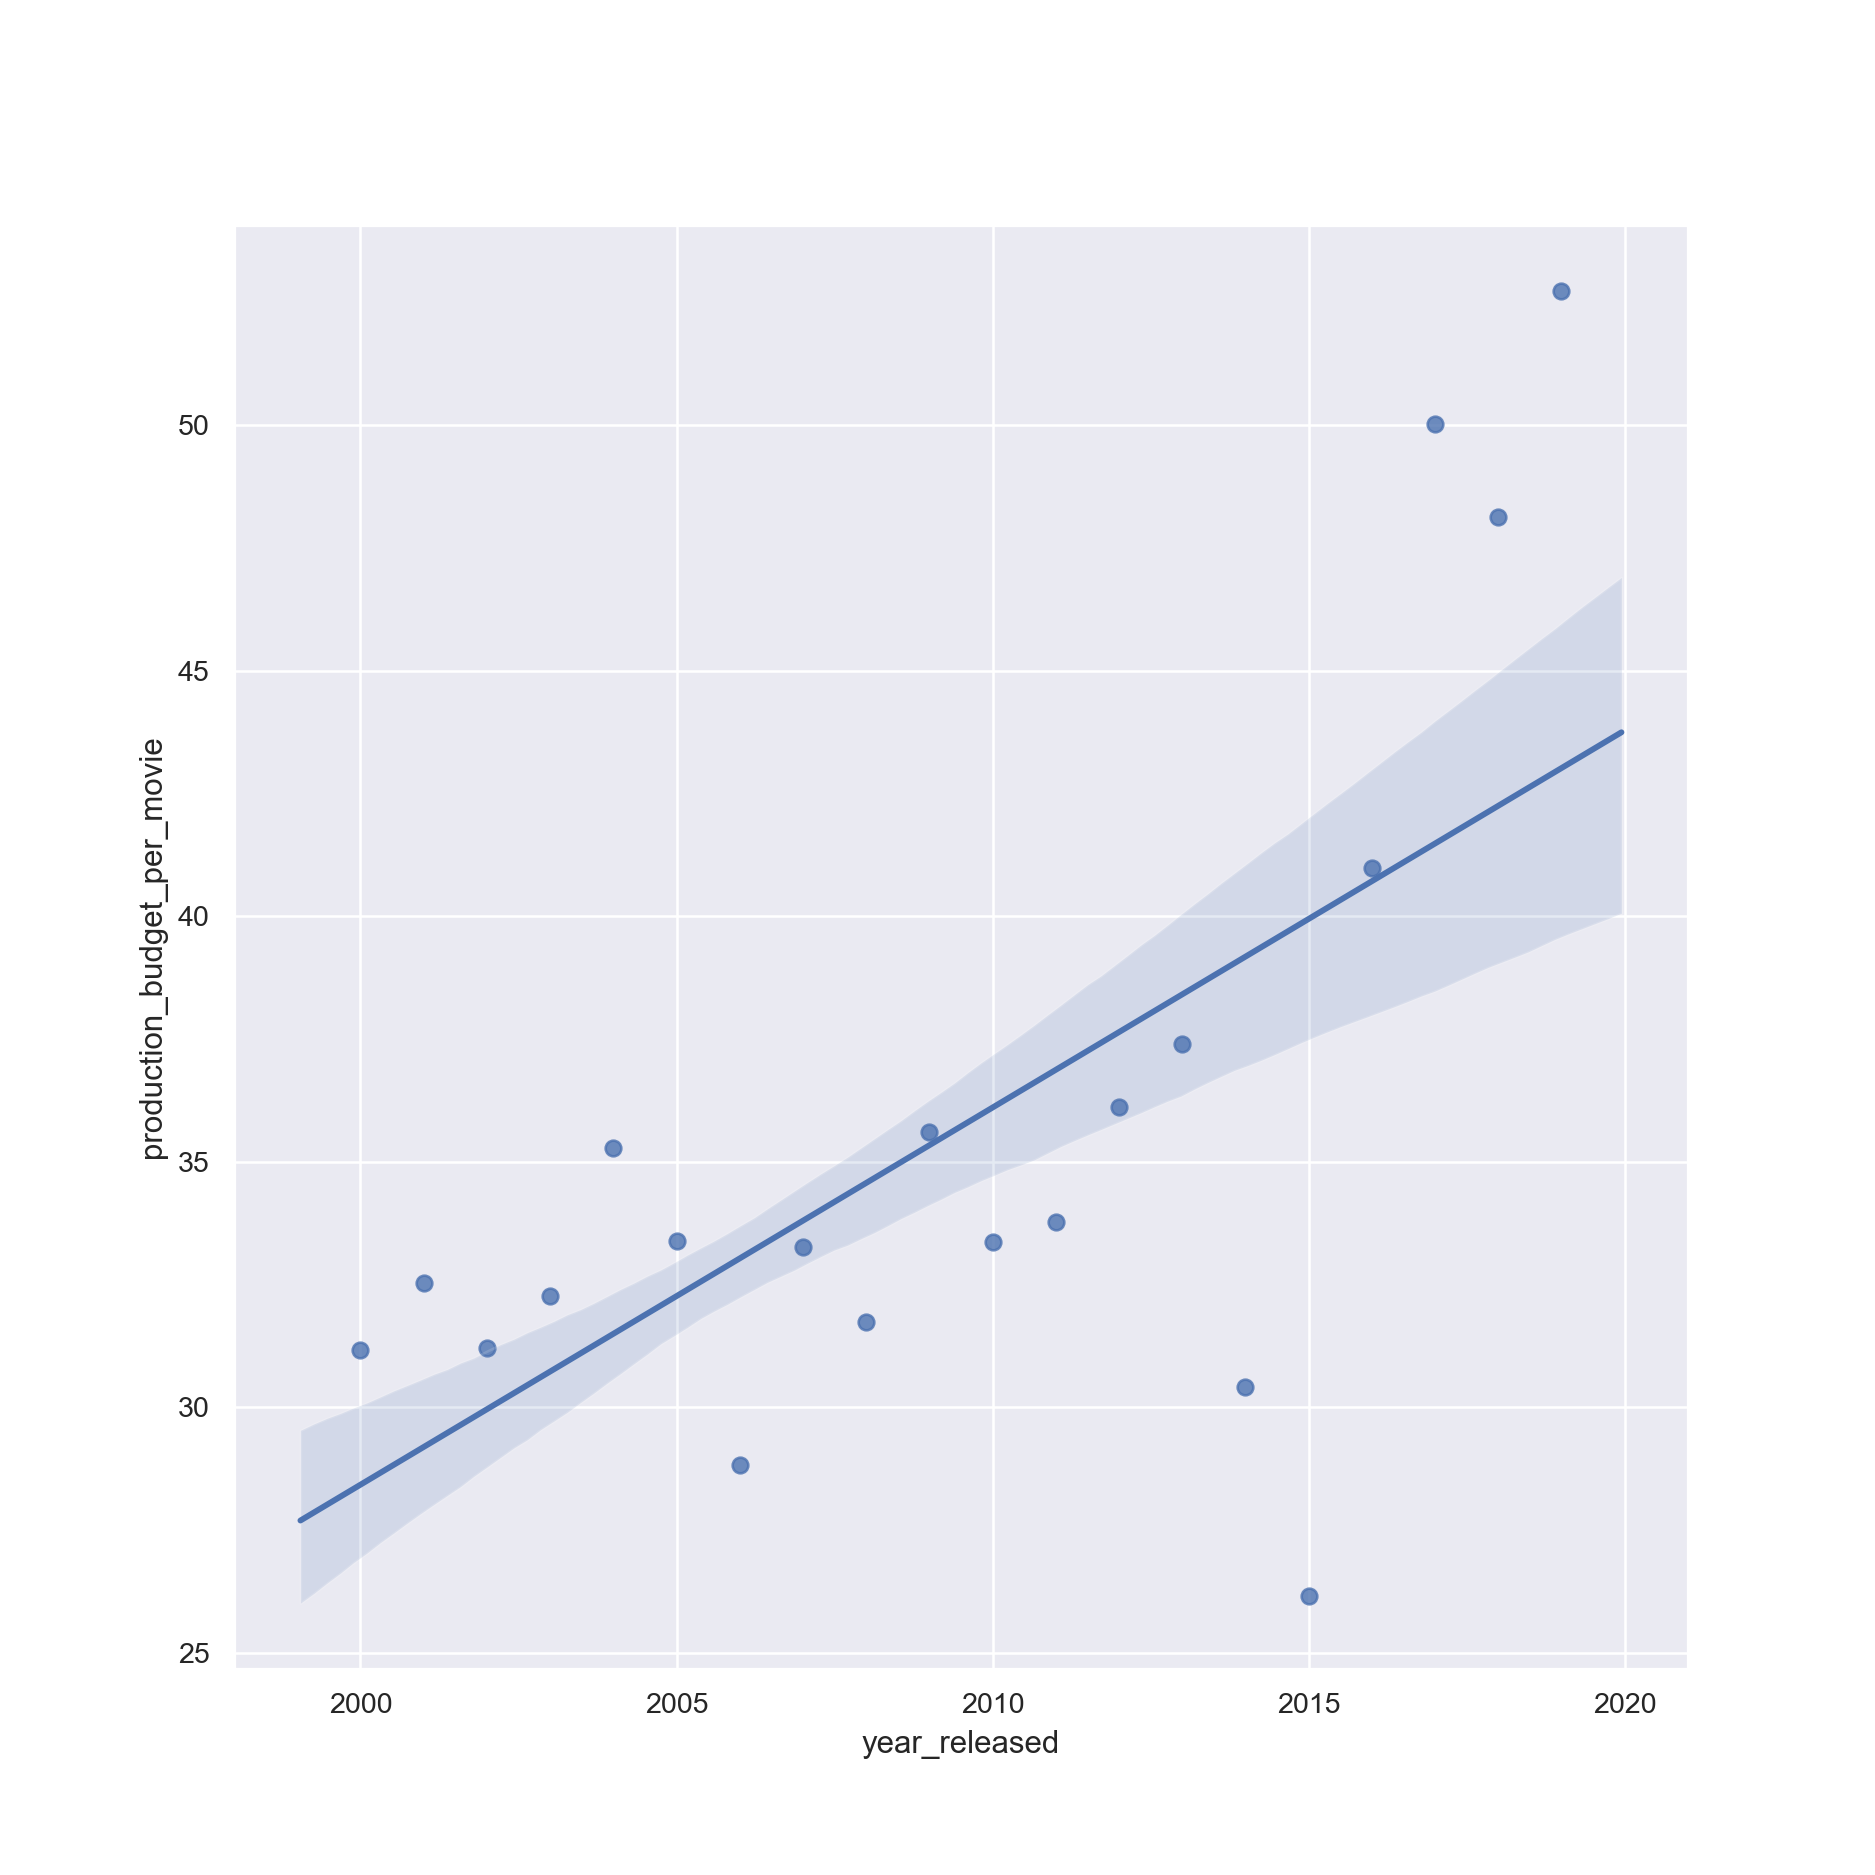

In [62]:
plt.figure(figsize=(10,10))
sns.regplot(x=annual_per_movie_df['year_released'],y=annual_per_movie_df['production_budget_per_movie'],ci=67)

### ***Figure 2.2 Profit per movie over time***

<IPython.core.display.Javascript object>


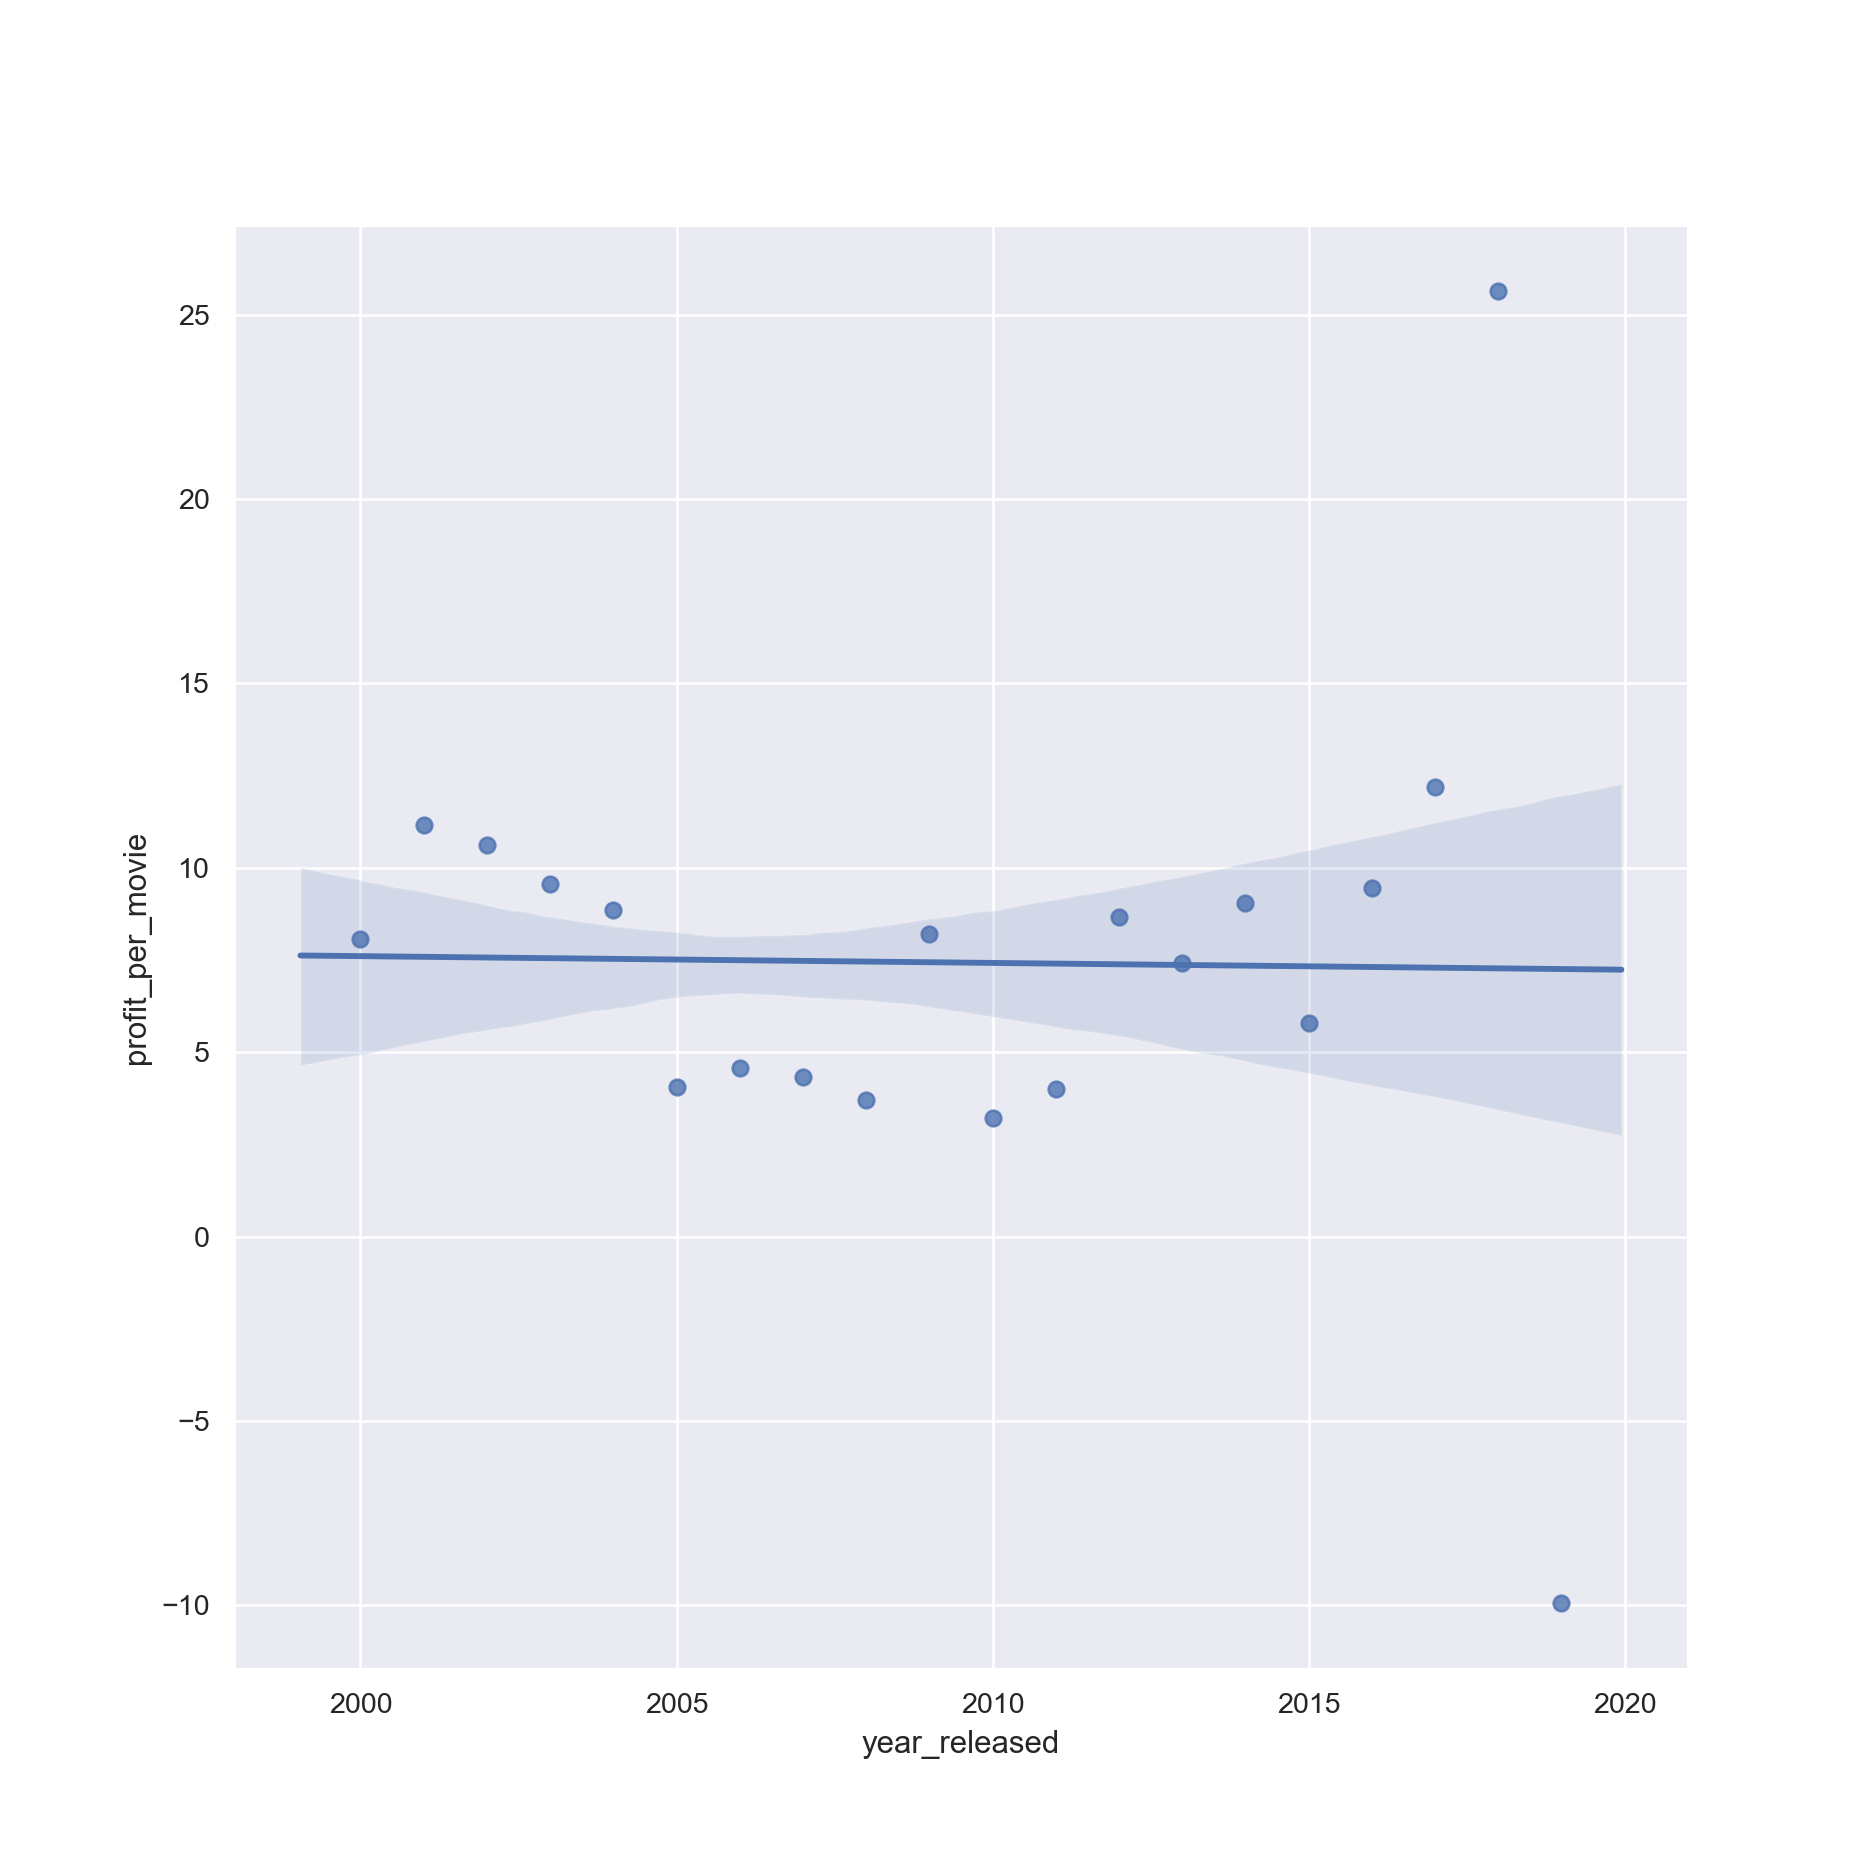

In [63]:
plt.figure(figsize=(10,10))
sns.regplot(x=annual_per_movie_df['year_released'],y=annual_per_movie_df['profit_per_movie'],ci=67)

### ***Figure 2.3 ROI per movie over time***

<IPython.core.display.Javascript object>


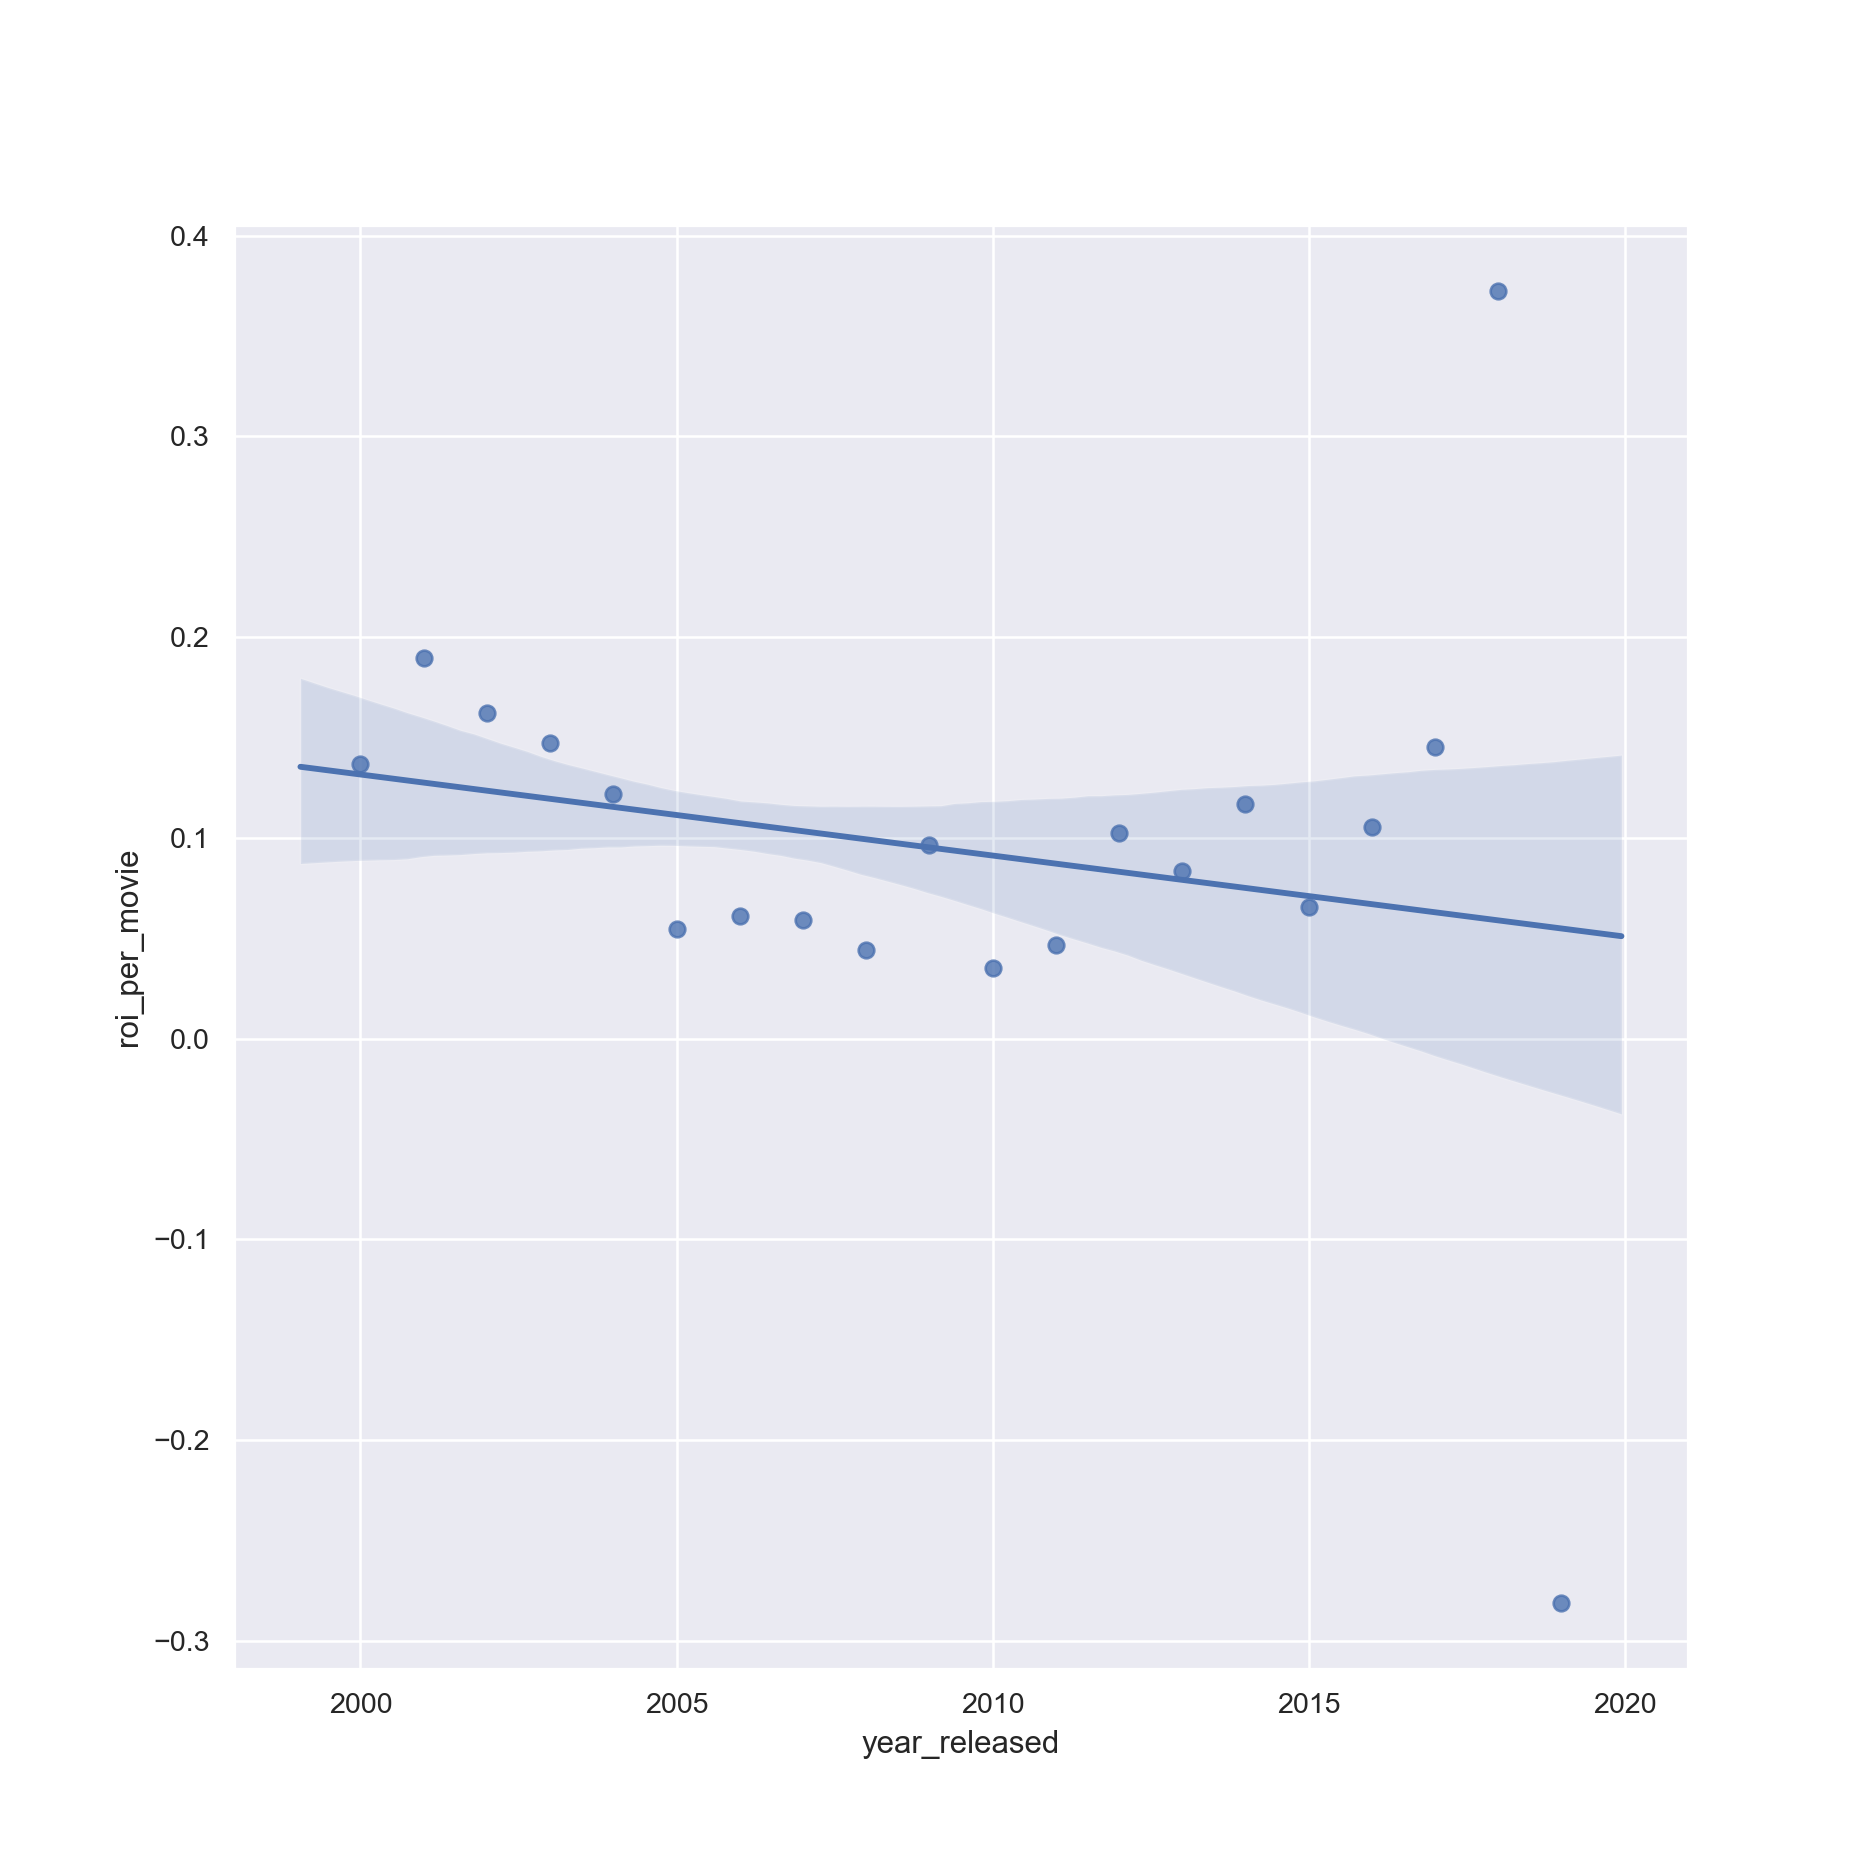

In [64]:
plt.figure(figsize=(10,10))
sns.regplot(x=annual_per_movie_df['year_released'],y=annual_per_movie_df['roi_per_movie'],ci=67)

### Analysis of Figures 2.X Regression Plots

Figure 2.0 - Ticket Sales per movie over time
Figure 2.1 - Production Budget per movie over time
Figure 2.2 - Profit per movie over time
Figure 2.3 - ROI per movie over time

All figures 2.X are linear regression plots. This means that a line of best fit is displayed showing a relationship of the data points in the Y variable as compared to the X variable. Here the Y variables vary while the X variable is always the time period we are evaluating. A positive slope in the plotted line means that the Y variable is trending upwards over the years and a negative slot in the plotted line means that the Y variable is decreasing over the years.

Figure 2.0 shows a positive sloped line from 2000 to 2019 which means that over this time period ticket sales have been increasing. This is good if you are in the movie industry as you want to see an appetite for the product and steady growth.

Figure 2.1 shows the production budget over time and another positively sloped line. While not on the same exact scale, it appears that the production budget line of best fit has a much steeper slope that the line in figure 2.0. This means production budgets are increasing faster than the growth in ticket sales-- not a good sign. This can also be seen in Figure 1.1 where the green line (production budget) actually suprasses the blue line (ticket sales).

Figure 2.2 shows the profit per movie over time. This line of best fit is essentially flat. This means that over time the movie industry as a whole is not making any more money per movie today than it was 20 years ago. If there is one conclusion that can be drawn from this is predictability is often a good thing as it means you will have accurate information to make informed business decisions.

Figure 2.3 shows a decline in ROI per movie over time. This is not good. This means that it is getting harder every year to risk investing money in making the movies.

### ***Figure 3.0 Correlation Matrix***

<IPython.core.display.Javascript object>


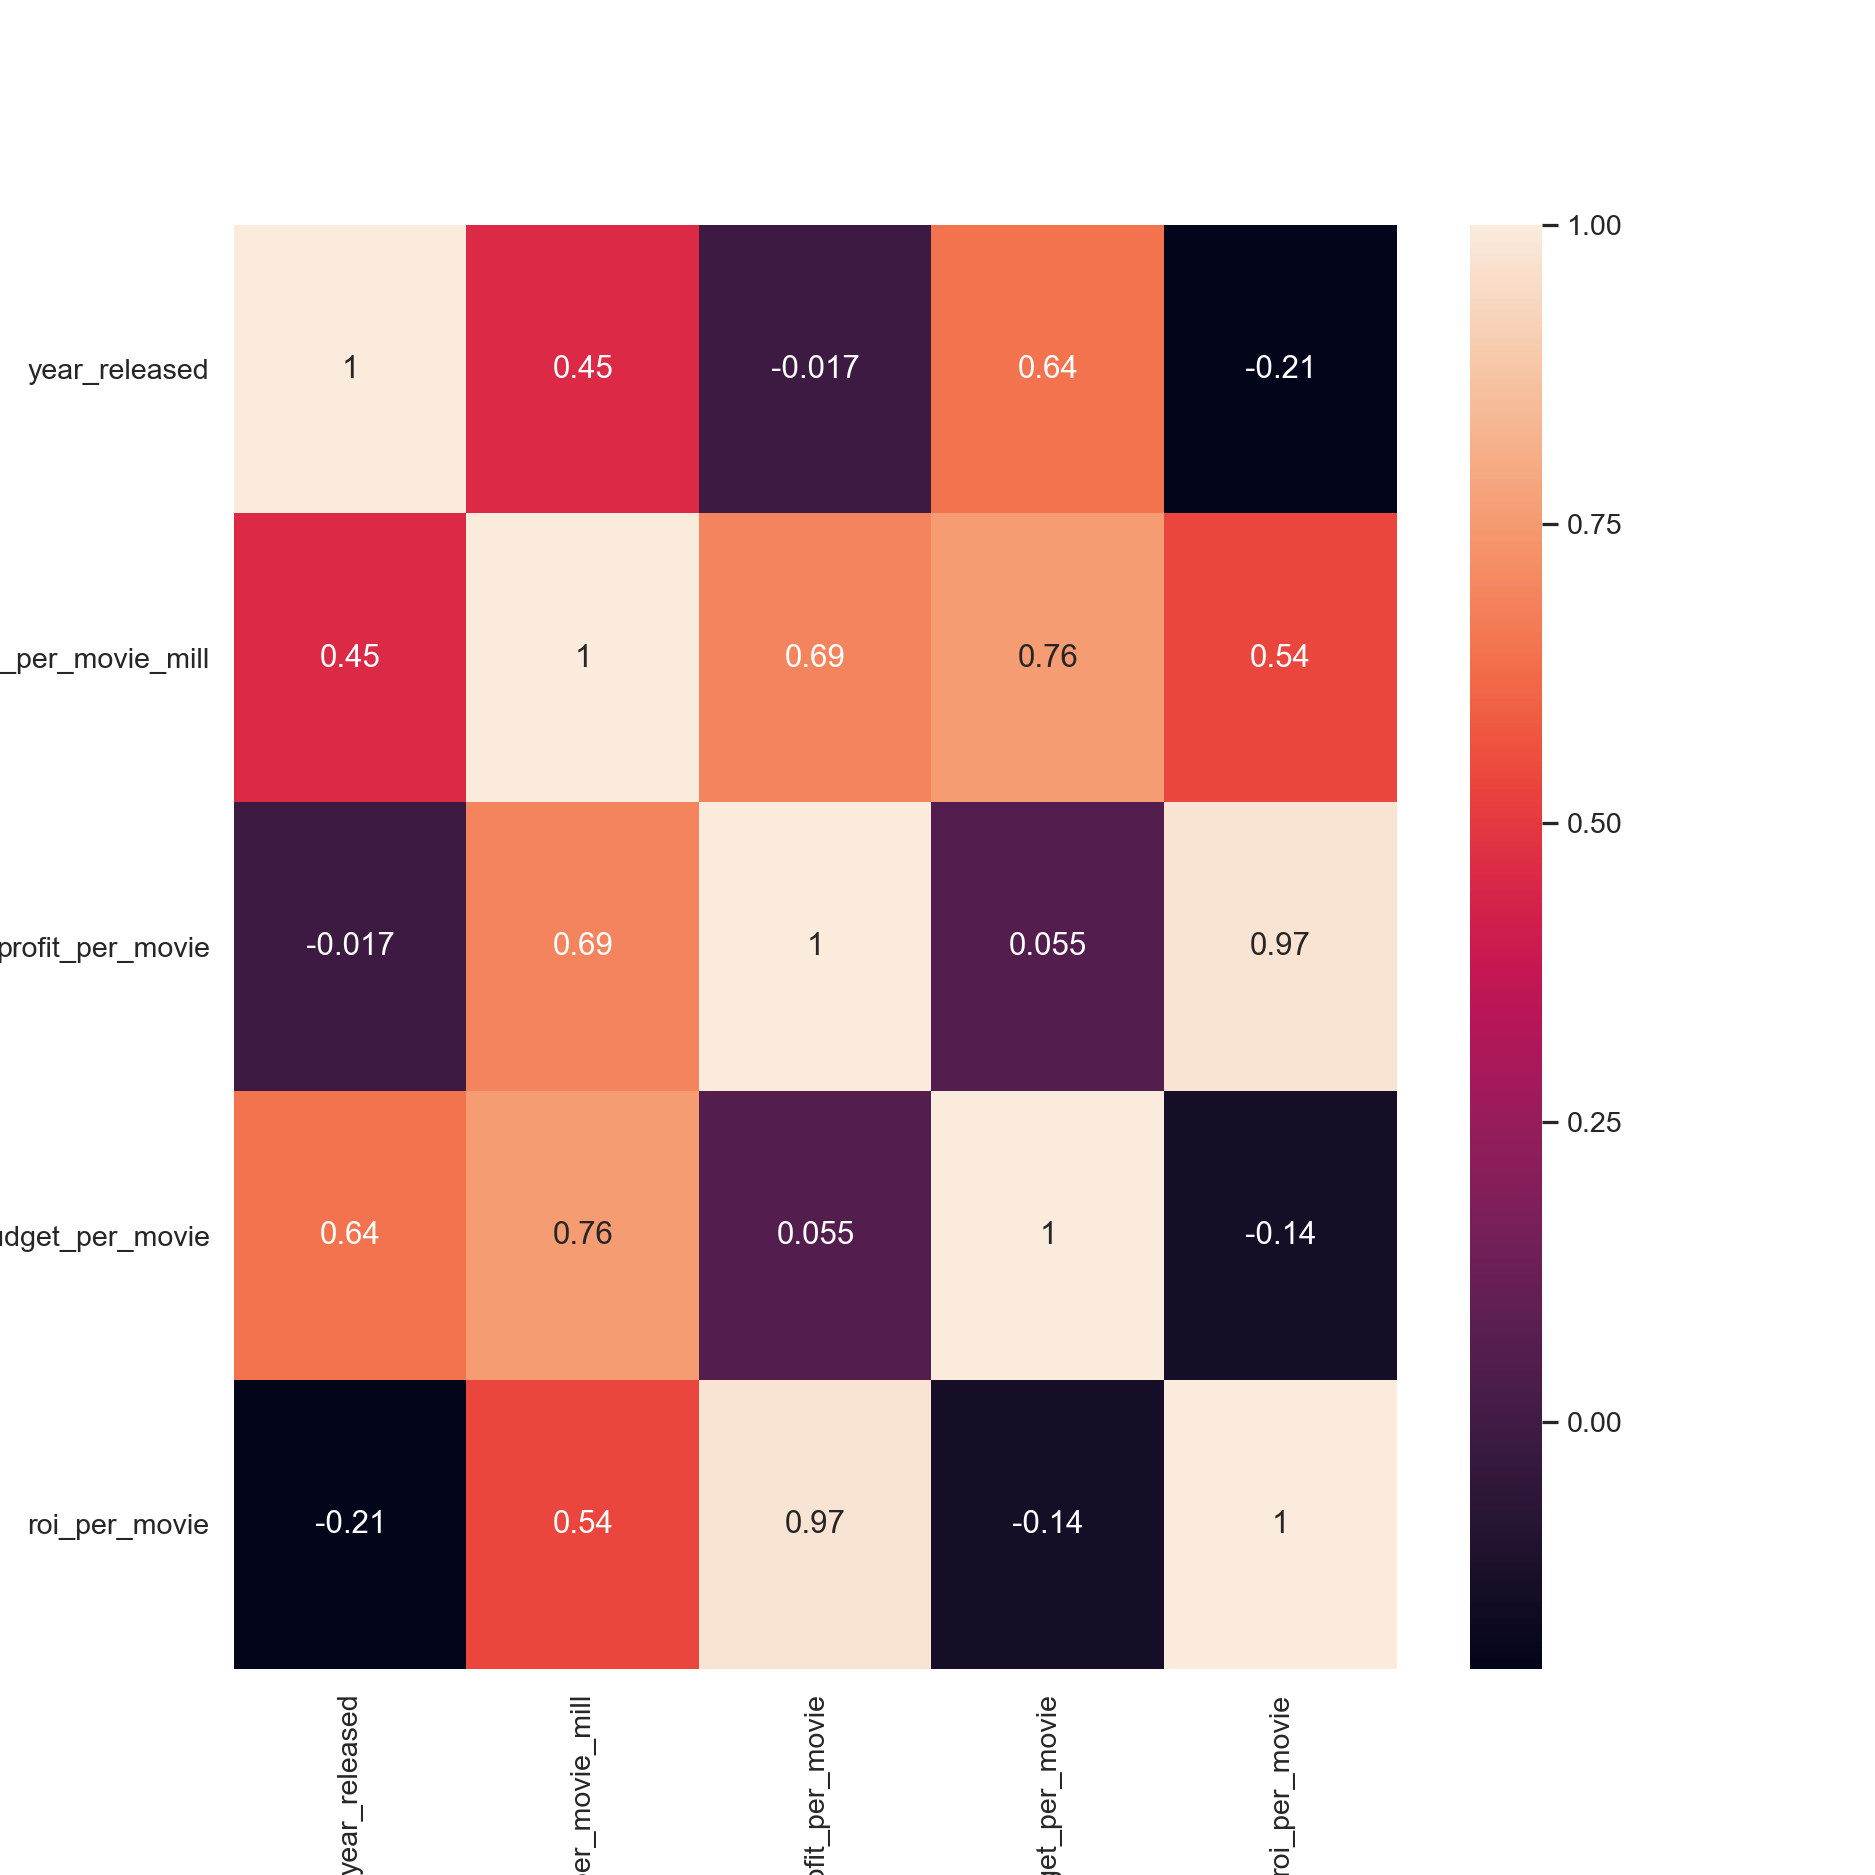

In [65]:
corrMatrix = annual_per_movie_df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corrMatrix, annot=True)

### ***Correlation Matrix Analysis***

Figure 3.0 is a correlation matrix showing how the data in one column of the dataframe is related to another column. These values range from -1 to 1. The extreme values -1 and 1 show a perfect relationship in either a positive or negative fashion, while a correlation coeffecient value near 0 shows that these two columns don't have any relation at all.

**Interesting Finds:**

**ROI per movie & Year Released = -0.21**<br/>  This was also seen in the regression plot. This means that as the years increase the ROI per movie is decreasing at about a 1:5 ratio.

**Production Budget & ROI = -0.14**<br/>
It was not unexpected to see that the production budget to ROI relationship is negative, but it was a shock to see just how little the negative relationship is. This is saying that there is a weak negative relationship. My intuition was that obviously the higher the production budget the lower the ROI because the production budget is a huge cost. However, it seems that the higher the production budget might also generate more ticket sales.

**Production Budget & Profit = 0.05**<br/>
Very similar to the production budget & ROI, this was expected to have a negative relationship. Instead we found that production budget and profit have 0 correlation.


### Range of Outcomes

### ***Figure 4.0 Boxplot of Net Profit in Millions***

<IPython.core.display.Javascript object>


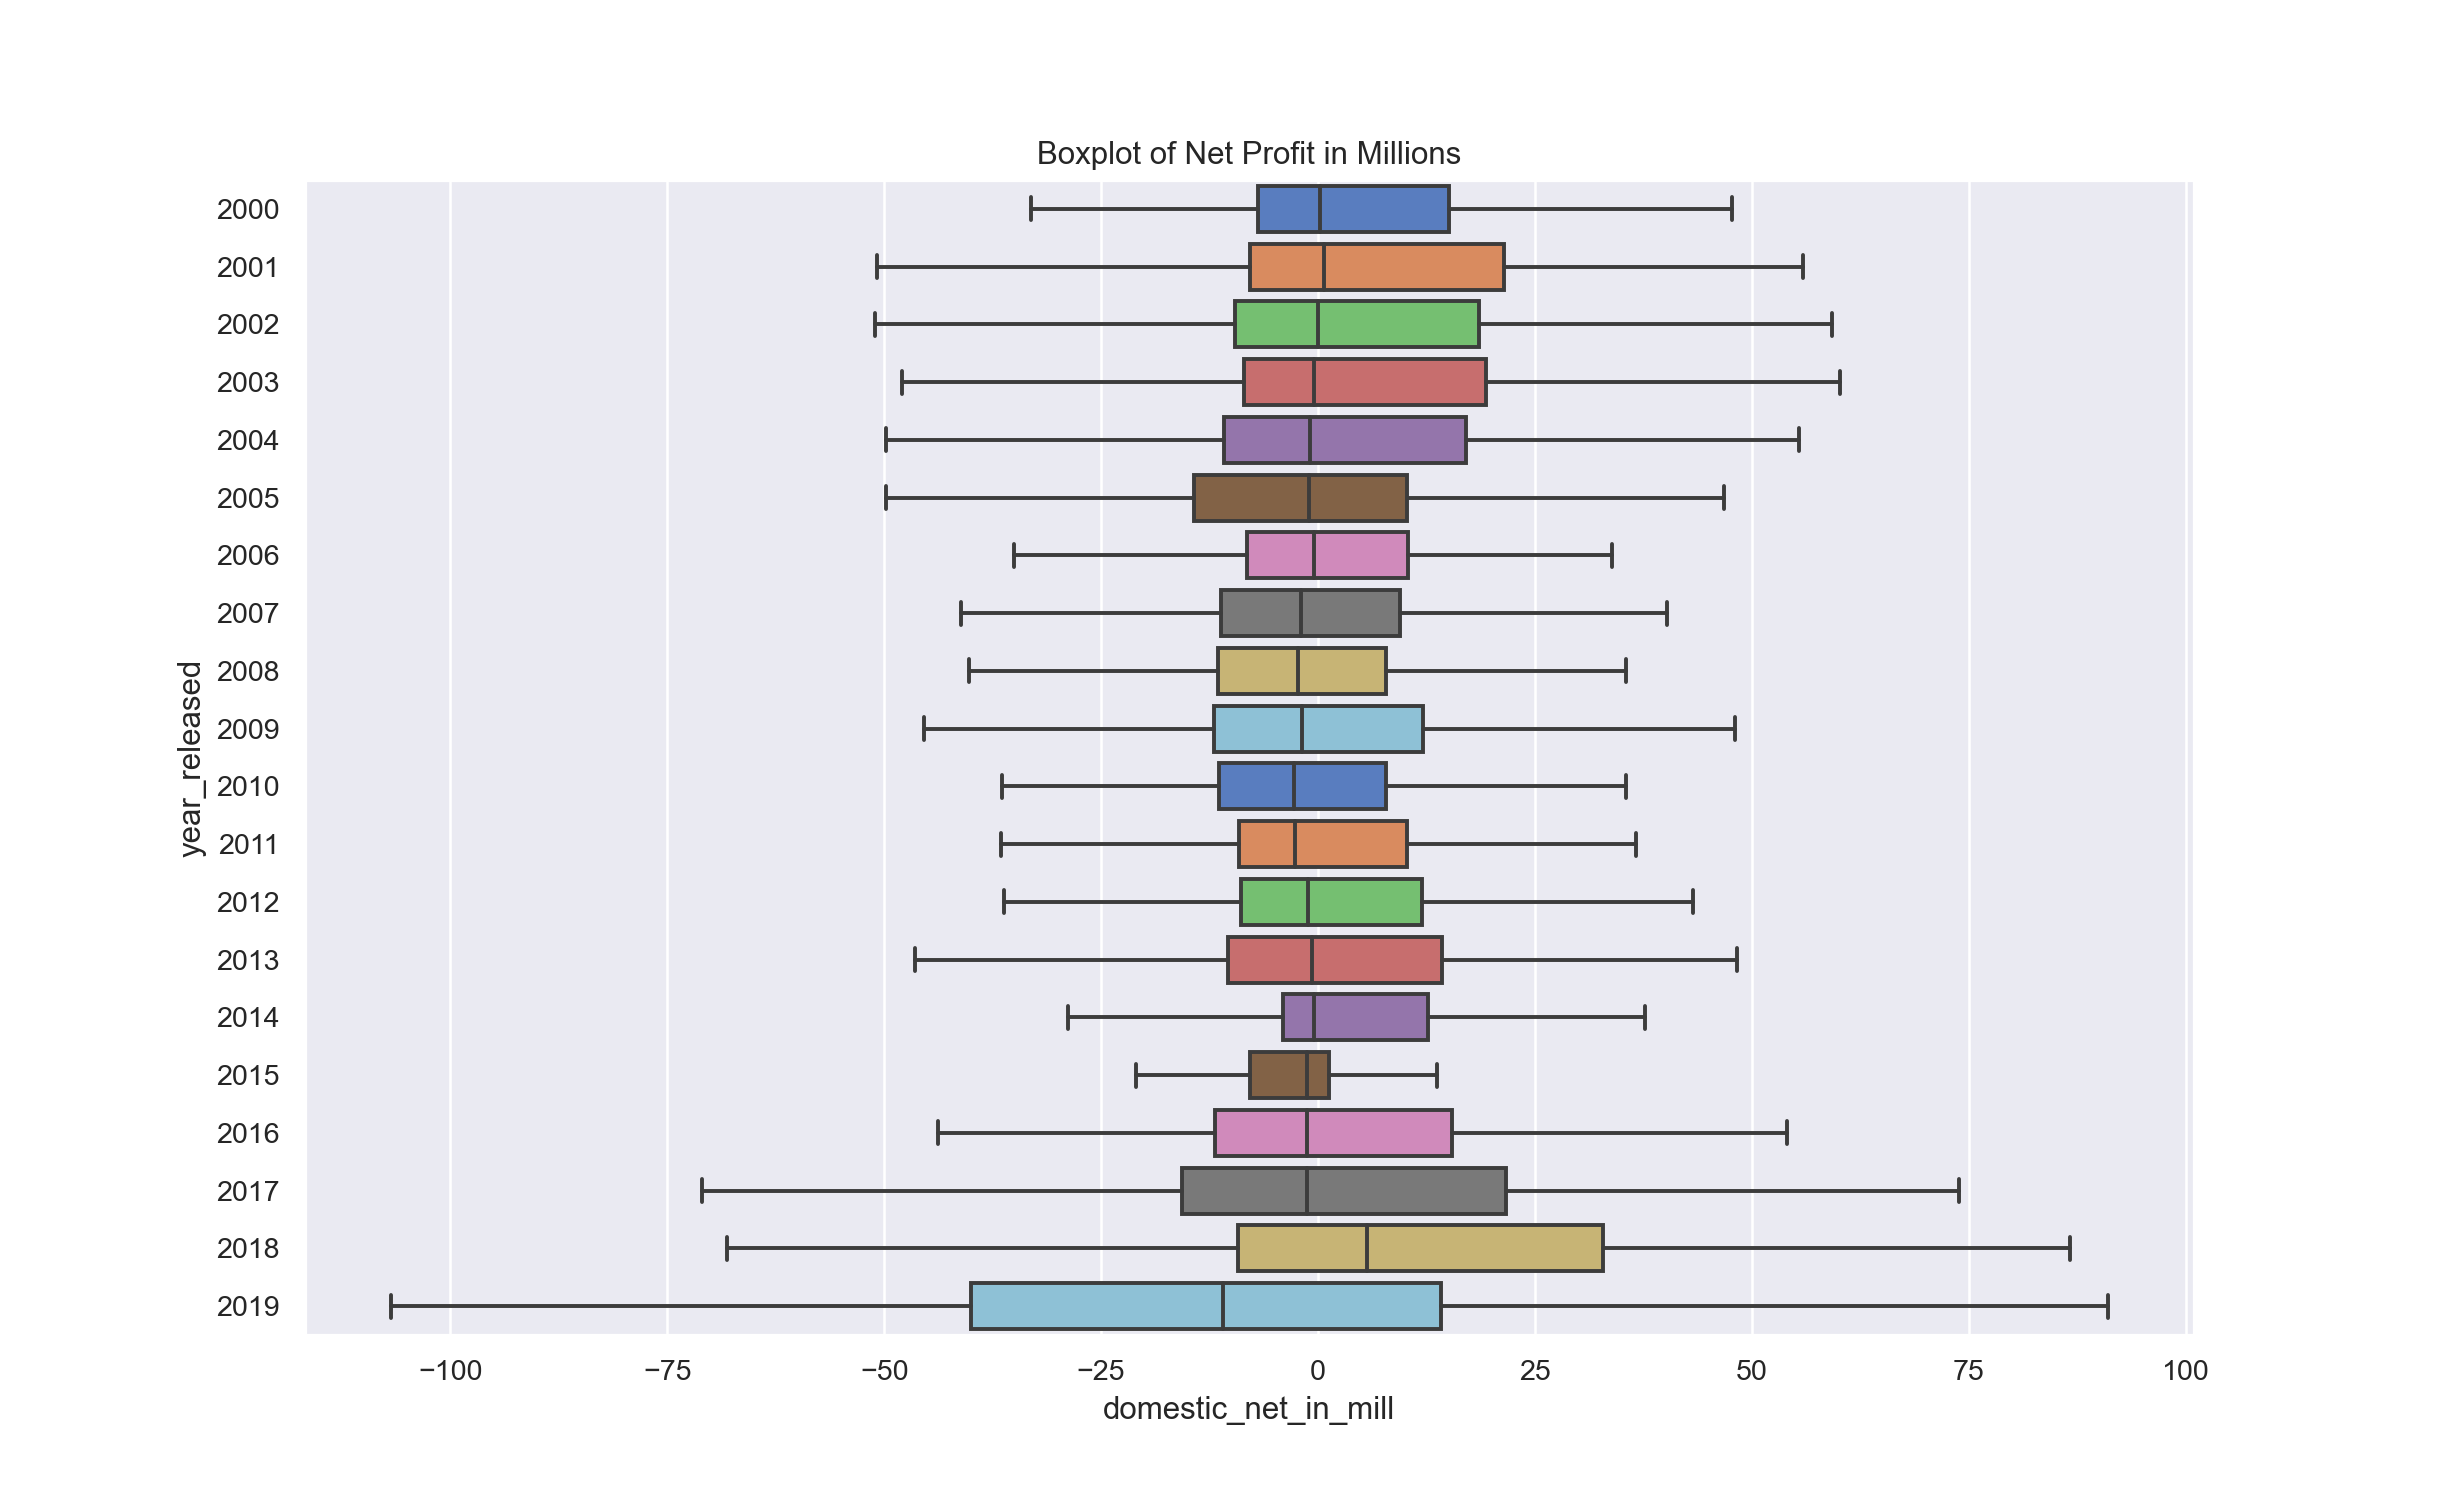

In [66]:
plt.figure(figsize=(13, 8))
sns.boxplot(df['domestic_net_in_mill'],df['year_released'], showfliers=False, orient='h', palette='muted')
plt.title('Boxplot of Net Profit in Millions')
plt.show()

### ***Figure 4.1 Distribution plot of ROI***

<IPython.core.display.Javascript object>


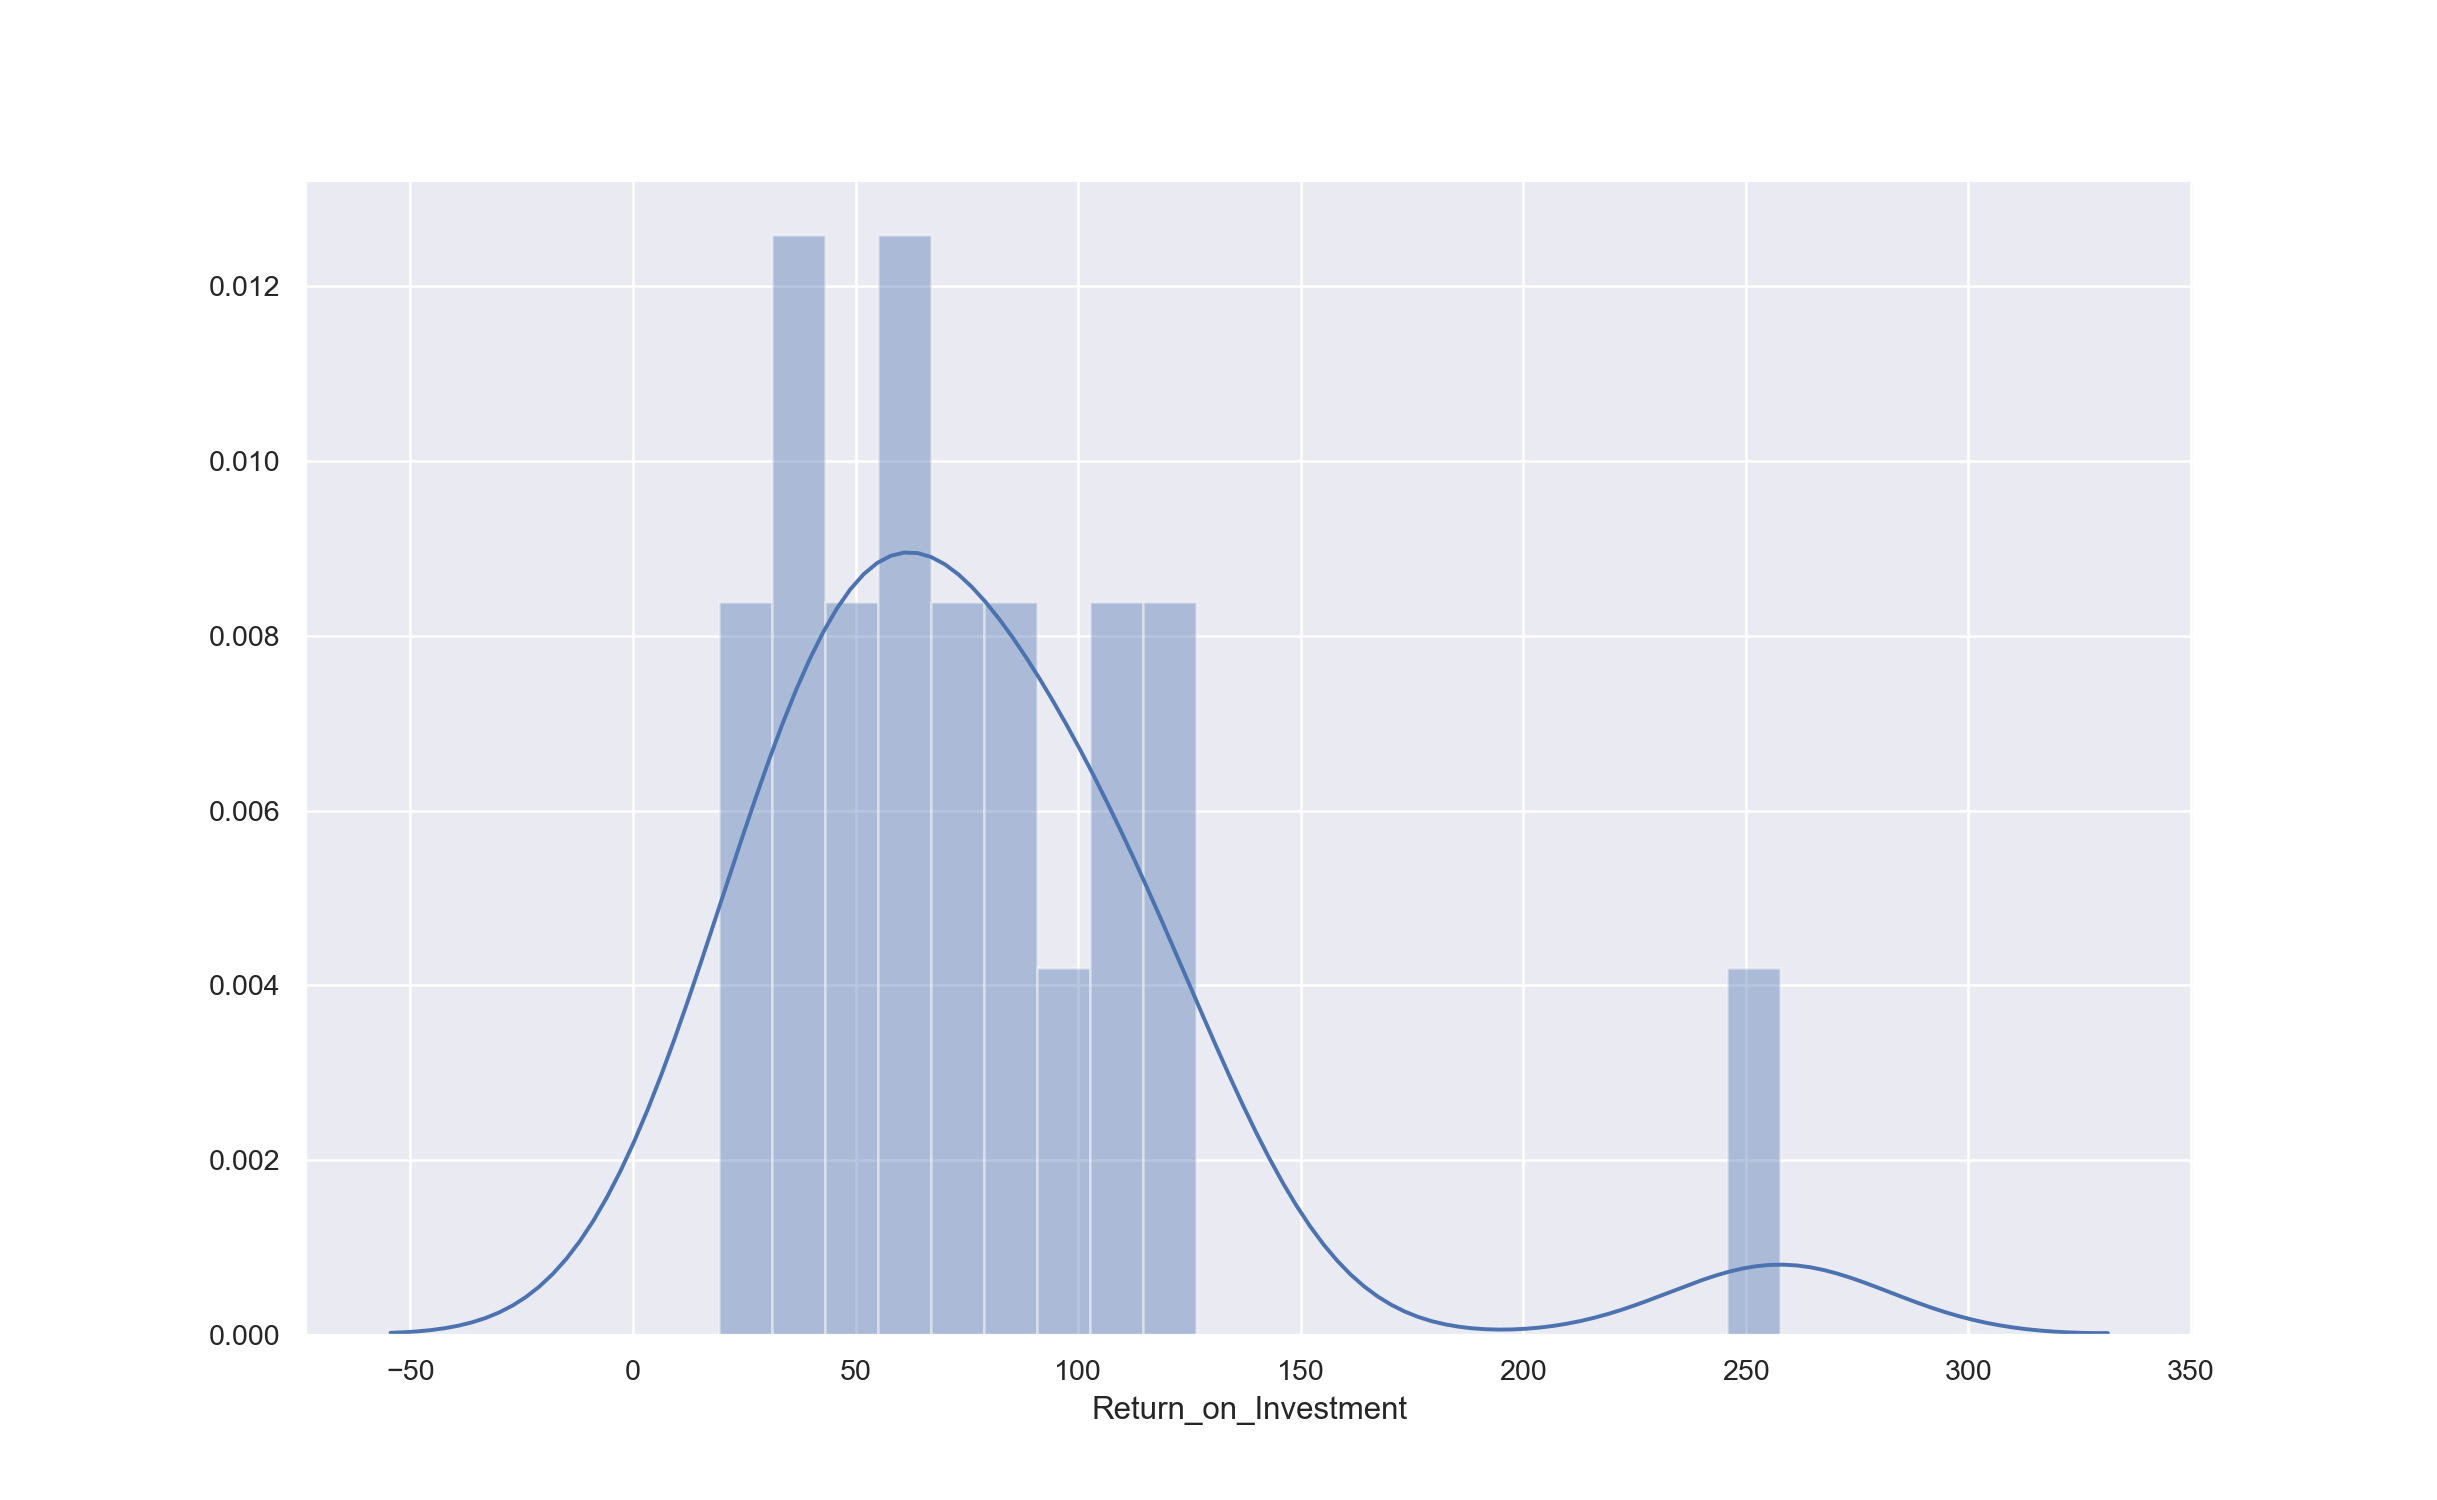

In [67]:
plt.figure(figsize=(13, 8))
sns.distplot(df.groupby('year_released')['Return_on_Investment'].mean(), bins=20)

### ***Figure 4.2 Distribution of Domestic Net Profit in Millions***

<IPython.core.display.Javascript object>


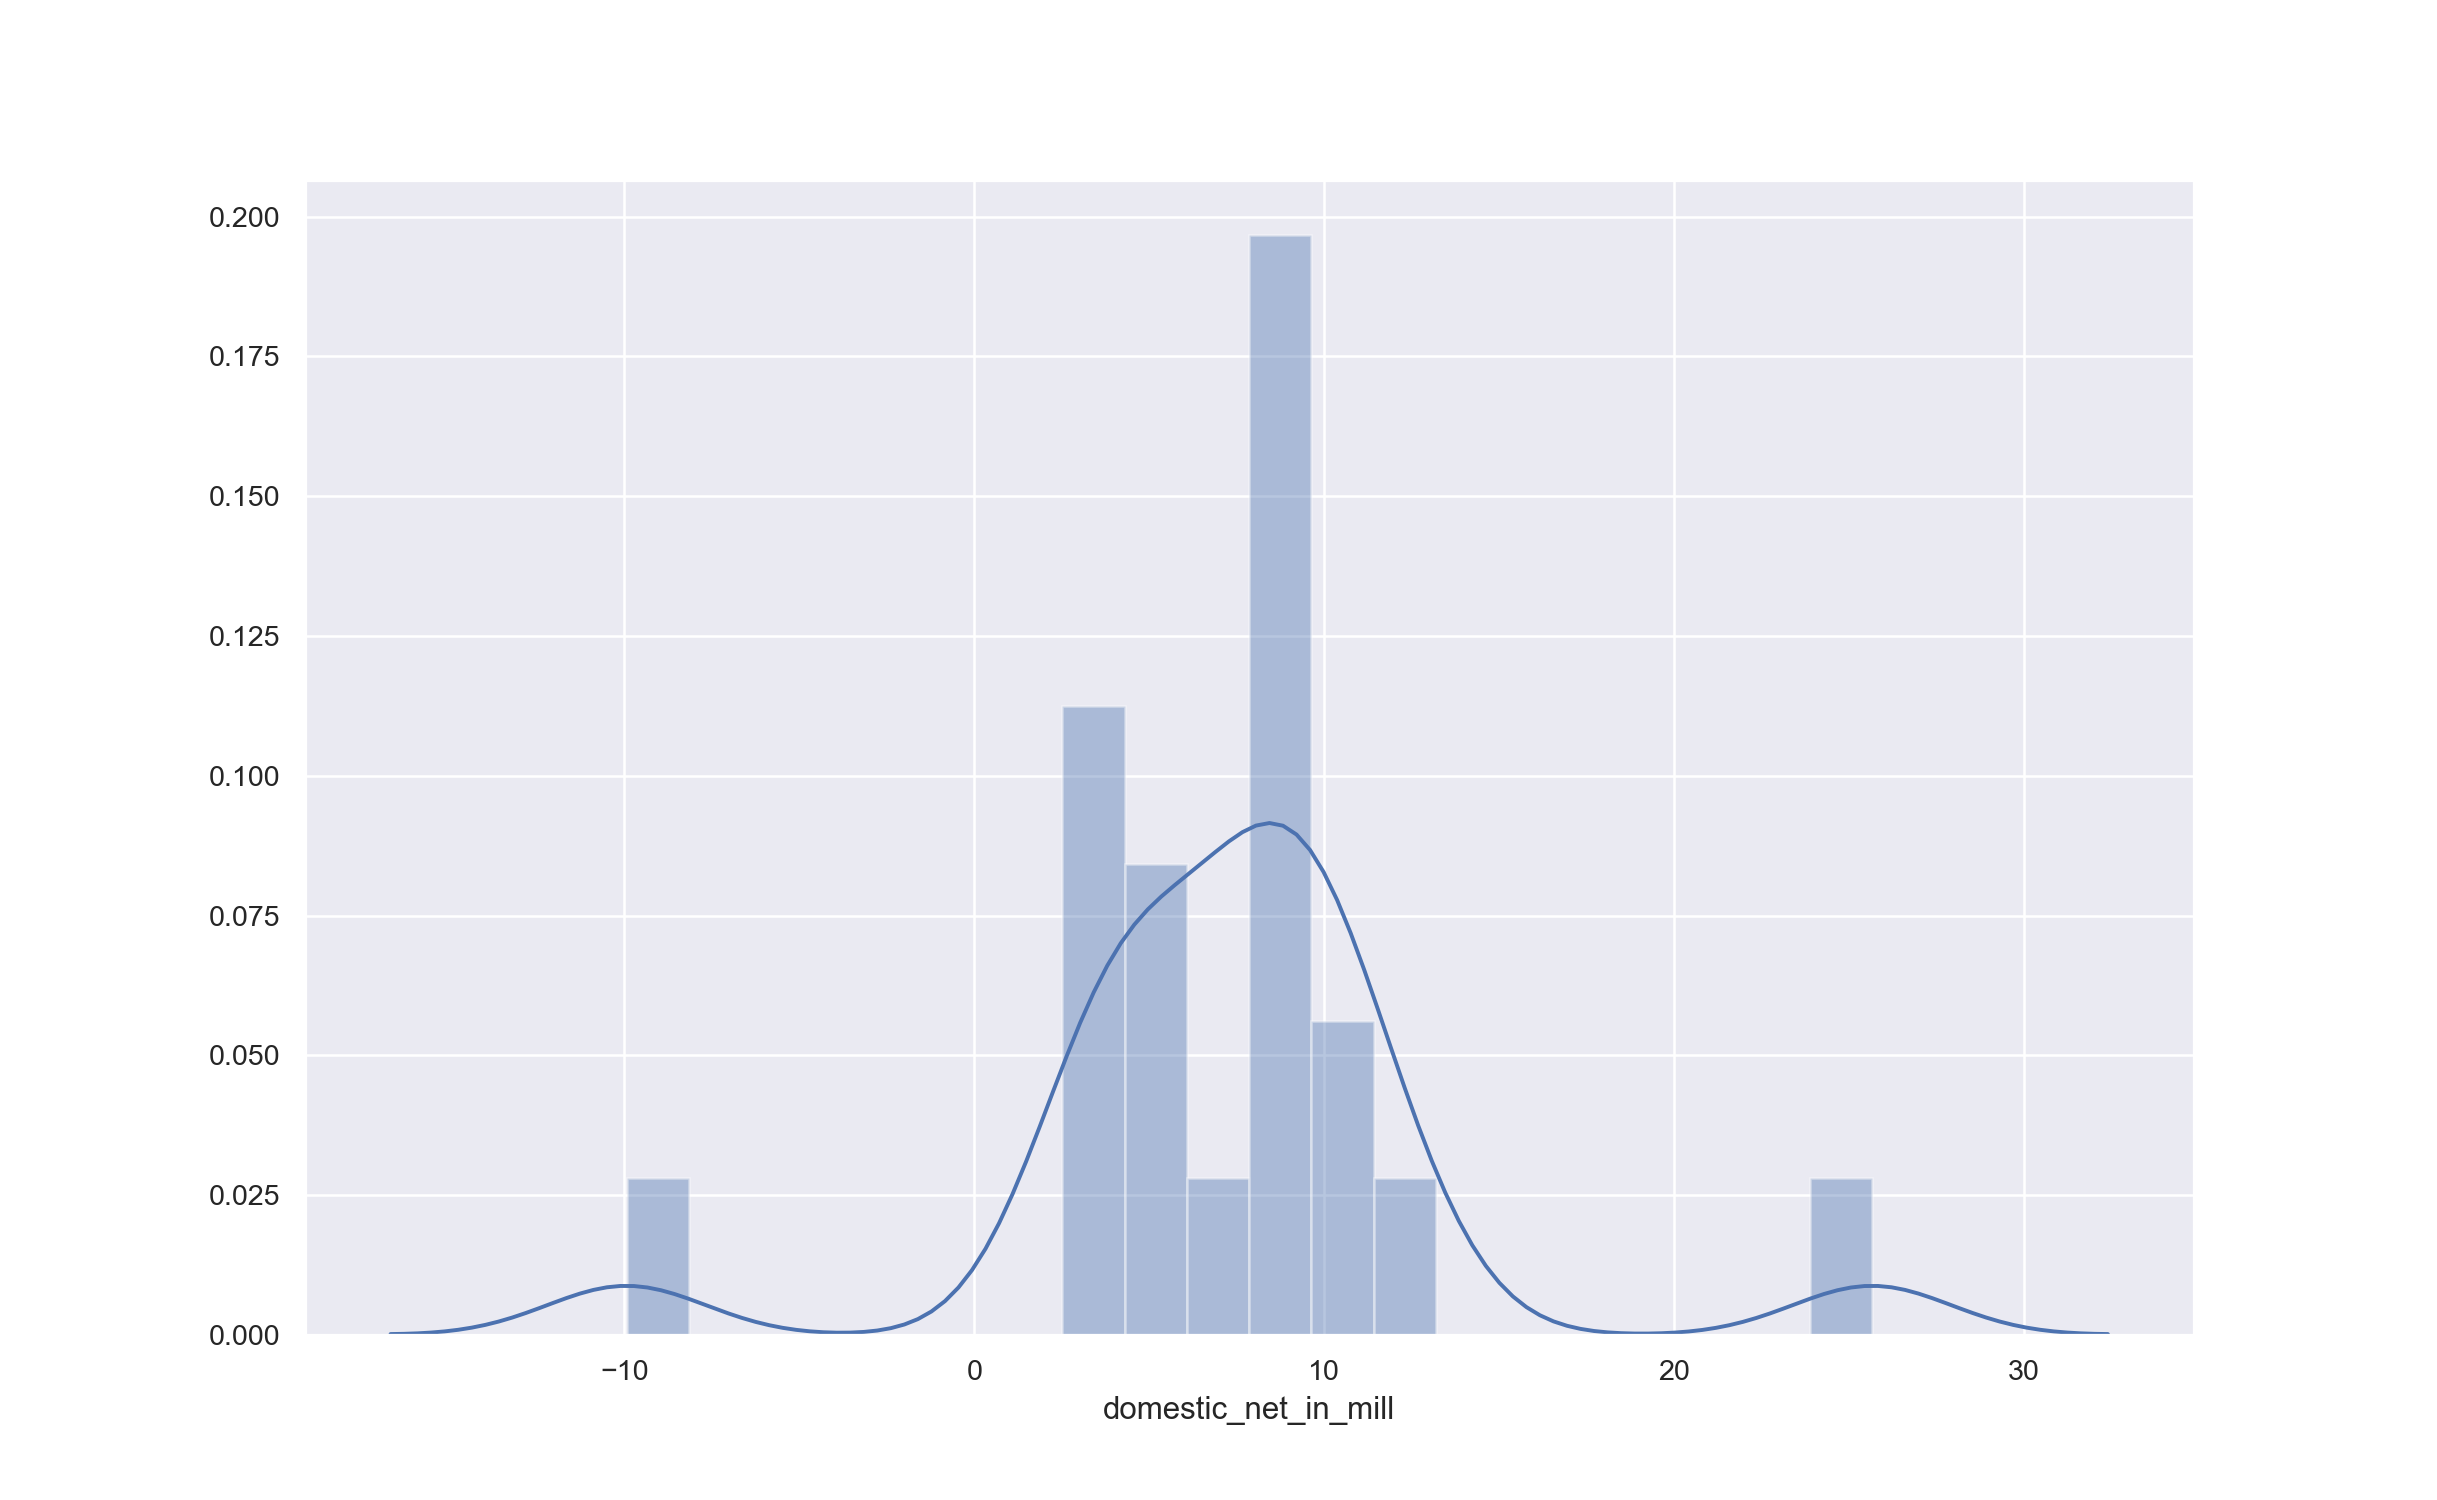

In [68]:
plt.figure(figsize=(13, 8))
sns.distplot(df.groupby('year_released')['domestic_net_in_mill'].mean(),bins=20)

### ***Figure 4.3 Distribution of Median ROI***

<IPython.core.display.Javascript object>


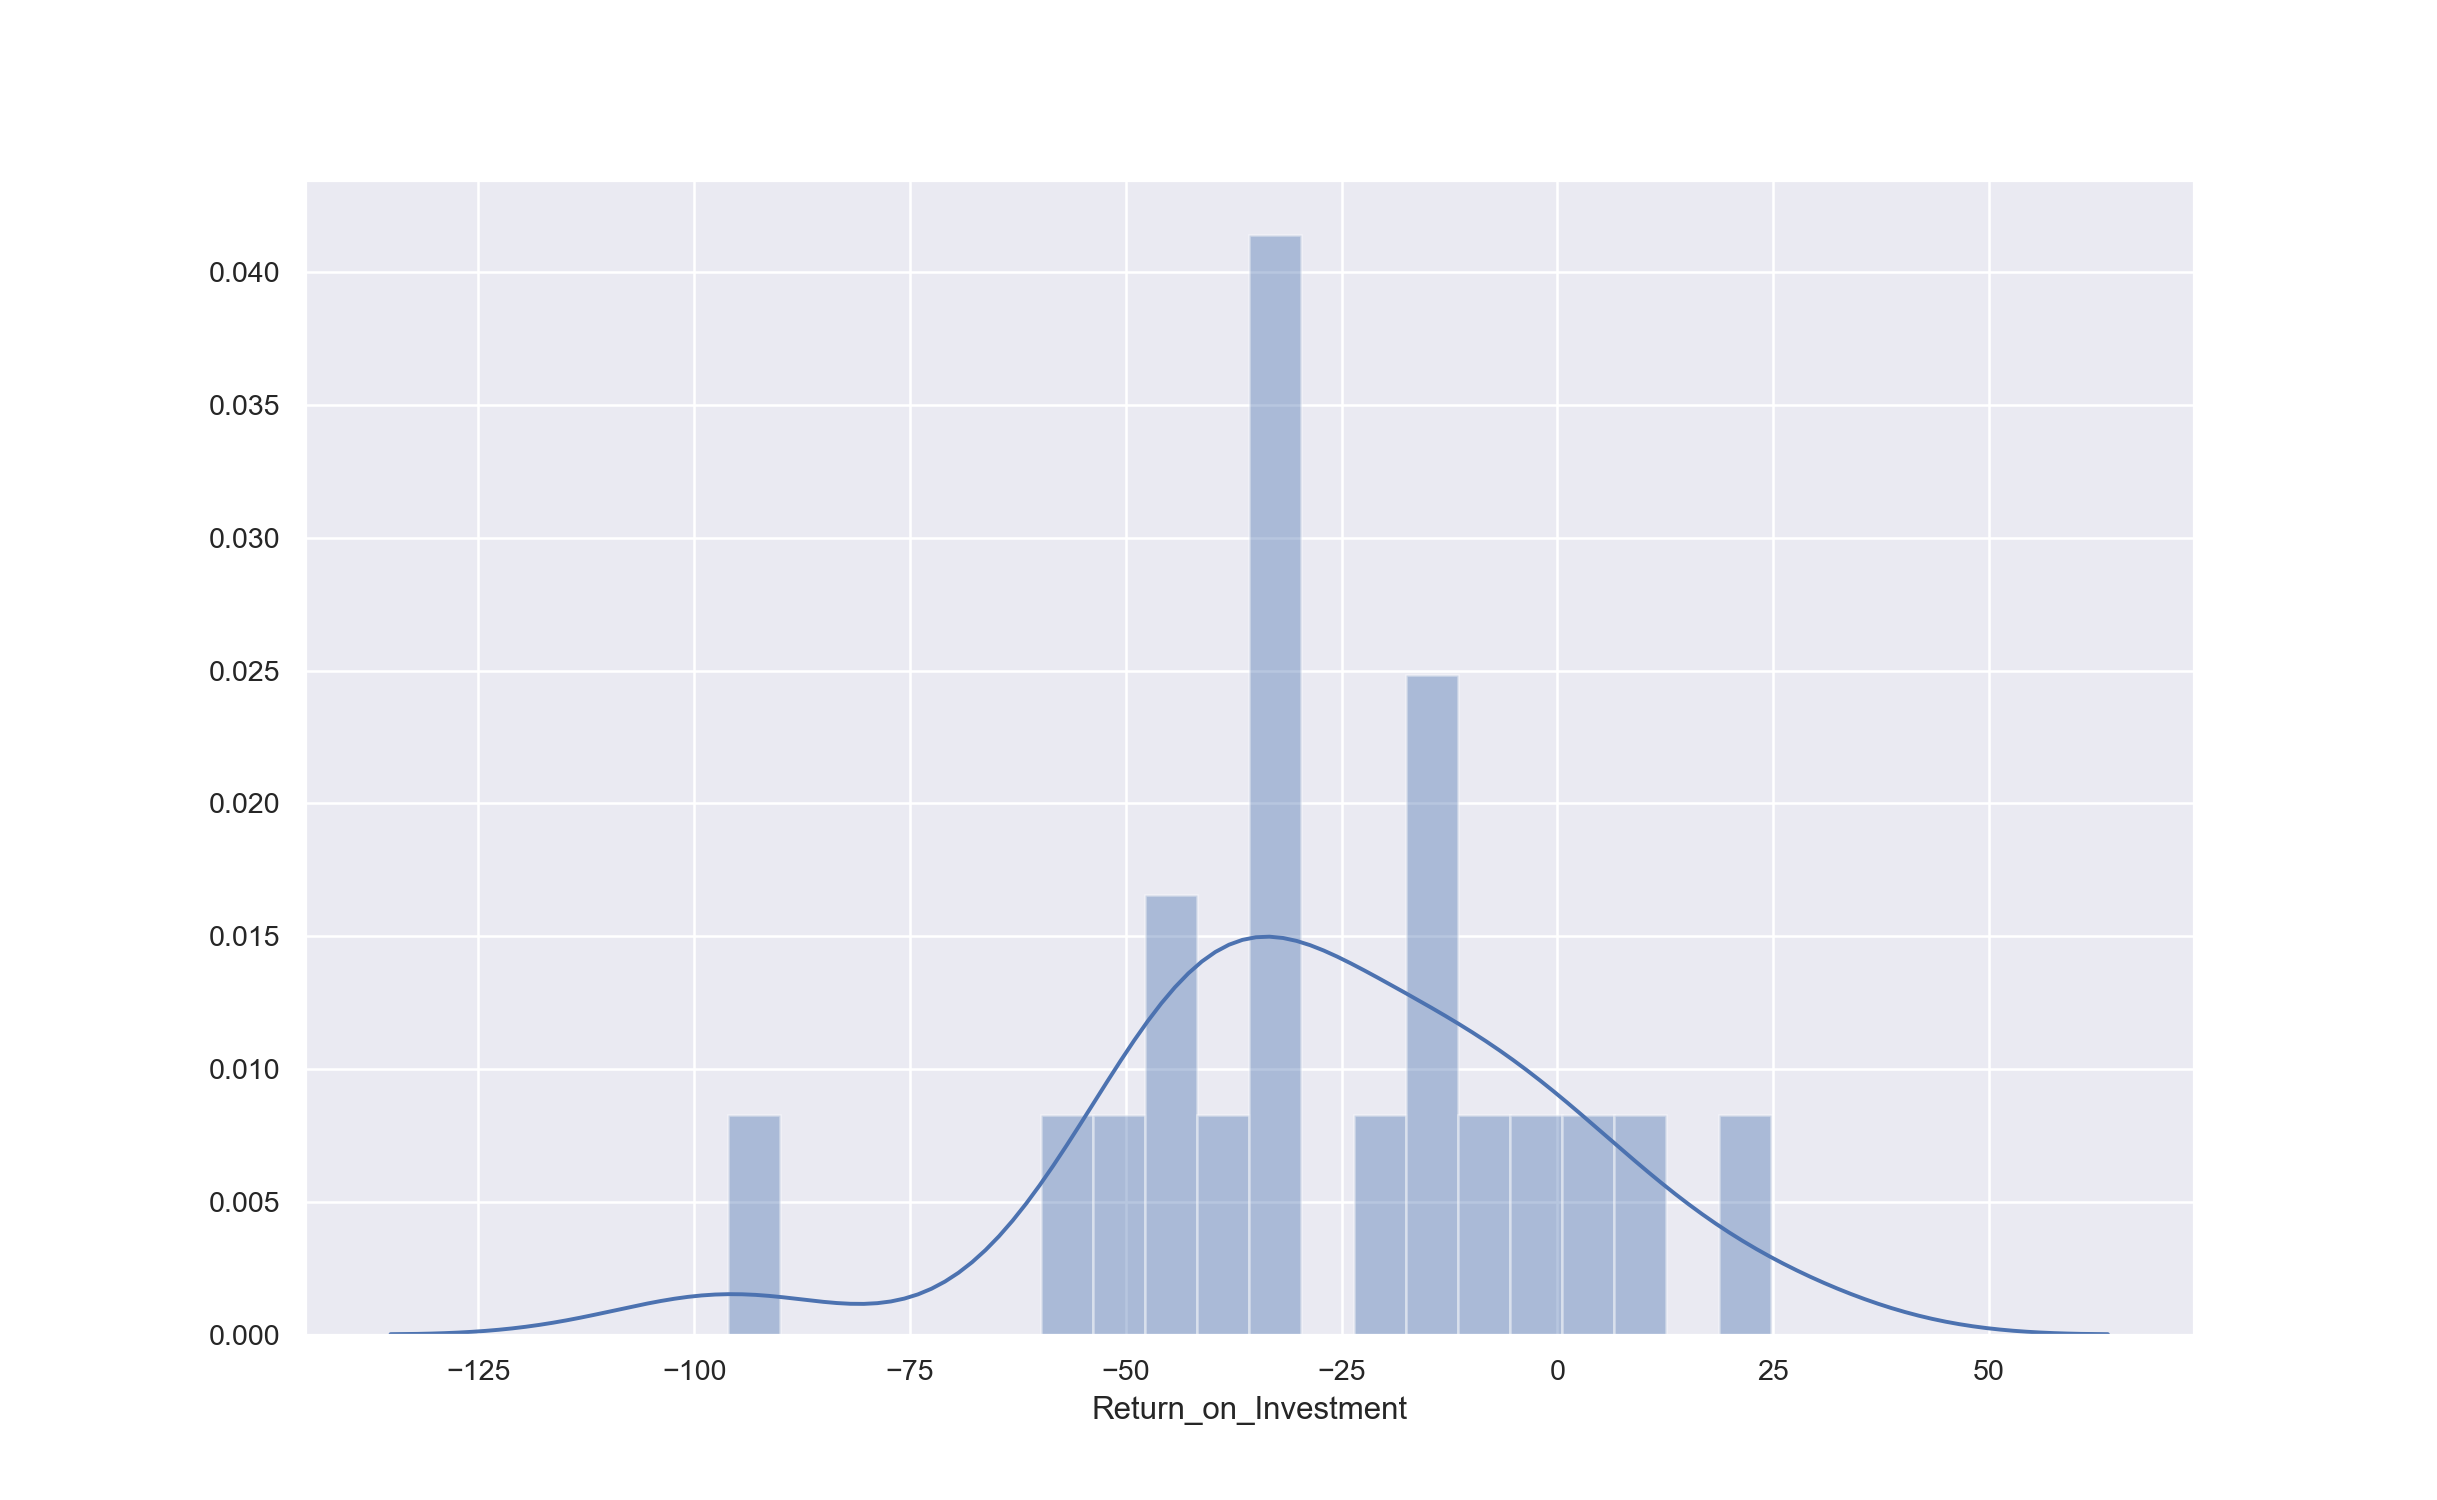

In [69]:
plt.figure(figsize=(13, 8))
sns.distplot(df.groupby('year_released')['Return_on_Investment'].median(),bins=20)

### ***Figure 4.4 Distribution of Median Domestic Net Profit***

<IPython.core.display.Javascript object>


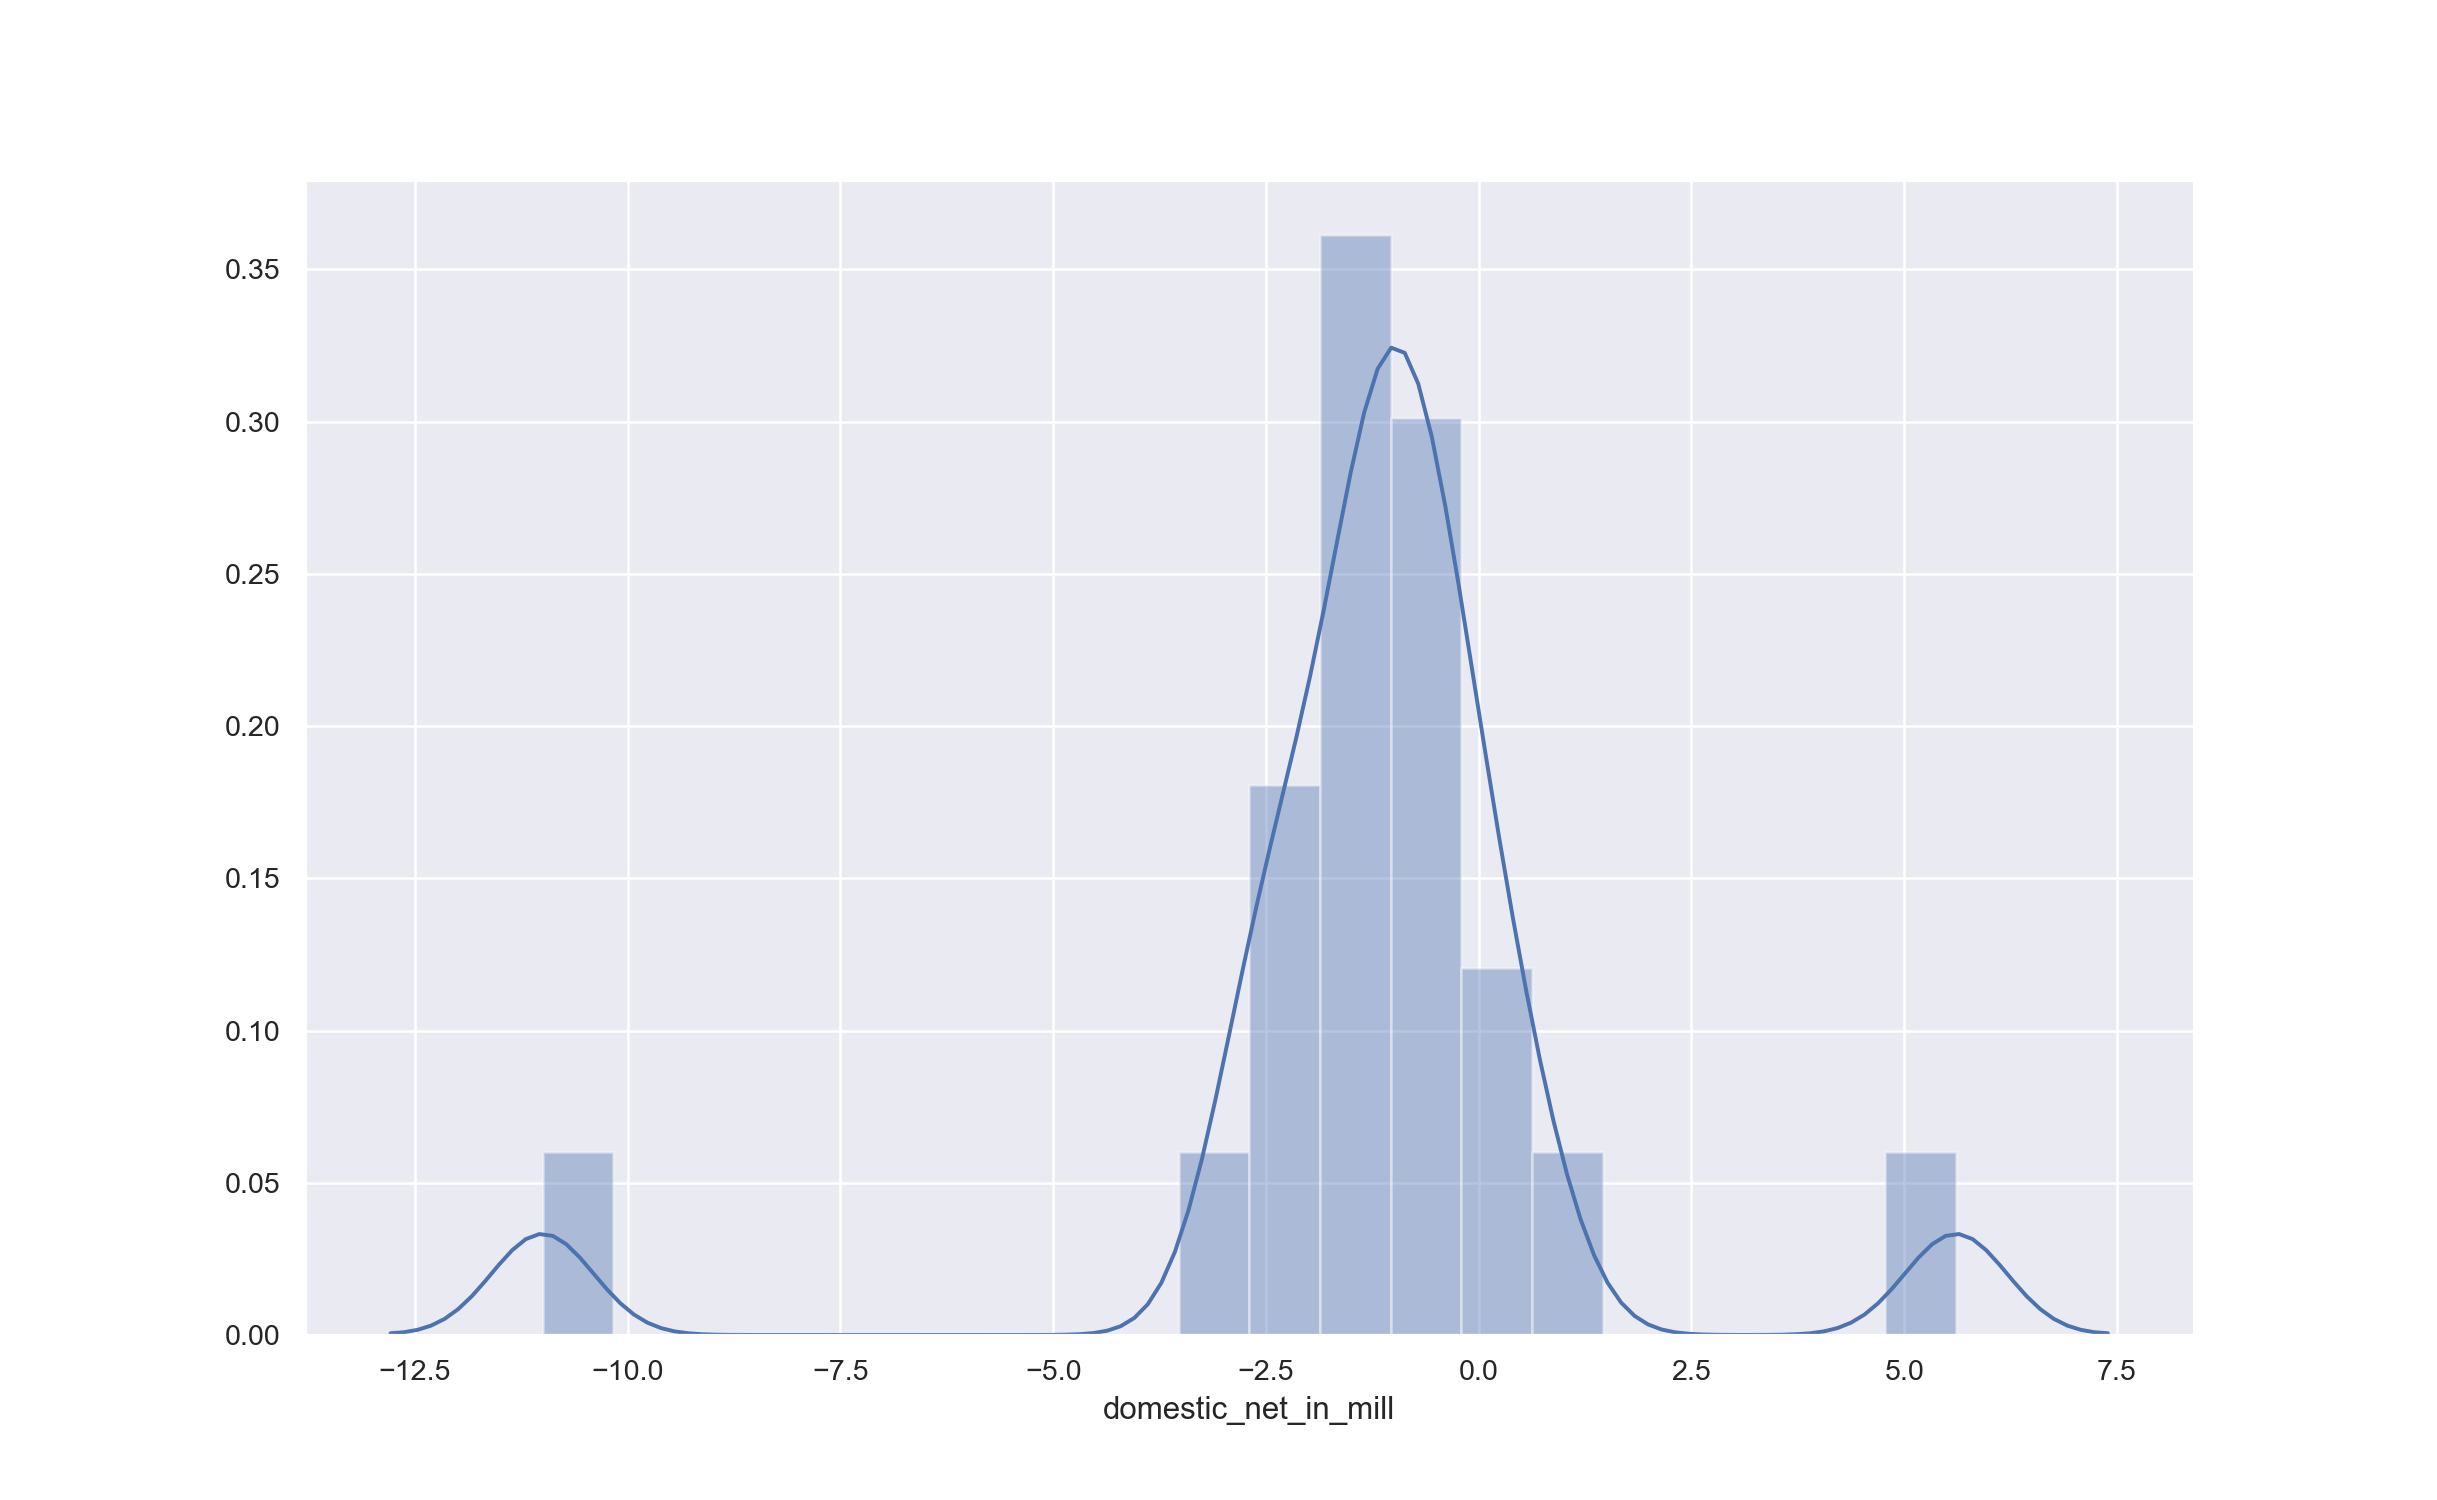

In [70]:
plt.figure(figsize=(13, 8))
sns.distplot(df.groupby('year_released')['domestic_net_in_mill'].median(),bins=20)

### ***Analysis of Figures 4.X***

**Figure 4.0 Boxplot of Net Profit in Millions** <br/> 
This figure shows a lot of information in a very condensed form. The body of the box shows the range of Net Profit for 50% of the data population and the line inside the box shows the median of the data. The whiskers on a normally distributed box plot demonstrate the values of 2.698 times the standard deviation and accounts for 99.3% of the data population. This is not a very clean distribution so the 2.698 times standard deviation will most likely account for a little less than 99.3% of the population.The longer the whiskers the more uncertain the outcome which is not good when trying to mitigate risk.

It should be noted that risk is not always a bad thing. If I mention left tail risk it means risk of losing money while right tail risk means higher reward possibility.

**Figure 4.1 Distribution of ROI**<br/>
This figure shows the distribution of the average return on investment for a movie in the 20 year timeframe we selected. The distirbution is fairly normalized around 50%. There seems to be a significant amount of right tail risk skewing the mean results. We know from previous data the median ROI for this same data is about 21% and the average of this entire data set is 23%. This distribution plot may not be the most useful.

**Figure 4.2 Distribution of Domestic Net Profit in Millions**<br/>
This figure shows the average profit per movie per year in millions. The KDE shows a distribution that looks relatively normal with a left shoulder and a right shoulder indicating two tail risk. 

**Figure 4.3 Distribution of Median ROI**<br/>
Looking at the median data tells a much scarier story when looking at return. This was also seen in the boxplot of net profits showing that the median ROI per year is near or ever below 0 indicating a loss. The outcomes are still very wide in rage, but this figure show us that chances are your movie will not make money in the domestic box office.

**Figure 4.4 Distribution of Median Domestic Net Profit**<br/>
Very similar picture as figure 4.3--scary. This shows that most movies do not make any profit and most actually lose money. 

# Conclusion

### ***Revisiting the Purpose*** <br/>
Microsoft sees all the big companies creating original video content, and they want to get in on the fun. They have decided to create a new movie studio, but the problem is they don’t know anything about creating movies. They have hired you to help them better understand the movie industry.

Your team is charged with doing data analysis and creating a presentation that explores what type of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the CEO can use when deciding what type of films they should be creating.


### ***Important Questions to Answer***<br/>
Firstly, before even evaluating how to produce great content, we must make sure the movie industry is showing healthy economic fundamentals. To evaluate if the movie industry is a healthy industry we will aim to answer the questions proposed in the beginning of this notebook.

#### **1. Are ticket sales growing since 2000?**<br/>
Figure 1.1 answers this question pretty plainly looking at the blue line representing ticket sales. Ticket sales shows an unicumbered picture of the demand for the movies created that year. From 2000 to 2015 ticket sales were not growing until a crazy spike going around 2018. Ticket sales after 2019 have declined dramatically after an impressive 2018 back to the same levels they were at the entire 2 decades we evaluated. ***There is no measurable growth in demand from 2000 to 2019.***


#### **2. Are movies making more or less profit since 2000?**<br/>
This question is easily answerable looking at Figure 1.1, Figure 2.2, and Figure 3.0. Looking at Figure 2.2 we see the relationship of profit per movie over time with a line of best fit plotted showing the trend. The slope is flat to barely negative. Figure 3.0 shows the correlation coefficient between profit per movie and the year it was released is -0.17. This also shows there is a negligible negative correlation to the year it was released and the profit of the movie. ***This shows that movies are not becoming more profitable over time.*** 


#### **3. Are movies getting more expensive to make since 2000?**<br/>
Similarly to question 2 lets look at Figure 2.1 and Figure 3.0. Figure 2.1 shows production budgets per movie over time. The line of best fit is showing a steep ascent which means that productions budgets have been growing as the years passed. Figure 3.0 shows the correlation coefficient between these two variables is 0.64. This is proof of a strong positive correlation of these values as the years go on the production budgets also increase. ***This shows that movies are becoming increasingly expensive to make over time.***


#### 4. Does a larger production budget increase your chances of producing a profitable movie? <br/>
Figure 3.0 measures the correlation between multiple variables including production budget and profit per movie and ROI. The values for production budget vs profit is 0.055 and production budget vs ROI is -0.14. This means that while production budget does have a little effect on ticket sales the increased cost in the budget is greater therefore hurting your return metrics. ***This shows that a larger production budget has no change to your profit and actually will hurt your return metrics.***

## Summary
In summary, on this data I would not recommend entering the movie industry as an inexperienced content creator. The majority of movies are not doing well and there is an extremely wide range in possible outcomes. That being said, I believe this data is leaving out a major part of the revenue stream for movies in the on demand market. If we had data on the income generated from on demand services such as Netflix it may shed a much more positive light on becoming a content creator.
